In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Dépenses en énergie

In [2]:
# Excel IEA des dépenses en énergie - version complète
budgets = pd.read_excel('Budgets_Public-RDD-Expenditures.xlsx')
budgets

Country                               Currency  \
0            Australia            National currency (nominal)   
1            Australia            National currency (nominal)   
2            Australia            National currency (nominal)   
3            Australia            National currency (nominal)   
4            Australia            National currency (nominal)   
...                ...                                    ...   
1633  IEA Asia Oceania  Euro (2023 prices and exchange rates)   
1634  IEA Asia Oceania  Euro (2023 prices and exchange rates)   
1635  IEA Asia Oceania  Euro (2023 prices and exchange rates)   
1636  IEA Asia Oceania  Euro (2023 prices and exchange rates)   
1637  IEA Asia Oceania  Euro (2023 prices and exchange rates)   

                                     Technology     1974      1975      1976  \
0                             Energy efficiency       ..        ..        ..   
1                                  Fossil fuels       ..        ..        ..   
2                                    Renewables       ..        ..        ..   
3                                       Nuclear       ..        ..        ..   
4                       Hydrogen and fuel cells       ..        ..        ..   
...                                         ...      ...       ...       ...   
1633                    Hydrogen and fuel cells        0         0         0   
1634       Other power and storage technologies   14.508    14.788    12.067   
1635  Other cross-cutting technologies/research  262.769   307.239   311.308   
1636                                Unallocated        0         0         0   
1637                               Total Budget  901.034  1085.137  1165.398   

          1977      1978      1979      1980  ...     2015      2016  \
0           ..        ..         0       5.4  ...   29.451    21.467   
1           ..        ..     13.41     20.75  ...    64.41    42.331   
2           ..        ..      6.43      9.96  ...  151.449    56.188   
3           ..        ..         0         0  ...    9.118    17.551   
4           ..        ..        ..        ..  ...    4.149     3.883   
...        ...       ...       ...       ...  ...      ...       ...   
1633         0         0         0         0  ...  125.278   132.645   
1634    12.509    16.601    23.984    67.243  ...  181.178   254.678   
1635    15.181    19.086    33.579    55.702  ...   165.21    90.855   
1636         0         0         0         0  ...    2.119     5.695   
1637  1298.232  1481.356  1743.817  2488.849  ...  2846.02  2587.697   

          2017      2018      2019      2020      2021      2022      2023  \
0       28.108    32.881    46.263     30.62    46.658    58.852    21.792   
1       67.878      71.2      68.4    49.117     46.41   138.832    75.171   
2       68.475    66.505    75.744    41.276    62.038    82.547    78.583   
3       10.016     8.786     9.789    10.246    15.395    18.026      18.9   
4        5.877    32.263    49.781    46.045    81.731    154.66   151.633   
...        ...       ...       ...       ...       ...       ...       ...   
1633   138.756   207.485   279.175   307.048   316.877   357.241   349.425   
1634   232.225   249.979   233.336   253.952   284.223   301.592   289.813   
1635   164.515   168.088   194.607   179.515   162.494   144.941   125.801   
1636     6.724     5.813     4.873     6.841     1.973     1.339     2.539   
1637  2522.748  2906.614  2910.425  2904.185  3047.095  3123.965  2952.558   

     2024  
0      ..  
1      ..  
2      ..  
3      ..  
4      ..  
...   ...  
1633   ..  
1634   ..  
1635   ..  
1636   ..  
1637   ..  

[1638 rows x 54 columns]

In [3]:
# Excel IEA dépenses en énergie - Currency en USA (2023 prices and Puchasing Power Parity) - de 2007 à 2017
budgets = budgets[budgets['Currency'] == 'USD (2023 prices and PPP)']
# Premier drop de colonnes des années 1974 -> 2006
columns_to_drop = [str(year) for year in range(1974, 2007)]
budgets = budgets.drop(columns=columns_to_drop)
budgets


Country                   Currency  \
27           Australia  USD (2023 prices and PPP)   
28           Australia  USD (2023 prices and PPP)   
29           Australia  USD (2023 prices and PPP)   
30           Australia  USD (2023 prices and PPP)   
31           Australia  USD (2023 prices and PPP)   
...                ...                        ...   
1624  IEA Asia Oceania  USD (2023 prices and PPP)   
1625  IEA Asia Oceania  USD (2023 prices and PPP)   
1626  IEA Asia Oceania  USD (2023 prices and PPP)   
1627  IEA Asia Oceania  USD (2023 prices and PPP)   
1628  IEA Asia Oceania  USD (2023 prices and PPP)   

                                     Technology      2007      2008      2009  \
27                            Energy efficiency    35.457    41.628    37.391   
28                                 Fossil fuels    73.866    68.549   285.321   
29                                   Renewables    50.553    43.747    84.191   
30                                      Nuclear    16.184    24.807     2.756   
31                      Hydrogen and fuel cells     0.678     0.317     1.168   
...                                         ...       ...       ...       ...   
1624                    Hydrogen and fuel cells   323.315    384.13   280.833   
1625       Other power and storage technologies   229.469   249.023   296.269   
1626  Other cross-cutting technologies/research    128.34   157.902    50.939   
1627                                Unallocated         0         0         0   
1628                               Total Budget  5873.088  5725.169  5663.243   

          2010      2011      2012      2013  ...      2015      2016  \
27     120.389    87.003    63.043    62.067  ...    25.637    18.553   
28      204.42   230.431    347.63     282.7  ...    56.069    36.584   
29      89.589   173.803   226.167   448.283  ...   131.836     48.56   
30       2.722     5.357    10.193       7.7  ...     7.937    15.168   
31       2.215     2.207     0.199     1.606  ...     3.612     3.356   
...        ...       ...       ...       ...  ...       ...       ...   
1624   235.946   206.226   228.155   198.092  ...   211.415   225.216   
1625   317.613   275.889   296.643   261.447  ...   311.592   432.492   
1626    59.663     45.63    38.538    45.124  ...   278.753   155.053   
1627         0         0         0         0  ...     2.269     6.098   
1628  5611.516  5964.632  6413.183  5531.753  ...  4700.229  4320.651   

          2017      2018      2019      2020      2021      2022      2023  \
27      23.448    26.795    36.508    23.812    34.419    39.997    14.337   
28      56.626    58.022    53.978    38.196    34.236    94.353    49.455   
29      57.124    54.196    59.773    32.098    45.764    56.101    51.699   
30       8.356      7.16     7.725     7.968    11.357    12.251    12.434   
31       4.903    26.292    39.285    35.808    60.292    105.11    99.759   
...        ...       ...       ...       ...       ...       ...       ...   
1624   234.524   337.125   448.841   500.616   509.326    555.46   546.918   
1625   393.895   424.464       388   428.988    461.49   492.796   487.675   
1626   278.503   284.461   321.398   289.134   255.099   216.446   192.717   
1627     7.718     6.709      5.84       8.2     2.365     1.605     3.043   
1628  4192.442  4820.643  4799.888  4835.444  5042.365  5097.021  4885.993   

     2024  
27     ..  
28     ..  
29     ..  
30     ..  
31     ..  
...   ...  
1624   ..  
1625   ..  
1626   ..  
1627   ..  
1628   ..  

[342 rows x 21 columns]

In [4]:
# Second drop de colonnes des années 1974 -> 2006
columns_to_drop_2 = [str(year) for year in range(2018, 2025)]
budgets = budgets.drop(columns=columns_to_drop_2)
budgets

Country                   Currency  \
27           Australia  USD (2023 prices and PPP)   
28           Australia  USD (2023 prices and PPP)   
29           Australia  USD (2023 prices and PPP)   
30           Australia  USD (2023 prices and PPP)   
31           Australia  USD (2023 prices and PPP)   
...                ...                        ...   
1624  IEA Asia Oceania  USD (2023 prices and PPP)   
1625  IEA Asia Oceania  USD (2023 prices and PPP)   
1626  IEA Asia Oceania  USD (2023 prices and PPP)   
1627  IEA Asia Oceania  USD (2023 prices and PPP)   
1628  IEA Asia Oceania  USD (2023 prices and PPP)   

                                     Technology      2007      2008      2009  \
27                            Energy efficiency    35.457    41.628    37.391   
28                                 Fossil fuels    73.866    68.549   285.321   
29                                   Renewables    50.553    43.747    84.191   
30                                      Nuclear    16.184    24.807     2.756   
31                      Hydrogen and fuel cells     0.678     0.317     1.168   
...                                         ...       ...       ...       ...   
1624                    Hydrogen and fuel cells   323.315    384.13   280.833   
1625       Other power and storage technologies   229.469   249.023   296.269   
1626  Other cross-cutting technologies/research    128.34   157.902    50.939   
1627                                Unallocated         0         0         0   
1628                               Total Budget  5873.088  5725.169  5663.243   

          2010      2011      2012      2013     2014      2015      2016  \
27     120.389    87.003    63.043    62.067   25.712    25.637    18.553   
28      204.42   230.431    347.63     282.7  134.791    56.069    36.584   
29      89.589   173.803   226.167   448.283   81.671   131.836     48.56   
30       2.722     5.357    10.193       7.7    6.819     7.937    15.168   
31       2.215     2.207     0.199     1.606    3.527     3.612     3.356   
...        ...       ...       ...       ...      ...       ...       ...   
1624   235.946   206.226   228.155   198.092  199.108   211.415   225.216   
1625   317.613   275.889   296.643   261.447  304.906   311.592   432.492   
1626    59.663     45.63    38.538    45.124   36.113   278.753   155.053   
1627         0         0         0         0    6.699     2.269     6.098   
1628  5611.516  5964.632  6413.183  5531.753  5425.01  4700.229  4320.651   

          2017  
27      23.448  
28      56.626  
29      57.124  
30       8.356  
31       4.903  
...        ...  
1624   234.524  
1625   393.895  
1626   278.503  
1627     7.718  
1628  4192.442  

[342 rows x 14 columns]

In [5]:
# Trier le dataframe avec uniquement les pays de la sélection
pays_a_conserver = ['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
                    'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
                    'Germany', 'Greece','Hungary', 'Ireland', 'Italy', 'Japan', 'Korea', 'Lithuania', 'Luxembourg',
                    'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
                    'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
                    'Republic of Türkiye', 'United Kingdom', 'United States']

budgets = budgets[budgets['Country'].isin(pays_a_conserver)]
budgets = budgets.drop(columns='Currency')
budgets

Country                                 Technology      2007  \
27        Australia                          Energy efficiency    35.457   
28        Australia                               Fossil fuels    73.866   
29        Australia                                 Renewables    50.553   
30        Australia                                    Nuclear    16.184   
31        Australia                    Hydrogen and fuel cells     0.678   
...             ...                                        ...       ...   
1471  United States                    Hydrogen and fuel cells    454.24   
1472  United States       Other power and storage technologies   185.536   
1473  United States  Other cross-cutting technologies/research  1686.355   
1474  United States                                Unallocated         0   
1475  United States                               Total Budget  5721.034   

          2008      2009      2010      2011      2012      2013      2014  \
27      41.628    37.391   120.389    87.003    63.043    62.067    25.712   
28      68.549   285.321    204.42   230.431    347.63     282.7   134.791   
29      43.747    84.191    89.589   173.803   226.167   448.283    81.671   
30      24.807     2.756     2.722     5.357    10.193       7.7     6.819   
31       0.317     1.168     2.215     2.207     0.199     1.606     3.527   
...        ...       ...       ...       ...       ...       ...       ...   
1471   445.975   491.541   454.262    347.14   155.215   185.866   182.032   
1472   168.305  1270.275   375.142   238.398   133.373   144.127   349.796   
1473  1807.602     6.904   150.057  2887.136  3165.839    3027.6  2911.436   
1474         0         0         0         0         0         0         0   
1475  6092.286  13546.38  6504.272  8515.404  8103.285  7652.556  7883.206   

          2015      2016      2017  
27      25.637    18.553    23.448  
28      56.069    36.584    56.626  
29     131.836     48.56    57.124  
30       7.937    15.168     8.356  
31       3.612     3.356     4.903  
...        ...       ...       ...  
1471   156.122   125.645   123.496  
1472   312.478   212.652   249.368  
1473  2857.543   2705.12  2695.016  
1474         0   212.705   147.583  
1475  7608.286  7768.075  7771.795  

[297 rows x 13 columns]

In [6]:
# Je renomme la colonne "Country" en "Economy Name" pour pouvoir fusionner avec d'autres dataframe contenant cet intitulé
budgets.rename(columns = {'Country' : 'Economy Name'}, inplace = True)
budgets

Economy Name                                 Technology      2007  \
27        Australia                          Energy efficiency    35.457   
28        Australia                               Fossil fuels    73.866   
29        Australia                                 Renewables    50.553   
30        Australia                                    Nuclear    16.184   
31        Australia                    Hydrogen and fuel cells     0.678   
...             ...                                        ...       ...   
1471  United States                    Hydrogen and fuel cells    454.24   
1472  United States       Other power and storage technologies   185.536   
1473  United States  Other cross-cutting technologies/research  1686.355   
1474  United States                                Unallocated         0   
1475  United States                               Total Budget  5721.034   

          2008      2009      2010      2011      2012      2013      2014  \
27      41.628    37.391   120.389    87.003    63.043    62.067    25.712   
28      68.549   285.321    204.42   230.431    347.63     282.7   134.791   
29      43.747    84.191    89.589   173.803   226.167   448.283    81.671   
30      24.807     2.756     2.722     5.357    10.193       7.7     6.819   
31       0.317     1.168     2.215     2.207     0.199     1.606     3.527   
...        ...       ...       ...       ...       ...       ...       ...   
1471   445.975   491.541   454.262    347.14   155.215   185.866   182.032   
1472   168.305  1270.275   375.142   238.398   133.373   144.127   349.796   
1473  1807.602     6.904   150.057  2887.136  3165.839    3027.6  2911.436   
1474         0         0         0         0         0         0         0   
1475  6092.286  13546.38  6504.272  8515.404  8103.285  7652.556  7883.206   

          2015      2016      2017  
27      25.637    18.553    23.448  
28      56.069    36.584    56.626  
29     131.836     48.56    57.124  
30       7.937    15.168     8.356  
31       3.612     3.356     4.903  
...        ...       ...       ...  
1471   156.122   125.645   123.496  
1472   312.478   212.652   249.368  
1473  2857.543   2705.12  2695.016  
1474         0   212.705   147.583  
1475  7608.286  7768.075  7771.795  

[297 rows x 13 columns]

## Traitement des valeurs manquantes (Interpolate)

In [7]:
# Remplacer les ".." par np.nan dans les colonnes de 2007 à 2017
years = [str(year) for year in range(2007, 2018)]
budgets[years] = budgets[years].replace("..", np.nan)

In [8]:
# Vérifier pour une énergie pour laquelle nous avions des ".." que nous avons maintenant des NaN
budgets[budgets['Technology'] == 'Renewables']

Economy Name  Technology     2007     2008      2009      2010  \
29              Australia  Renewables   50.553   43.747    84.191    89.589   
74                Austria  Renewables   28.002   45.348    59.308    60.608   
119               Belgium  Renewables   27.484      NaN       NaN     0.000   
164                Brazil  Renewables      NaN      NaN       NaN       NaN   
209                Canada  Renewables   84.813  103.536   168.995   167.776   
254                 Chile  Renewables      NaN      NaN       NaN       NaN   
299        Czech Republic  Renewables    3.239   14.504    17.274    16.814   
344               Denmark  Renewables   60.043   66.714    79.416   116.253   
389               Estonia  Renewables      NaN      NaN       NaN       NaN   
434               Finland  Renewables   56.760   58.030    70.931    66.722   
479                France  Renewables  190.573  242.249   388.578   298.582   
524               Germany  Renewables  174.564  224.299   341.314   349.592   
569                Greece  Renewables      NaN      NaN       NaN     4.970   
614               Hungary  Renewables   14.385   13.725    14.302    13.949   
659               Ireland  Renewables   15.263   36.057    29.913    17.585   
704                 Italy  Renewables  107.849  155.556   120.183   189.226   
749                 Japan  Renewables  235.353  231.091   149.684   244.473   
794                 Korea  Renewables  129.524  151.780   218.479   274.846   
839             Lithuania  Renewables      NaN      NaN       NaN       NaN   
884            Luxembourg  Renewables      NaN      NaN       NaN       NaN   
929                Mexico  Renewables      NaN      NaN       NaN       NaN   
974           Netherlands  Renewables  114.539   79.196   101.938   229.940   
1019          New Zealand  Renewables    5.936   18.035    17.442    16.950   
1064               Norway  Renewables   12.965   14.509    82.571   100.957   
1109               Poland  Renewables      NaN    1.665    68.413    69.351   
1154             Portugal  Renewables    1.886    0.625     1.991     1.590   
1199      Slovak Republic  Renewables      NaN    9.096    11.209    12.969   
1244                Spain  Renewables   60.857   73.027   150.974   165.822   
1289               Sweden  Renewables   44.661   48.051    77.386   105.881   
1334          Switzerland  Renewables   34.417   46.174    55.042    51.133   
1379  Republic of Türkiye  Renewables    2.849    3.713     5.006       NaN   
1424       United Kingdom  Renewables  158.628   96.647   183.484   336.986   
1469        United States  Renewables  787.765  622.482  3045.899  1787.038   

          2011      2012      2013      2014      2015     2016     2017  
29     173.803   226.167   448.283    81.671   131.836   48.560   57.124  
74      58.045    48.935    50.330    54.151    36.128   48.910   33.920  
119     29.660    29.787    32.115    44.781    28.922   24.496   25.865  
164        NaN       NaN   421.388   502.598   399.460  330.241  297.990  
209    196.938   225.268   134.360   117.747   144.331  121.561  123.506  
254        NaN       NaN       NaN    19.944    11.740    9.488   12.667  
299     27.030    22.797    14.155    14.069    17.550   15.384   16.499  
344    108.223    88.737   113.492    76.134    94.884   62.323   38.042  
389     12.435     0.420     3.629     2.545     2.967    2.649    0.987  
434     90.959    57.420    75.190    47.815    54.073   48.433   54.702  
479    368.301   357.516   411.219   396.133   392.506  351.413  285.457  
524    444.060   429.055   450.964   329.721   351.803  315.693  390.165  
569      4.329       NaN       NaN       NaN       NaN      NaN      NaN  
614     13.685    12.775     1.742     2.319     3.250    9.948   40.589  
659     23.554    17.231    27.003    33.501    42.140   15.587   14.563  
704    234.449   239.166   210.392   166.117   141.423  148.854  150.483  
749   1124.380   976.719   909.320   859.617   582.

In [9]:
budgets_interpolate = budgets

In [10]:
budgets_interpolate.set_index('Economy Name', inplace=True)
budgets_interpolate

Technology      2007      2008  \
Economy Name                                                                   
Australia                              Energy efficiency    35.457    41.628   
Australia                                   Fossil fuels    73.866    68.549   
Australia                                     Renewables    50.553    43.747   
Australia                                        Nuclear    16.184    24.807   
Australia                        Hydrogen and fuel cells     0.678     0.317   
...                                                  ...       ...       ...   
United States                    Hydrogen and fuel cells   454.240   445.975   
United States       Other power and storage technologies   185.536   168.305   
United States  Other cross-cutting technologies/research  1686.355  1807.602   
United States                                Unallocated     0.000     0.000   
United States                               Total Budget  5721.034  6092.286   

                    2009      2010      2011      2012      2013      2014  \
Economy Name                                                                 
Australia         37.391   120.389    87.003    63.043    62.067    25.712   
Australia        285.321   204.420   230.431   347.630   282.700   134.791   
Australia         84.191    89.589   173.803   226.167   448.283    81.671   
Australia          2.756     2.722     5.357    10.193     7.700     6.819   
Australia          1.168     2.215     2.207     0.199     1.606     3.527   
...                  ...       ...       ...       ...       ...       ...   
United States    491.541   454.262   347.140   155.215   185.866   182.032   
United States   1270.275   375.142   238.398   133.373   144.127   349.796   
United States      6.904   150.057  2887.136  3165.839  3027.600  2911.436   
United States      0.000     0.000     0.000     0.000     0.000     0.000   
United States  13546.380  6504.272  8515.404  8103.285  7652.556  7883.206   

                   2015      2016      2017  
Economy Name                                 
Australia        25.637    18.553    23.448  
Australia        56.069    36.584    56.626  
Australia       131.836    48.560    57.124  
Australia         7.937    15.168     8.356  
Australia         3.612     3.356     4.903  
...                 ...       ...       ...  
United States   156.122   125.645   123.496  
United States   312.478   212.652   249.368  
United States  2857.543  2705.120  2695.016  
United States     0.000   212.705   147.583  
United States  7608.286  7768.075  7771.795  

[297 rows x 12 columns]

In [11]:
budgets_interpolate_transpose = budgets_interpolate.T
budgets_interpolate_transpose

Economy Name          Australia     Australia   Australia Australia  \
Technology    Energy efficiency  Fossil fuels  Renewables   Nuclear   
2007                     35.457        73.866      50.553    16.184   
2008                     41.628        68.549      43.747    24.807   
2009                     37.391       285.321      84.191     2.756   
2010                    120.389        204.42      89.589     2.722   
2011                     87.003       230.431     173.803     5.357   
2012                     63.043        347.63     226.167    10.193   
2013                     62.067         282.7     448.283       7.7   
2014                     25.712       134.791      81.671     6.819   
2015                     25.637        56.069     131.836     7.937   
2016                     18.553        36.584       48.56    15.168   
2017                     23.448        56.626      57.124     8.356   

Economy Name                Australia                             Australia  \
Technology    Hydrogen and fuel cells  Other power and storage technologies   
2007                            0.678                                14.254   
2008                            0.317                                13.639   
2009                            1.168                                16.266   
2010                            2.215                                12.576   
2011                            2.207                                10.473   
2012                            0.199                                16.696   
2013                            1.606                                20.822   
2014                            3.527                                 9.284   
2015                            3.612                                14.619   
2016                            3.356                                16.148   
2017                            4.903                                 14.15   

Economy Name                                  Australia    Australia  \
Technology    Other cross-cutting technologies/research  Unallocated   
2007                                            125.908          0.0   
2008                                            124.501          0.0   
2009                                              9.836          0.0   
2010                                             10.801          0.0   
2011                                              7.323          0.0   
2012                                             13.284          0.0   
2013                                              8.117          0.0   
2014                                               0.19        6.699   
2015                                              1.912        2.269   
2016                                              2.221        6.098   
2017                                              2.144        2.866   

Economy Name     Australia            Austria  ... United Kingdom  \
Technology    Total Budget  Energy efficiency  ...   Total Budget   
2007               316.899             14.511  ...        308.186   
2008               317.186             43.617  ...        327.853   
2009               436.926             68.167  ...        549.754   
2010               442.712            100.321  ...       1026.915   
2011               516.597            112.819  ...        691.138   
2012               677.212             96.067  ...        615.712   
2013               831.295             94.868  ...        769.826   
2014               268.695            103.143  ...        645.428   
2015                243.89              93.03  ...        704.755   
2016               146.688            106.399  ...        881.552   
2017               169.617            104.436  ...       1171.927   

Economy Name      United States United States United States United States  \
Technology    Energy efficiency  Fossil fuels    Renewables       Nuclear   
2007                    776.323         640.3       787.765

In [12]:
technology = budgets_interpolate_transpose.head(1)

In [13]:
colonnes = budgets_interpolate_transpose.columns.tolist()
colonnes

['Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Estonia',
 'Estonia',
 'Estonia',
 'Estonia',
 'Estonia',
 'Estonia',
 'Estonia',
 'Eston

In [14]:
for col in colonnes:
    budgets_interpolate_transpose[col] = budgets_interpolate_transpose[col].apply(pd.to_numeric, errors='coerce').interpolate()

In [15]:
budgets_interpolate_concat = pd.concat((technology, budgets_interpolate_transpose), axis=0)

In [16]:
budgets_interpolate_concat2 = budgets_interpolate_concat.drop(budgets_interpolate_concat.index[1])
budgets_interpolate_concat2

Economy Name Australia Australia Australia Australia Australia Australia  \
2007            35.457    73.866    50.553    16.184     0.678    14.254   
2008            41.628    68.549    43.747    24.807     0.317    13.639   
2009            37.391   285.321    84.191     2.756     1.168    16.266   
2010           120.389    204.42    89.589     2.722     2.215    12.576   
2011            87.003   230.431   173.803     5.357     2.207    10.473   
2012            63.043    347.63   226.167    10.193     0.199    16.696   
2013            62.067     282.7   448.283       7.7     1.606    20.822   
2014            25.712   134.791    81.671     6.819     3.527     9.284   
2015            25.637    56.069   131.836     7.937     3.612    14.619   
2016            18.553    36.584     48.56    15.168     3.356    16.148   
2017            23.448    56.626    57.124     8.356     4.903     14.15   

Economy Name Australia Australia Australia  Austria  ... United Kingdom  \
2007           125.908       0.0   316.899   14.511  ...        308.186   
2008           124.501       0.0   317.186   43.617  ...        327.853   
2009             9.836       0.0   436.926   68.167  ...        549.754   
2010            10.801       0.0   442.712  100.321  ...       1026.915   
2011             7.323       0.0   516.597  112.819  ...        691.138   
2012            13.284       0.0   677.212   96.067  ...        615.712   
2013             8.117       0.0   831.295   94.868  ...        769.826   
2014              0.19     6.699   268.695  103.143  ...        645.428   
2015             1.912     2.269    243.89    93.03  ...        704.755   
2016             2.221     6.098   146.688  106.399  ...        881.552   
2017             2.144     2.866   169.617  104.436  ...       1171.927   

Economy Name United States United States United States United States  \
2007               776.323         640.3       787.765      1190.516   
2008               920.518       785.768       622.482      1341.637   
2009              2932.679      4635.123      3045.899      1163.959   
2010              1898.898       627.509      1787.038      1211.366   
2011              1178.944       674.945      1551.141      1637.701   
2012              1266.211       411.917      1955.033      1015.698   
2013              1630.012       445.672      1266.488       952.791   
2014              1644.303       537.083      1146.593      1111.963   
2015              1522.566       521.679      1130.971      1106.927   
2016              1932.737       618.105        896.19      1064.921   
2017               2045.16       596.744       823.019      1091.408   

Economy Name United States United States United States United States  \
2007                454.24       185.536      1686.355           0.0   
2008               445.975       168.305      1807.602           0.0   
2009               491.541      1270.275         6.904           0.0   
2010               454.262       375.142       150.057           0.0   
2011                347.14       238.398      2887.136           0.0   
2012               155.215       133.373      3165.839           0.0   
2013               185.866       144.127        3027.6           0.0   
2014               182.032       349.796      2911.436           0.0   
2015               156.122       312.478      2857.543           0.0   
2016               125.645       212.652       2705.12       212.705   
2017               123.496       249.368      2695.016       147.583   

Economy Name United States  
2007              5721.034  
2008              6092.286  
2009              13546.38  
2010              6504.272  
2011              8515.404  
2012              8103.285  
2013              7652.556  
2014              7883.206  
2015              7608.286  
2016              7768.075  
2017              7771.795  

[11 rows x 297 columns]

In [17]:
budgets_interpolate_concat = pd.concat((technology, budgets_interpolate_concat2), axis=0)
budgets_interpolate_concat

Economy Name          Australia     Australia   Australia Australia  \
Technology    Energy efficiency  Fossil fuels  Renewables   Nuclear   
2007                     35.457        73.866      50.553    16.184   
2008                     41.628        68.549      43.747    24.807   
2009                     37.391       285.321      84.191     2.756   
2010                    120.389        204.42      89.589     2.722   
2011                     87.003       230.431     173.803     5.357   
2012                     63.043        347.63     226.167    10.193   
2013                     62.067         282.7     448.283       7.7   
2014                     25.712       134.791      81.671     6.819   
2015                     25.637        56.069     131.836     7.937   
2016                     18.553        36.584       48.56    15.168   
2017                     23.448        56.626      57.124     8.356   

Economy Name                Australia                             Australia  \
Technology    Hydrogen and fuel cells  Other power and storage technologies   
2007                            0.678                                14.254   
2008                            0.317                                13.639   
2009                            1.168                                16.266   
2010                            2.215                                12.576   
2011                            2.207                                10.473   
2012                            0.199                                16.696   
2013                            1.606                                20.822   
2014                            3.527                                 9.284   
2015                            3.612                                14.619   
2016                            3.356                                16.148   
2017                            4.903                                 14.15   

Economy Name                                  Australia    Australia  \
Technology    Other cross-cutting technologies/research  Unallocated   
2007                                            125.908          0.0   
2008                                            124.501          0.0   
2009                                              9.836          0.0   
2010                                             10.801          0.0   
2011                                              7.323          0.0   
2012                                             13.284          0.0   
2013                                              8.117          0.0   
2014                                               0.19        6.699   
2015                                              1.912        2.269   
2016                                              2.221        6.098   
2017                                              2.144        2.866   

Economy Name     Australia            Austria  ... United Kingdom  \
Technology    Total Budget  Energy efficiency  ...   Total Budget   
2007               316.899             14.511  ...        308.186   
2008               317.186             43.617  ...        327.853   
2009               436.926             68.167  ...        549.754   
2010               442.712            100.321  ...       1026.915   
2011               516.597            112.819  ...        691.138   
2012               677.212             96.067  ...        615.712   
2013               831.295             94.868  ...        769.826   
2014               268.695            103.143  ...        645.428   
2015                243.89              93.03  ...        704.755   
2016               146.688            106.399  ...        881.552   
2017               169.617            104.436  ...       1171.927   

Economy Name      United States United States United States United States  \
Technology    Energy efficiency  Fossil fuels    Renewables       Nuclear   
2007                    776.323         640.3       787.765

In [18]:
budgets_interpolate = budgets_interpolate_concat.T
budgets_interpolate.head(50)

Technology     2007        2008  \
Economy Name                                                                   
Australia                             Energy efficiency   35.457      41.628   
Australia                                  Fossil fuels   73.866      68.549   
Australia                                    Renewables   50.553      43.747   
Australia                                       Nuclear   16.184      24.807   
Australia                       Hydrogen and fuel cells    0.678       0.317   
Australia          Other power and storage technologies   14.254      13.639   
Australia     Other cross-cutting technologies/research  125.908     124.501   
Australia                                   Unallocated      0.0         0.0   
Australia                                  Total Budget  316.899     317.186   
Austria                               Energy efficiency   14.511      43.617   
Austria                                    Fossil fuels    1.659       5.023   
Austria                                      Renewables   28.002      45.348   
Austria                                         Nuclear    6.211       8.254   
Austria                         Hydrogen and fuel cells    2.194       4.389   
Austria            Other power and storage technologies    4.293       9.629   
Austria       Other cross-cutting technologies/research    3.378      15.654   
Austria                                     Unallocated      0.0         0.0   
Austria                                    Total Budget   60.247     131.915   
Belgium                               Energy efficiency   42.674   28.449333   
Belgium                                    Fossil fuels     3.48        2.32   
Belgium                                      Renewables   27.484   18.322667   
Belgium                                         Nuclear   81.817   87.567333   
Belgium                         Hydrogen and fuel cells    1.102    0.734667   
Belgium            Other power and storage technologies    9.265    6.176667   
Belgium       Other cross-cutting technologies/research    8.108    5.405333   
Belgium                                     Unallocated      0.0         0.0   
Belgium                                    Total Budget  173.931  148.976667   
Brazil                                Energy efficiency      NaN         NaN   
Brazil                                     Fossil fuels      NaN         NaN   
Brazil                                       Renewables      NaN         NaN   
Brazil                                          Nuclear      NaN         NaN   
Brazil                          Hydrogen and fuel cells      NaN         NaN   
Brazil             Other power and storage technologies      NaN         NaN   
Brazil        Other cross-cutting technologies/research      NaN         NaN   
Brazil                                      Unallocated      NaN         NaN   
Brazil                                     Total Budget      NaN         NaN   
Canada                                Energy efficiency   97.569      99.074   
Canada                                     Fossil fuels  199.693     211.603   
Canada                                       Renewables   84.813     103.536   
Canada                                          Nuclear  285.457     238.314   
Canada                          Hydrogen and fuel cells   46.384      81.705   
Canada             Other power and storage technologies   17.757      26.657   
Canada        Other cross-cutting technologies/research   14.014      10.559   
Canada                                      Unallocated      0.0         0.0   
Canada                                     Total Budget  745.685     771.447   
Chile                                 Energy efficiency      NaN         NaN   
Chile                                      Fossil fuels      NaN         NaN   
Chile                                        Renewables      NaN         NaN   
Chile                                        

In [19]:
budgets_interpolate[budgets_interpolate['Technology'] == 'Renewables']

Technology     2007       2008      2009      2010  \
Economy Name                                                              
Australia            Renewables   50.553     43.747    84.191    89.589   
Austria              Renewables   28.002     45.348    59.308    60.608   
Belgium              Renewables   27.484  18.322667  9.161333       0.0   
Brazil               Renewables      NaN        NaN       NaN       NaN   
Canada               Renewables   84.813    103.536   168.995   167.776   
Chile                Renewables      NaN        NaN       NaN       NaN   
Czech Republic       Renewables    3.239     14.504    17.274    16.814   
Denmark              Renewables   60.043     66.714    79.416   116.253   
Estonia              Renewables      NaN        NaN       NaN       NaN   
Finland              Renewables    56.76      58.03    70.931    66.722   
France               Renewables  190.573    242.249   388.578   298.582   
Germany              Renewables  174.564    224.299   341.314   349.592   
Greece               Renewables      NaN        NaN       NaN      4.97   
Hungary              Renewables   14.385     13.725    14.302    13.949   
Ireland              Renewables   15.263     36.057    29.913    17.585   
Italy                Renewables  107.849    155.556   120.183   189.226   
Japan                Renewables  235.353    231.091   149.684   244.473   
Korea                Renewables  129.524     151.78   218.479   274.846   
Lithuania            Renewables      NaN        NaN       NaN       NaN   
Luxembourg           Renewables      NaN        NaN       NaN       NaN   
Mexico               Renewables      NaN        NaN       NaN       NaN   
Netherlands          Renewables  114.539     79.196   101.938    229.94   
New Zealand          Renewables    5.936     18.035    17.442     16.95   
Norway               Renewables   12.965     14.509    82.571   100.957   
Poland               Renewables      NaN      1.665    68.413    69.351   
Portugal             Renewables    1.886      0.625     1.991      1.59   
Slovak Republic      Renewables      NaN      9.096    11.209    12.969   
Spain                Renewables   60.857     73.027   150.974   165.822   
Sweden               Renewables   44.661     48.051    77.386   105.881   
Switzerland          Renewables   34.417     46.174    55.042    51.133   
Republic of Türkiye  Renewables    2.849      3.713     5.006   11.6776   
United Kingdom       Renewables  158.628     96.647   183.484   336.986   
United States        Renewables  787.765    622.482  3045.899  1787.038   

                         2011      2012      2013      2014      2015  \
Economy Name                                                            
Australia             173.803   226.167   448.283    81.671   131.836   
Austria                58.045    48.935     50.33    54.151    36.128   
Belgium                 29.66    29.787    32.115    44.781    28.922   
Brazil                    NaN       NaN   421.388   502.598    399.46   
Canada                196.938   225.268    134.36   117.747   144.331   
Chile                     NaN       NaN       NaN    19.944     11.74   
Czech Republic          27.03    22.797    14.155    14.069     17.55   
Denmark               108.223    88.737   113.492    76.134    94.884   
Estonia                12.435      0.42     3.629     2.545     2.967   
Finland                90.959     57.42     75.19    47.815    54.073   
France                368.301   357.516   411.219   396.133   392.506   
Germany                444.06   429.055   450.964   329.721   351.803   
Greece                  4.329     4.329     4.329     4.329     4.329   
Hungary                13.685    12.775     1.742     2.319      3.25   
Ireland                23.554    17.231    27.003    33.501     42.14   
Italy                 234.449   239.166   210.392   166.117   141.423   
Japan                 1124.38   976.719    909.32   859.617   582.548   
Korea   

In [20]:
budgets = budgets_interpolate
budgets.head(3)

Technology    2007    2008     2009     2010     2011  \
Economy Name                                                                 
Australia     Energy efficiency  35.457  41.628   37.391  120.389   87.003   
Australia          Fossil fuels  73.866  68.549  285.321   204.42  230.431   
Australia            Renewables  50.553  43.747   84.191   89.589  173.803   

                 2012     2013     2014     2015    2016    2017  
Economy Name                                                      
Australia      63.043   62.067   25.712   25.637  18.553  23.448  
Australia      347.63    282.7  134.791   56.069  36.584  56.626  
Australia     226.167  448.283   81.671  131.836   48.56  57.124

In [21]:
# Vérifier pour une énergie pour laquelle nous avions des NaN que nous avons maintenant des données
budgets[budgets['Technology'] == 'Renewables']

# A vérifier : OK pour les NaN mais KO pour les valeurs interpolées qui ne semblent pas du bon ordre de grandeur

Technology     2007       2008      2009      2010  \
Economy Name                                                              
Australia            Renewables   50.553     43.747    84.191    89.589   
Austria              Renewables   28.002     45.348    59.308    60.608   
Belgium              Renewables   27.484  18.322667  9.161333       0.0   
Brazil               Renewables      NaN        NaN       NaN       NaN   
Canada               Renewables   84.813    103.536   168.995   167.776   
Chile                Renewables      NaN        NaN       NaN       NaN   
Czech Republic       Renewables    3.239     14.504    17.274    16.814   
Denmark              Renewables   60.043     66.714    79.416   116.253   
Estonia              Renewables      NaN        NaN       NaN       NaN   
Finland              Renewables    56.76      58.03    70.931    66.722   
France               Renewables  190.573    242.249   388.578   298.582   
Germany              Renewables  174.564    224.299   341.314   349.592   
Greece               Renewables      NaN        NaN       NaN      4.97   
Hungary              Renewables   14.385     13.725    14.302    13.949   
Ireland              Renewables   15.263     36.057    29.913    17.585   
Italy                Renewables  107.849    155.556   120.183   189.226   
Japan                Renewables  235.353    231.091   149.684   244.473   
Korea                Renewables  129.524     151.78   218.479   274.846   
Lithuania            Renewables      NaN        NaN       NaN       NaN   
Luxembourg           Renewables      NaN        NaN       NaN       NaN   
Mexico               Renewables      NaN        NaN       NaN       NaN   
Netherlands          Renewables  114.539     79.196   101.938    229.94   
New Zealand          Renewables    5.936     18.035    17.442     16.95   
Norway               Renewables   12.965     14.509    82.571   100.957   
Poland               Renewables      NaN      1.665    68.413    69.351   
Portugal             Renewables    1.886      0.625     1.991      1.59   
Slovak Republic      Renewables      NaN      9.096    11.209    12.969   
Spain                Renewables   60.857     73.027   150.974   165.822   
Sweden               Renewables   44.661     48.051    77.386   105.881   
Switzerland          Renewables   34.417     46.174    55.042    51.133   
Republic of Türkiye  Renewables    2.849      3.713     5.006   11.6776   
United Kingdom       Renewables  158.628     96.647   183.484   336.986   
United States        Renewables  787.765    622.482  3045.899  1787.038   

                         2011      2012      2013      2014      2015  \
Economy Name                                                            
Australia             173.803   226.167   448.283    81.671   131.836   
Austria                58.045    48.935     50.33    54.151    36.128   
Belgium                 29.66    29.787    32.115    44.781    28.922   
Brazil                    NaN       NaN   421.388   502.598    399.46   
Canada                196.938   225.268    134.36   117.747   144.331   
Chile                     NaN       NaN       NaN    19.944     11.74   
Czech Republic          27.03    22.797    14.155    14.069     17.55   
Denmark               108.223    88.737   113.492    76.134    94.884   
Estonia                12.435      0.42     3.629     2.545     2.967   
Finland                90.959     57.42     75.19    47.815    54.073   
France                368.301   357.516   411.219   396.133   392.506   
Germany                444.06   429.055   450.964   329.721   351.803   
Greece                  4.329     4.329     4.329     4.329     4.329   
Hungary                13.685    12.775     1.742     2.319      3.25   
Ireland                23.554    17.231    27.003    33.501     42.14   
Italy                 234.449   239.166   210.392   166.117   141.423   
Japan                 1124.38   976.719    909.32   859.617   582.548   
Korea   

In [22]:
budgets = budgets.reset_index('Economy Name')
budgets

Economy Name                                 Technology      2007  \
0        Australia                          Energy efficiency    35.457   
1        Australia                               Fossil fuels    73.866   
2        Australia                                 Renewables    50.553   
3        Australia                                    Nuclear    16.184   
4        Australia                    Hydrogen and fuel cells     0.678   
..             ...                                        ...       ...   
292  United States                    Hydrogen and fuel cells    454.24   
293  United States       Other power and storage technologies   185.536   
294  United States  Other cross-cutting technologies/research  1686.355   
295  United States                                Unallocated       0.0   
296  United States                               Total Budget  5721.034   

         2008      2009      2010      2011      2012      2013      2014  \
0      41.628    37.391   120.389    87.003    63.043    62.067    25.712   
1      68.549   285.321    204.42   230.431    347.63     282.7   134.791   
2      43.747    84.191    89.589   173.803   226.167   448.283    81.671   
3      24.807     2.756     2.722     5.357    10.193       7.7     6.819   
4       0.317     1.168     2.215     2.207     0.199     1.606     3.527   
..        ...       ...       ...       ...       ...       ...       ...   
292   445.975   491.541   454.262    347.14   155.215   185.866   182.032   
293   168.305  1270.275   375.142   238.398   133.373   144.127   349.796   
294  1807.602     6.904   150.057  2887.136  3165.839    3027.6  2911.436   
295       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
296  6092.286  13546.38  6504.272  8515.404  8103.285  7652.556  7883.206   

         2015      2016      2017  
0      25.637    18.553    23.448  
1      56.069    36.584    56.626  
2     131.836     48.56    57.124  
3       7.937    15.168     8.356  
4       3.612     3.356     4.903  
..        ...       ...       ...  
292   156.122   125.645   123.496  
293   312.478   212.652   249.368  
294  2857.543   2705.12  2695.016  
295       0.0   212.705   147.583  
296  7608.286  7768.075  7771.795  

[297 rows x 13 columns]

# Indicateurs économiques

In [23]:
df_economy = pd.read_excel('Economic_indicators (1).xlsx')
df_economy

Economy ISO3   Economy Name            Indicator ID  \
0              AUS      Australia     WEF.GCIHH.AIRSEATKM   
1              AUS      Australia     WEF.GCIHH.AIRSEATKM   
2              AUS      Australia       WEF.GCIHH.BBSUBPC   
3              AUS      Australia       WEF.GCIHH.BBSUBPC   
4              AUS      Australia      WEF.GCIHH.BRIBEIDX   
...            ...            ...                     ...   
10753          USA  United States  WEF.GCIHH.STARTBUSPROC   
10754          USA  United States          WEF.GCIHH.TBPC   
10755          USA  United States          WEF.GCIHH.TBPC   
10756          USA  United States        WEF.GCIHH.TFDUTY   
10757          USA  United States        WEF.GCIHH.TFDUTY   

                                             Indicator Attribute 1  \
0             Available airline seat km/week, millions        Rank   
1             Available airline seat km/week, millions       Value   
2      Fixed broadband Internet subscriptions/100 pop.        Rank   
3      Fixed broadband Internet subscriptions/100 pop.       Value   
4            Irregular payments and bribes, 1-7 (best)        Rank   
...                                                ...         ...   
10753               No. procedures to start a business       Value   
10754                  Tuberculosis cases/100,000 pop.        Rank   
10755                  Tuberculosis cases/100,000 pop.       Value   
10756                            Trade tariffs, % duty        Rank   
10757                            Trade tariffs, % duty       Value   

      Attribute 2 Attribute 3 Partner     2007     2008     2009     2010  \
0               -           -       -     8.00     8.00     7.00     6.00   
1               -           -       -  2923.76  3233.83  3337.55  3587.13   
2               -           -       -    30.00    20.00    17.00    18.00   
3               -           -       -    10.43    19.15    24.53    25.36   
4               -           -       -      NaN      NaN      NaN    16.00   
...           ...         ...     ...      ...      ...      ...      ...   
10753           -           -       -     5.00     6.00     6.00     6.00   
10754           -           -       -     3.00     1.00     1.00     6.00   
10755           -           -       -     4.53     4.00     4.00     4.76   
10756           -           -       -     7.00    33.00    33.00    32.00   
10757           -           -       -     2.50     1.71     1.68     1.49   

          2011     2012     2013     2014     2015     2016     2017  
0         6.00     6.00     6.00     7.00     7.00     7.00     7.00  
1      3881.09  4092.36  4334.33  4467.15  4533.78  4840.97  5007.41  
2        25.00    24.00    23.00    26.00    33.00    26.00    24.00  
3        23.19    23.93    25.06    25.01    25.76    27.85    30.44  
4        23.00    20.00    20.00    16.00    16.00    17.00    12.00  
...        ...      ...      ...      ...      ...      ...      ...  
10753     6.00     6.00     6.00     6.00     6.00     6.00     6.00  
10754     4.00     4.00     8.00     5.00     2.00     3.00     3.00  
10755     4.10     4.10     3.90     3.60     3.30     3.10     3.20  
10756    32.00    35.00    33.00    33.00    33.00    33.00    34.00  
10757     1.55     1.37     1.30     1.29     1.37     1.38     1.62  

[10758 rows x 19 columns]

### GDP

In [24]:
# Extraction de l'indicateur GDP en PPP $ billions
df_economy_gdp = df_economy[(df_economy['Indicator'] == 'GDP (PPP$ billions)') & (df_economy['Attribute 1'] == "Value")]
df_economy_gdp.head(5)

Economy ISO3 Economy Name      Indicator ID            Indicator  \
279           AUS    Australia  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
605           AUT      Austria  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
931           BEL      Belgium  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
1257          BRA       Brazil  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
1583          CAN       Canada  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   

     Attribute 1 Attribute 2 Attribute 3 Partner       2007       2008  \
279        Value           -           -       -   680154.0   760812.0   
605        Value           -           -       -   297727.0   317807.0   
931        Value           -           -       -   364649.0   375993.0   
1257       Value           -           -       -  1701183.0  1835642.0   
1583       Value           -           -       -  1156463.0  1265838.0   

         2009     2010     2011     2012     2013     2014     2015     2016  \
279    795.30   851.17   882.36   914.48   970.76   999.60  1095.38  1138.08   
605    328.57   322.51   332.00   352.02   359.02   361.40   395.49   404.29   
931    389.52   382.75   394.35   413.28   420.31   422.81   481.47   494.12   
1257  1981.21  2013.19  2172.06  2294.24  2355.59  2423.31  3263.83  3192.40   
1583  1303.23  1281.06  1330.27  1396.13  1488.31  1526.08  1591.58  1631.94   

         2017  
279   1187.32  
605    417.23  
931    509.53  
1257  3141.33  
1583  1682.36

In [25]:
# Clean du df en supprimant les colonnes inutiles
# df_economy_gdp <> GDP in PPP$ billions
df_economy_gdp = df_economy_gdp.drop(columns=["Economy ISO3", "Indicator ID", "Indicator", "Attribute 1", "Attribute 2", "Attribute 3", "Partner"])
df_economy_gdp.head(5)

Economy Name       2007       2008     2009     2010     2011     2012  \
279     Australia   680154.0   760812.0   795.30   851.17   882.36   914.48   
605       Austria   297727.0   317807.0   328.57   322.51   332.00   352.02   
931       Belgium   364649.0   375993.0   389.52   382.75   394.35   413.28   
1257       Brazil  1701183.0  1835642.0  1981.21  2013.19  2172.06  2294.24   
1583       Canada  1156463.0  1265838.0  1303.23  1281.06  1330.27  1396.13   

         2013     2014     2015     2016     2017  
279    970.76   999.60  1095.38  1138.08  1187.32  
605    359.02   361.40   395.49   404.29   417.23  
931    420.31   422.81   481.47   494.12   509.53  
1257  2355.59  2423.31  3263.83  3192.40  3141.33  
1583  1488.31  1526.08  1591.58  1631.94  1682.36

In [26]:
# Clean des valeurs de 2007 et 2008 qui ne sont pas dans les bonnes échelles versus les années suivantes
df_economy_gdp['2007'] = (df_economy_gdp['2007'] / 1000).round(2)
df_economy_gdp['2008'] = (df_economy_gdp['2008'] / 1000).round(2)
df_economy_gdp

Economy Name      2007      2008      2009      2010      2011  \
279          Australia    680.15    760.81    795.30    851.17    882.36   
605            Austria    297.73    317.81    328.57    322.51    332.00   
931            Belgium    364.65    375.99    389.52    382.75    394.35   
1257            Brazil   1701.18   1835.64   1981.21   2013.19   2172.06   
1583            Canada   1156.46   1265.84   1303.23   1281.06   1330.27   
1909       Switzerland    272.30    300.19    312.75    314.87    324.51   
2235             Chile    212.67    231.06    243.04    243.57    257.88   
2561           Czechia    236.54    248.90    262.17    252.95    261.29   
2887           Germany   2558.91   2809.69   2910.49   2806.27   2940.43   
3213           Denmark    198.37    203.68    204.06    197.06    201.74   
3539             Spain   1214.93   1351.61   1396.88   1360.60   1368.64   
3865           Estonia     24.49     28.32     27.21     24.00     24.69   
4191           Finland    182.63    185.48    190.86    179.60    185.98   
4517            France   1934.68   2046.90   2130.38   2108.23   2145.49   
4843    United Kingdom   2121.77   2137.42   2230.55   2139.40   2172.77   
5169            Greece    289.48    324.62    341.13    333.53    318.08   
5495           Hungary    197.09    191.32    196.07    185.87    187.63   
5821           Ireland    186.70    186.17    188.11    175.06    172.34   
6147             Italy   1790.90   1786.43   1814.56   1740.12   1773.55   
6473             Japan   4170.53   4289.81   4354.37   4159.43   4309.53   
6799       Korea, Rep.   1155.56   1200.88   1342.34   1364.15   1459.25   
7125         Lithuania     54.86     59.64     63.62     55.16     56.59   
7451        Luxembourg     37.12     38.56     40.02     38.81     41.09   
7777            Mexico   1171.51   1346.01   1548.01   1465.73   1567.47   
8103       Netherlands    573.33    639.51    675.38    658.23    676.90   
8429            Norway    202.06    247.42    256.52    254.54    255.28   
8755       New Zealand    105.82    111.72    115.71    115.41    117.81   
9081            Poland    566.89    620.87    666.05    688.76    721.32   
9407          Portugal    239.47    230.55    235.90    232.66    247.04   
9733   Slovak Republic     95.02    109.59    119.27    115.10    120.17   
10059           Sweden    312.81    334.64    341.87    331.50    354.72   
10385          Turkiye    660.84    887.96    915.18    880.06    960.51   
10711    United States  13020.86  13843.82  14264.60  14256.28  14657.80   

           2012      2013      2014      2015      2016      2017  
279      914.48    970.76    999.60   1095.38   1138.08   1187.32  
605      352.02    359.02    361.40    395.49    404.29    417.23  
931      413.28    420.31    422.81    481.47    494.12    509.53  
1257    2294.24   2355.59   2423.31   3263.83   3192.40   3141.33  
1583    1396.13   1488.31   1526.08   1591.58   1631.94   1682.36  
1909     339.89    363.42    371.57    472.83    482.35    495.96  
2235     299.63    320.54    334.76    409.33    422.42    438.75  
2561     284.95    286.95    286.04    314.58    332.48    350.72  
2887    3099.08   3197.07   3232.54   3721.55   3840.55   3980.28  
3213     206.59    210.15    211.92    249.53    258.70    273.86  
3539    1413.47   1410.63   1391.35   1566.37   1615.07   1686.89  
3865      27.31     29.09     29.77     35.62     37.55     38.45  
4191     195.72    197.48    194.16    221.04    225.00    231.37  
4517    2217.90   2254.07   2278.00   2580.75   2646.89   2733.68  
4843    2260.80   2336.30   2390.87   2548.89   2679.32   2785.56  
5169     294.34    276.88    265.63    284.26    285.98    289.40  
5495     195.64    195.63    198.22    246.35    258.44    270.29  
5821     181.60    192.22    188.88    226.77    257.42    324.90  
6147    1846.95   1832.92   1807.83   2127.74   2170.91   2234.50  
6473    4440.38   4627.89   4698.80   4750.77   4830.06   5237.79

In [27]:
df_economy_gdp['Economy Name'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Czechia', 'Germany', 'Denmark', 'Spain',
       'Estonia', 'Finland', 'France', 'United Kingdom', 'Greece',
       'Hungary', 'Ireland', 'Italy', 'Japan', 'Korea, Rep.', 'Lithuania',
       'Luxembourg', 'Mexico', 'Netherlands', 'Norway', 'New Zealand',
       'Poland', 'Portugal', 'Slovak Republic', 'Sweden', 'Turkiye',
       'United States'], dtype=object)

In [28]:
# Je compare aux pays de mon DF budgets je constate un écart sur quelques noms de pays
budgets['Economy Name'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Japan',
       'Korea', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic',
       'Spain', 'Sweden', 'Switzerland', 'Republic of Türkiye',
       'United Kingdom', 'United States'], dtype=object)

In [29]:
dic = {"Czech Republic": "Czechia",
"Korea, Rep.": "Korea",
"Republic of Türkiye": "Turkiye"}

In [30]:
df_economy_gdp['Economy Name'] = df_economy_gdp['Economy Name'].replace(dic)
df_economy_gdp['Economy Name'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Czechia', 'Germany', 'Denmark', 'Spain',
       'Estonia', 'Finland', 'France', 'United Kingdom', 'Greece',
       'Hungary', 'Ireland', 'Italy', 'Japan', 'Korea', 'Lithuania',
       'Luxembourg', 'Mexico', 'Netherlands', 'Norway', 'New Zealand',
       'Poland', 'Portugal', 'Slovak Republic', 'Sweden', 'Turkiye',
       'United States'], dtype=object)

In [31]:
budgets['Economy Name'] = budgets['Economy Name'].replace(dic)
budgets['Economy Name'].unique()


array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Ireland', 'Italy', 'Japan', 'Korea',
       'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand',
       'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Spain',
       'Sweden', 'Switzerland', 'Turkiye', 'United Kingdom',
       'United States'], dtype=object)

## Focus GDP Pays - Exemple Australie

In [32]:
# Focus GDP pays, exemple pour l'Australie
# Sélectionner les années de 2007 à 2017 :
years = [str(year) for year in range(2007, 2018)]

In [33]:
# Filtrer les données pour l'Australie et les années de 2007 à 2017 :
australia_gdp = df_economy_gdp[df_economy_gdp['Economy Name'] == 'Australia'][years].transpose()
australia_gdp

279
2007   680.15
2008   760.81
2009   795.30
2010   851.17
2011   882.36
2012   914.48
2013   970.76
2014   999.60
2015  1095.38
2016  1138.08
2017  1187.32

In [34]:
# Renommer les colonnes et ajuster l'index :
australia_gdp.columns = ['GDP']
australia_gdp.index.name = 'Year'
australia_gdp.reset_index(inplace=True)
australia_gdp

Year      GDP
0   2007   680.15
1   2008   760.81
2   2009   795.30
3   2010   851.17
4   2011   882.36
5   2012   914.48
6   2013   970.76
7   2014   999.60
8   2015  1095.38
9   2016  1138.08
10  2017  1187.32

In [35]:
# Convertir les années en entiers :
australia_gdp['Year'] = australia_gdp['Year'].astype(int)

<ipython-input-36-6d7d59c835f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='GDP', data=australia_gdp, palette='viridis')


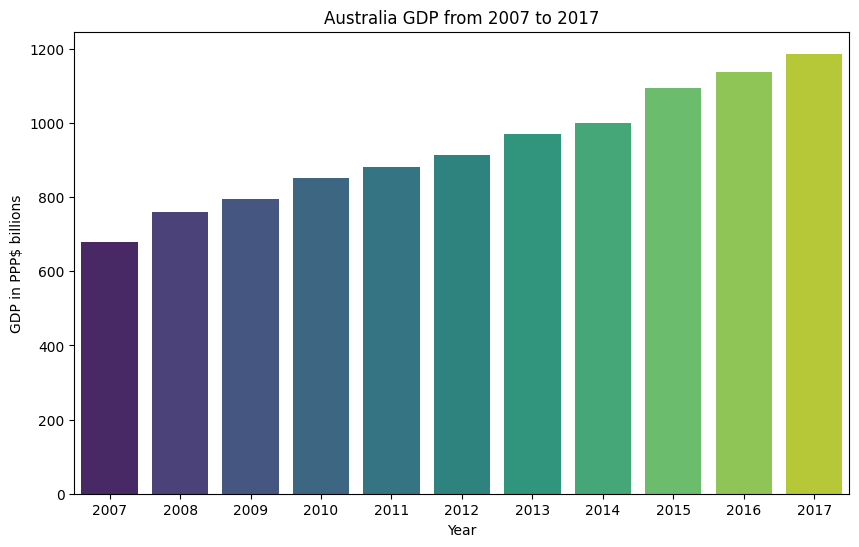

In [36]:
# Tracer le graphique en barres :
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='GDP', data=australia_gdp, palette='viridis')

plt.title('Australia GDP from 2007 to 2017')
plt.ylabel('GDP in PPP$ billions')

plt.show()

# To do : Comprendre pourquoi 2007 et 2008 ont des ordres de grandeur abbérantes

# Analyse par pays

### Korea

#### Korea - Investissements énergie

In [37]:
# Filtre sur le pays pour avoir les postes d'investissement en énergie de 2007 à 2017
budgets_korea = budgets[budgets['Economy Name'] == 'Korea']
budgets_korea = budgets_korea.drop(columns={'Economy Name'})
budgets_korea

Technology     2007     2008     2009  \
153                          Energy efficiency  158.801  151.771  160.843   
154                               Fossil fuels  115.552   95.804  136.186   
155                                 Renewables  129.524   151.78  218.479   
156                                    Nuclear  410.286   112.09  130.563   
157                    Hydrogen and fuel cells   73.429  126.927   93.986   
158       Other power and storage technologies   47.995   88.623   120.67   
159  Other cross-cutting technologies/research      0.0   31.093   36.705   
160                                Unallocated      0.0      0.0      0.0   
161                               Total Budget  935.586  758.088  897.433   

        2010     2011      2012      2013      2014     2015     2016     2017  
153  166.444  152.633   189.883   173.239   173.883  175.284  181.952  224.707  
154  135.243   119.07   157.152   176.102   155.116  155.498   91.879   83.219  
155  274.846  246.099    289.01   276.769   254.233  226.701  242.974  220.966  
156  142.947  188.243   188.905   168.511   161.659  141.214  118.329  107.505  
157   86.056   78.814    58.779    58.193    48.524   45.597   59.593   59.251  
158  127.895  118.507    156.38   176.334   190.369  191.383  180.641  158.838  
159   44.504   35.314    25.254    37.007    35.923   41.864   48.828   52.997  
160      0.0      0.0       0.0       0.0       0.0      0.0      0.0      0.0  
161  977.935   938.68  1065.363  1066.156  1019.707   977.54  924.195  907.483

##### Répartition des investissements par type d'énergie pour une année donnée

In [38]:
# Focus uniquement sur 2017 pour sortir le pie chart de répartition des investissements
columns_to_drop_korea = [str(year) for year in range(2007, 2017)]
budgets_korea_2017 = budgets_korea.drop(columns=columns_to_drop_korea)
budgets_korea_2017

Technology     2017
153                          Energy efficiency  224.707
154                               Fossil fuels   83.219
155                                 Renewables  220.966
156                                    Nuclear  107.505
157                    Hydrogen and fuel cells   59.251
158       Other power and storage technologies  158.838
159  Other cross-cutting technologies/research   52.997
160                                Unallocated      0.0
161                               Total Budget  907.483

In [39]:
# Drop des lignes total & unallocated > à voir en fonction des pays
budgets_korea_2017 = budgets_korea_2017.head(7)
budgets_korea_2017

Technology     2017
153                          Energy efficiency  224.707
154                               Fossil fuels   83.219
155                                 Renewables  220.966
156                                    Nuclear  107.505
157                    Hydrogen and fuel cells   59.251
158       Other power and storage technologies  158.838
159  Other cross-cutting technologies/research   52.997

In [40]:
budgets_korea_2017.dtypes

Technology    object
2017          object
dtype: object

In [41]:
# Mise au bon format int pour les valeurs de l'année 2017
budgets_korea_2017['2017'] = budgets_korea_2017['2017'].astype(int)
budgets_korea_2017

<ipython-input-41-a9038056b636>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets_korea_2017['2017'] = budgets_korea_2017['2017'].astype(int)


Technology  2017
153                          Energy efficiency   224
154                               Fossil fuels    83
155                                 Renewables   220
156                                    Nuclear   107
157                    Hydrogen and fuel cells    59
158       Other power and storage technologies   158
159  Other cross-cutting technologies/research    52

In [42]:
# Tri des valeurs par ordre décroissant
budgets_korea_2017 = budgets_korea_2017.sort_values(by='2017', ascending=False)

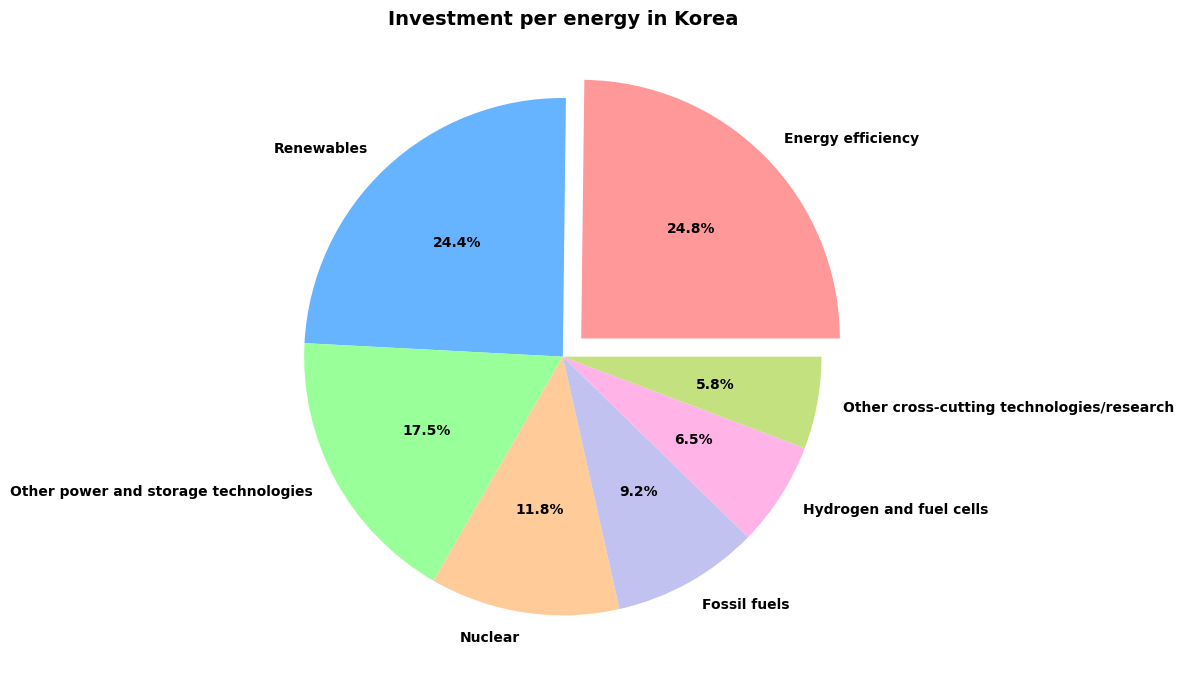

In [43]:
# Définir les données
sizes = budgets_korea_2017['2017']
labels = budgets_korea_2017['Technology']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c4e17f']
explode = [0.1 if size == max(sizes) else 0 for size in sizes]  # Explose seulement le plus grand segment

# Créer le graphique
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%0.1f%%', explode=explode, colors=colors, textprops={'weight': 'bold', 'fontsize': 10})
plt.title('Investment per energy in Korea', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

##### Evolution des investissements en énergie de 2007 à 2017

In [44]:
#retour au full années pour voir l'évolution des investissements sur la période complète et drop du total & unallocated > attention à voir en fonction du pays
budgets_korea

Technology     2007     2008     2009  \
153                          Energy efficiency  158.801  151.771  160.843   
154                               Fossil fuels  115.552   95.804  136.186   
155                                 Renewables  129.524   151.78  218.479   
156                                    Nuclear  410.286   112.09  130.563   
157                    Hydrogen and fuel cells   73.429  126.927   93.986   
158       Other power and storage technologies   47.995   88.623   120.67   
159  Other cross-cutting technologies/research      0.0   31.093   36.705   
160                                Unallocated      0.0      0.0      0.0   
161                               Total Budget  935.586  758.088  897.433   

        2010     2011      2012      2013      2014     2015     2016     2017  
153  166.444  152.633   189.883   173.239   173.883  175.284  181.952  224.707  
154  135.243   119.07   157.152   176.102   155.116  155.498   91.879   83.219  
155  274.846  246.099    289.01   276.769   254.233  226.701  242.974  220.966  
156  142.947  188.243   188.905   168.511   161.659  141.214  118.329  107.505  
157   86.056   78.814    58.779    58.193    48.524   45.597   59.593   59.251  
158  127.895  118.507    156.38   176.334   190.369  191.383  180.641  158.838  
159   44.504   35.314    25.254    37.007    35.923   41.864   48.828   52.997  
160      0.0      0.0       0.0       0.0       0.0      0.0      0.0      0.0  
161  977.935   938.68  1065.363  1066.156  1019.707   977.54  924.195  907.483

In [45]:
budgets_korea = budgets_korea.head(8)

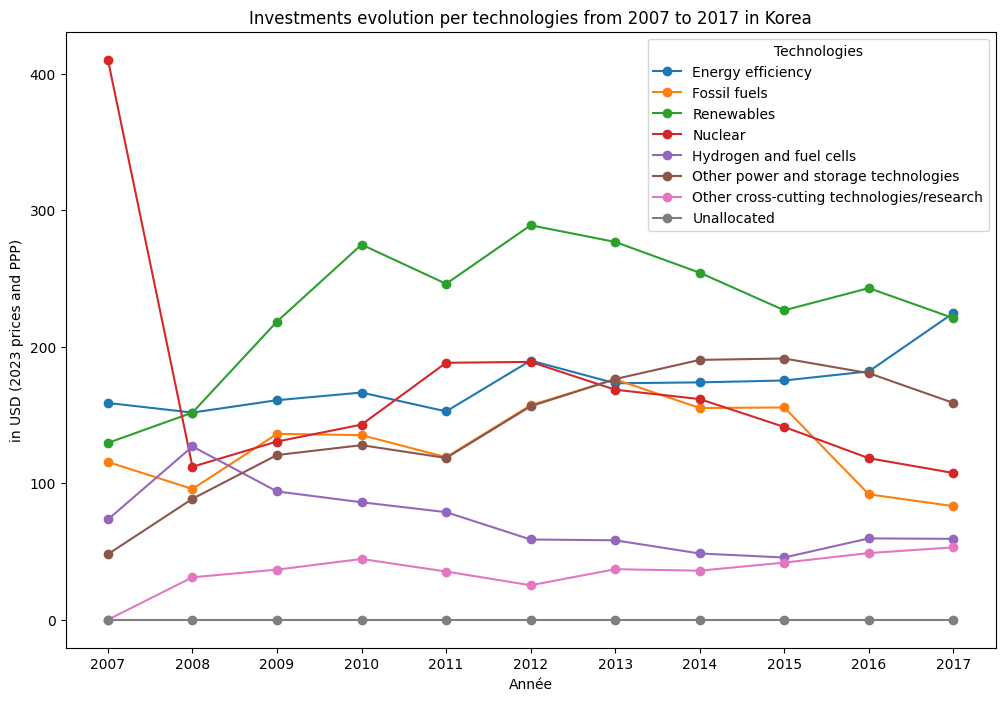

In [46]:
#graph dévolution des investissements
# Mettre 'Technology' comme index
budgets_korea.set_index('Technology', inplace=True)

# Création du graphique en ligne
plt.figure(figsize=(12, 8))

for tech in budgets_korea.index:
    plt.plot(budgets_korea.columns, budgets_korea.loc[tech], marker='o', label=tech)

plt.title('Investments evolution per technologies from 2007 to 2017 in Korea')
plt.xlabel('Année')
plt.ylabel('in USD (2023 prices and PPP)')
plt.legend(title='Technologies')
plt.grid(False)
plt.show()

##### Répartition des investissements ER sur total inv énergie de 2007 à 2017

In [47]:
budgets_korea

2007     2008     2009     2010  \
Technology                                                                      
Energy efficiency                          158.801  151.771  160.843  166.444   
Fossil fuels                               115.552   95.804  136.186  135.243   
Renewables                                 129.524   151.78  218.479  274.846   
Nuclear                                    410.286   112.09  130.563  142.947   
Hydrogen and fuel cells                     73.429  126.927   93.986   86.056   
Other power and storage technologies        47.995   88.623   120.67  127.895   
Other cross-cutting technologies/research      0.0   31.093   36.705   44.504   
Unallocated                                    0.0      0.0      0.0      0.0   

                                              2011     2012     2013     2014  \
Technology                                                                      
Energy efficiency                          152.633  189.883  173.239  173.883   
Fossil fuels                                119.07  157.152  176.102  155.116   
Renewables                                 246.099   289.01  276.769  254.233   
Nuclear                                    188.243  188.905  168.511  161.659   
Hydrogen and fuel cells                     78.814   58.779   58.193   48.524   
Other power and storage technologies       118.507   156.38  176.334  190.369   
Other cross-cutting technologies/research   35.314   25.254   37.007   35.923   
Unallocated                                    0.0      0.0      0.0      0.0   

                                              2015     2016     2017  
Technology                                                            
Energy efficiency                          175.284  181.952  224.707  
Fossil fuels                               155.498   91.879   83.219  
Renewables                                 226.701  242.974  220.966  
Nuclear                                    141.214  118.329  107.505  
Hydrogen and fuel cells                     45.597   59.593   59.251  
Other power and storage technologies       191.383  180.641  158.838  
Other cross-cutting technologies/research   41.864   48.828   52.997  
Unallocated                                    0.0      0.0      0.0

In [48]:
# On repasse le 'Technology' en en-tête
budgets_korea = budgets_korea.reset_index()
budgets_korea

Technology     2007     2008     2009  \
0                          Energy efficiency  158.801  151.771  160.843   
1                               Fossil fuels  115.552   95.804  136.186   
2                                 Renewables  129.524   151.78  218.479   
3                                    Nuclear  410.286   112.09  130.563   
4                    Hydrogen and fuel cells   73.429  126.927   93.986   
5       Other power and storage technologies   47.995   88.623   120.67   
6  Other cross-cutting technologies/research      0.0   31.093   36.705   
7                                Unallocated      0.0      0.0      0.0   

      2010     2011     2012     2013     2014     2015     2016     2017  
0  166.444  152.633  189.883  173.239  173.883  175.284  181.952  224.707  
1  135.243   119.07  157.152  176.102  155.116  155.498   91.879   83.219  
2  274.846  246.099   289.01  276.769  254.233  226.701  242.974  220.966  
3  142.947  188.243  188.905  168.511  161.659  141.214  118.329  107.505  
4   86.056   78.814   58.779   58.193   48.524   45.597   59.593   59.251  
5  127.895  118.507   156.38  176.334  190.369  191.383  180.641  158.838  
6   44.504   35.314   25.254   37.007   35.923   41.864   48.828   52.997  
7      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0

In [49]:
Technology_a_conserver = ['Renewables', 'Total Budget']

budgets_korea_ERtot = budgets_korea[budgets_korea['Technology'].isin(Technology_a_conserver)]
budgets_korea_ERtot

Technology     2007    2008     2009     2010     2011    2012     2013  \
2  Renewables  129.524  151.78  218.479  274.846  246.099  289.01  276.769   

      2014     2015     2016     2017  
2  254.233  226.701  242.974  220.966

In [50]:
budgets_korea_ERtot.dtypes

Technology    object
2007          object
2008          object
2009          object
2010          object
2011          object
2012          object
2013          object
2014          object
2015          object
2016          object
2017          object
dtype: object

In [51]:
colonne_to_float = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

In [52]:
budgets_korea_ERtot[colonne_to_float] = budgets_korea_ERtot[colonne_to_float].astype(float)

<ipython-input-52-a9fd92aad874>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets_korea_ERtot[colonne_to_float] = budgets_korea_ERtot[colonne_to_float].astype(float)


In [53]:
budgets_korea_ERtot.dtypes

Technology     object
2007          float64
2008          float64
2009          float64
2010          float64
2011          float64
2012          float64
2013          float64
2014          float64
2015          float64
2016          float64
2017          float64
dtype: object

In [54]:
budgets_korea_ERtot.set_index('Technology', inplace= True)

In [55]:
budgets_korea_ERtot2 = budgets_korea_ERtot.T
budgets_korea_ERtot2

Technology  Renewables
2007           129.524
2008           151.780
2009           218.479
2010           274.846
2011           246.099
2012           289.010
2013           276.769
2014           254.233
2015           226.701
2016           242.974
2017           220.966

In [57]:
# Calculer la part des renouvelables et des autres pour chaque année
budgets_korea_ERtot2['Non-Renewables'] = budgets_korea_ERtot2['Total Budget'] - budgets_korea_ERtot2['Renewables']

KeyError: 'Total Budget'

KeyError: "['Non-Renewables'] not in index"

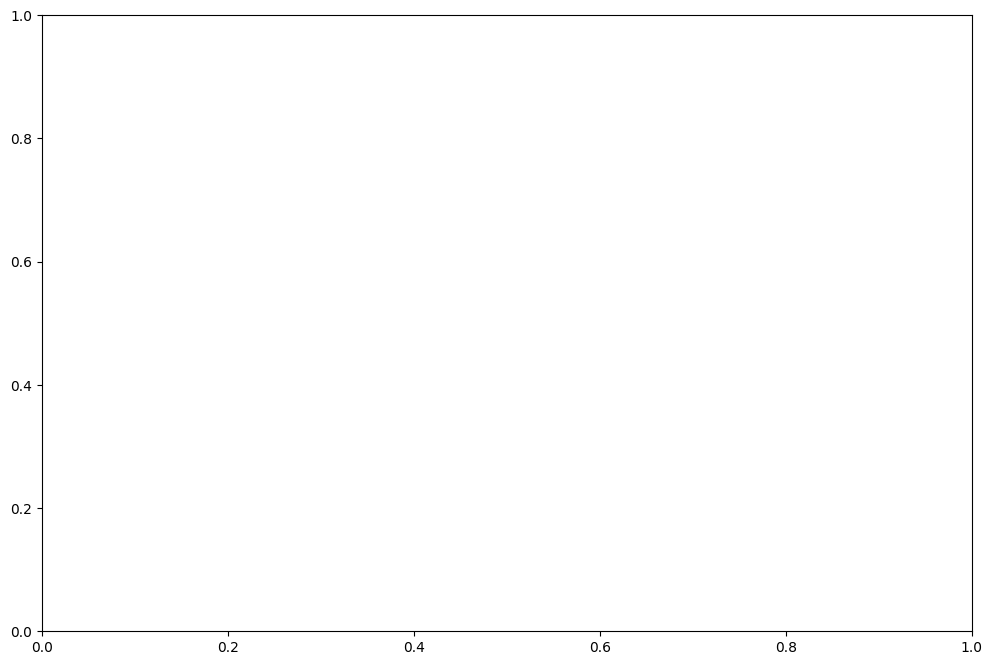

In [58]:
#l'index était de type str donc je l'ai passé en int pour éviter l'erreur
budgets_korea_ERtot2.index = budgets_korea_ERtot2.index.astype(int)

# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(12, 8))

# Tracer les barres empilées
budgets_korea_ERtot2[['Renewables', 'Non-Renewables']].plot(kind='bar', stacked=True, ax=ax, color=['#0E402D', '#A7D49B'])

# Ajouter les annotations pour les pourcentages des renouvelables
for i, (index, row) in enumerate(budgets_korea_ERtot2.iterrows()):
    total = row['Total Budget']
    renewables = row['Renewables']
    percentage = renewables / total * 100
    ax.text(i, renewables + row['Non-Renewables'] * 0.01, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Configuration des étiquettes et du titre
ax.set_xlabel('Année')
ax.set_ylabel('Budget (en millions)')
ax.set_title('Budget total avec la part des renouvelables (2007-2017)')
ax.legend(['Renouvelables', 'Non-renouvelables'], loc='upper left')
ax.set_xticks(range(len(budgets_korea_ERtot2.index)))
ax.set_xticklabels(budgets_korea_ERtot2.index, rotation=30)
plt.tight_layout()
plt.show()

##### Ratio investissements ER / Total Energies

In [59]:
# Ensemble des investissements en énergies renouvelables par pays sur la période complète
budgets_renewables = budgets[(budgets['Technology'] == 'Renewables')]

In [60]:
#merge des deux data frames pour avoir l'ensemble des I en ER et le GDP par pays sur la période
budgets_renewables_gdp = budgets_renewables.merge(df_economy_gdp, on='Economy Name')


In [61]:
budgets_renewables_gdp.columns

Index(['Economy Name', 'Technology', '2007_x', '2008_x', '2009_x', '2010_x',
       '2011_x', '2012_x', '2013_x', '2014_x', '2015_x', '2016_x', '2017_x',
       '2007_y', '2008_y', '2009_y', '2010_y', '2011_y', '2012_y', '2013_y',
       '2014_y', '2015_y', '2016_y', '2017_y'],
      dtype='object')

In [62]:
#clean des noms de colonnes
budgets_renewables_gdp = budgets_renewables_gdp.rename(columns={'2007_x' : '2007_ER' , '2008_x' : '2008_ER', '2009_x' : '2009_ER',
                                                                '2010_x' : '2010_ER',
       '2011_x' : '2011_ER', '2012_x' : '2012_ER', '2013_x' : '2013_ER' , '2014_x' : '2014_ER', '2015_x' : '2015_ER',
        '2016_x' : '2016_ER', '2017_x' : '2017_ER',
       '2007_y' : '2007_GDP', '2008_y' : '2008_GDP', '2009_y' : '2009_GDP', '2010_y' : '2010_GDP', '2011_y' : '2011_GDP',
       '2012_y' : '2012_GDP', '2013_y' : '2013_GDP',
       '2014_y' : '2014_GDP', '2015_y' : '2015_GDP', '2016_y' : '2016_GDP', '2017_y' : '2017_GDP'})


In [63]:
#déplacement des colonnes pour regrouper les ER et GDP par année
budgets_renewables_gdp = budgets_renewables_gdp[['Economy Name', 'Technology', '2007_ER',  '2007_GDP', '2008_ER', '2008_GDP', '2009_ER', '2009_GDP',
       '2010_ER', '2010_GDP', '2011_ER', '2011_GDP', '2012_ER', '2012_GDP', '2013_ER', '2013_GDP', '2014_ER', '2014_GDP', '2015_ER', '2015_GDP',
       '2016_ER', '2016_GDP', '2017_ER', '2017_GDP']]

In [64]:
# Fonction pour calculer la part des investissements en ER sur le total GDP
def calcul_part_ER_gdp (budgets_renewables_gdp):
        for year in range(2007, 2018):
            er_col = f'{year}_ER'
            gdp_col = f'{year}_GDP'
            share_col = f'{year}_ER_GDP_Share'
            budgets_renewables_gdp[share_col] = budgets_renewables_gdp[er_col] / budgets_renewables_gdp[gdp_col]
        return budgets_renewables_gdp

# Calculer la part des investissements en ER sur le total GDP
budgets_renewables_gdp_share = calcul_part_ER_gdp (budgets_renewables_gdp)

In [65]:
#drop des colonnes inutiles
budgets_share_ER_GDP = budgets_renewables_gdp_share.drop(columns= ['2007_ER', '2007_GDP', '2008_ER',
       '2008_GDP', '2009_ER', '2009_GDP', '2010_ER', '2010_GDP', '2011_ER',
       '2011_GDP', '2012_ER', '2012_GDP', '2013_ER', '2013_GDP', '2014_ER',
       '2014_GDP', '2015_ER', '2015_GDP', '2016_ER', '2016_GDP', '2017_ER',
       '2017_GDP'] )

In [66]:
budgets_share_ER_GDP_Korea = budgets_share_ER_GDP[(budgets_share_ER_GDP['Economy Name'] == 'Korea')]
budgets_share_ER_GDP_Korea

Economy Name  Technology 2007_ER_GDP_Share 2008_ER_GDP_Share  \
17        Korea  Renewables          0.112088          0.126391   

   2009_ER_GDP_Share 2010_ER_GDP_Share 2011_ER_GDP_Share 2012_ER_GDP_Share  \
17           0.16276          0.201478          0.168648           0.18596   

   2013_ER_GDP_Share 2014_ER_GDP_Share 2015_ER_GDP_Share 2016_ER_GDP_Share  \
17          0.171489          0.152531          0.127445          0.131442   

   2017_ER_GDP_Share  
17          0.114252

In [67]:
#transposer pour préparer la visu histogramme
budgets_share_ER_GDP_Korea_T = budgets_share_ER_GDP_Korea.T
budgets_share_ER_GDP_Korea_T

17
Economy Name            Korea
Technology         Renewables
2007_ER_GDP_Share    0.112088
2008_ER_GDP_Share    0.126391
2009_ER_GDP_Share     0.16276
2010_ER_GDP_Share    0.201478
2011_ER_GDP_Share    0.168648
2012_ER_GDP_Share     0.18596
2013_ER_GDP_Share    0.171489
2014_ER_GDP_Share    0.152531
2015_ER_GDP_Share    0.127445
2016_ER_GDP_Share    0.131442
2017_ER_GDP_Share    0.114252

In [68]:
budgets_share_ER_GDP_Korea_T = budgets_share_ER_GDP_Korea_T.drop(budgets_share_ER_GDP_Korea_T.index[0])

In [69]:
#Double drop index pour enlever les 2 premières lignes
budgets_share_ER_GDP_Korea_T = budgets_share_ER_GDP_Korea_T.drop(budgets_share_ER_GDP_Korea_T.index[0])

In [70]:
budgets_share_ER_GDP_Korea_T = budgets_share_ER_GDP_Korea_T.reset_index()
budgets_share_ER_GDP_Korea_T

index        17
0   2007_ER_GDP_Share  0.112088
1   2008_ER_GDP_Share  0.126391
2   2009_ER_GDP_Share   0.16276
3   2010_ER_GDP_Share  0.201478
4   2011_ER_GDP_Share  0.168648
5   2012_ER_GDP_Share   0.18596
6   2013_ER_GDP_Share  0.171489
7   2014_ER_GDP_Share  0.152531
8   2015_ER_GDP_Share  0.127445
9   2016_ER_GDP_Share  0.131442
10  2017_ER_GDP_Share  0.114252

In [72]:
budgets_share_ER_GDP_Korea_T = budgets_share_ER_GDP_Korea_T.rename(columns={'index':'annee', 17:'Part_ER_GDP'})
budgets_share_ER_GDP_Korea_T

annee Part_ER_GDP
0   2007_ER_GDP_Share    0.112088
1   2008_ER_GDP_Share    0.126391
2   2009_ER_GDP_Share     0.16276
3   2010_ER_GDP_Share    0.201478
4   2011_ER_GDP_Share    0.168648
5   2012_ER_GDP_Share     0.18596
6   2013_ER_GDP_Share    0.171489
7   2014_ER_GDP_Share    0.152531
8   2015_ER_GDP_Share    0.127445
9   2016_ER_GDP_Share    0.131442
10  2017_ER_GDP_Share    0.114252

In [73]:
budgets_share_ER_GDP_Korea_T['Part_ER_GDP_%'] = budgets_share_ER_GDP_Korea_T['Part_ER_GDP'] * 100
budgets_share_ER_GDP_Korea_T

annee Part_ER_GDP Part_ER_GDP_%
0   2007_ER_GDP_Share    0.112088     11.208765
1   2008_ER_GDP_Share    0.126391     12.639065
2   2009_ER_GDP_Share     0.16276     16.275981
3   2010_ER_GDP_Share    0.201478     20.147784
4   2011_ER_GDP_Share    0.168648     16.864759
5   2012_ER_GDP_Share     0.18596     18.596017
6   2013_ER_GDP_Share    0.171489     17.148867
7   2014_ER_GDP_Share    0.152531     15.253126
8   2015_ER_GDP_Share    0.127445      12.74446
9   2016_ER_GDP_Share    0.131442     13.144245
10  2017_ER_GDP_Share    0.114252     11.425159

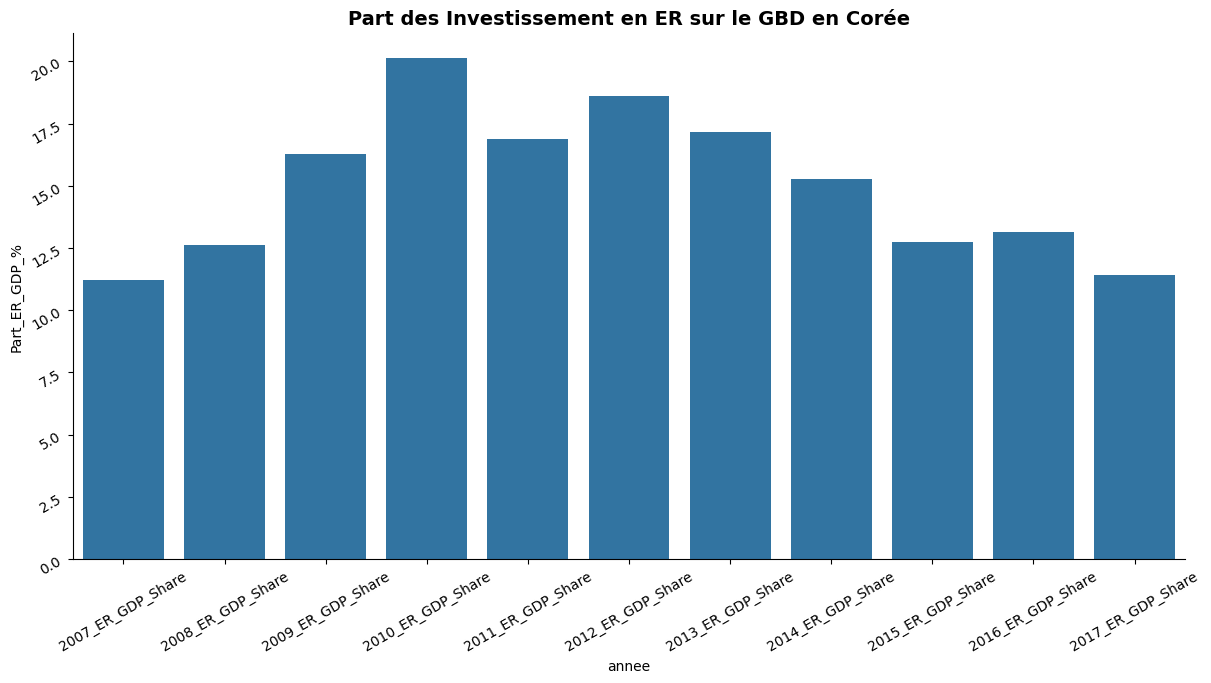

<Figure size 700x600 with 0 Axes>

In [74]:
sns.catplot(data=budgets_share_ER_GDP_Korea_T, x='annee', y='Part_ER_GDP_%', kind="bar", height=6, aspect=2)

plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.title('Part des Investissement en ER sur le GBD en Corée',  fontweight='bold', fontsize=14)
plt.figure(figsize=(7,6)) # autre option pour ajuster la taille
plt.show()

#### Korea - Economie

In [75]:
df_economy_korea = df_economy[(df_economy['Economy Name'] == 'Korea, Rep.') & (df_economy['Attribute 1'] == 'Value')]
df_economy_korea

Economy ISO3 Economy Name            Indicator ID  \
6521          KOR  Korea, Rep.     WEF.GCIHH.AIRSEATKM   
6523          KOR  Korea, Rep.       WEF.GCIHH.BBSUBPC   
6525          KOR  Korea, Rep.      WEF.GCIHH.BRIBEIDX   
6527          KOR  Korea, Rep.      WEF.GCIHH.CCRATING   
6529          KOR  Korea, Rep.   WEF.GCIHH.CORPTAXRATE   
...           ...          ...                     ...   
6837          KOR  Korea, Rep.      WEF.GCIHH.SHRGDPWL   
6839          KOR  Korea, Rep.  WEF.GCIHH.STARTBUSDAYS   
6841          KOR  Korea, Rep.  WEF.GCIHH.STARTBUSPROC   
6843          KOR  Korea, Rep.          WEF.GCIHH.TBPC   
6845          KOR  Korea, Rep.        WEF.GCIHH.TFDUTY   

                                            Indicator Attribute 1 Attribute 2  \
6521         Available airline seat km/week, millions       Value           -   
6523  Fixed broadband Internet subscriptions/100 pop.       Value           -   
6525        Irregular payments and bribes, 1-7 (best)       Value           -   
6527              Country credit rating, 0-100 (best)       Value           -   
6529                        Total tax rate, % profits       Value           -   
...                                               ...         ...         ...   
6837            GDP (PPP) as share (%) of world total       Value           -   
6839                     No. days to start a business       Value           -   
6841               No. procedures to start a business       Value           -   
6843                  Tuberculosis cases/100,000 pop.       Value           -   
6845                            Trade tariffs, % duty       Value           -   

     Attribute 3 Partner     2007     2008     2009     2010     2011  \
6521           -       -  1588.43  1701.26  1647.86  1665.34  1920.23   
6523           -       -    25.24    29.27    31.98    33.82    36.63   
6525           -       -      NaN      NaN      NaN     4.62     4.52   
6527           -       -      NaN      NaN      NaN      NaN      NaN   
6529           -       -    30.90    34.90    33.70    31.90    29.80   
...          ...     ...      ...      ...      ...      ...      ...   
6837           -       -      NaN     1.85     1.85     1.94     1.97   
6839           -       -    22.00    17.00    17.00    14.00    14.00   
6841           -       -    12.00    10.00    10.00     8.00     8.00   
6843           -       -    96.41    88.00    90.00    88.00    90.00   
6845           -       -     8.00     9.85     8.03     6.55     7.24   

         2012     2013     2014     2015     2016     2017  
6521  2090.81  2167.37  2293.07  2445.99  2631.01  2830.55  
6523    36.91    37.56    38.04    38.78    40.25    41.13  
6525     4.44     4.35     4.39     4.48     4.45     4.67  
6527      NaN      NaN      NaN      NaN      NaN    81.69  
6529    29.70    29.80    27.90    32.40    33.20    33.10  
...       ...      ...      ...      ...      ...      ...  
6837     1.97     1.94      NaN      NaN      NaN      NaN  
6839     7.00     7.00     5.50     4.00     4.00     4.00  
6841     5.00     5.00     5.00     3.00     3.00     2.00  
6843    97.00   100.00   108.00    97.00    86.00    80.00  
6845     8.52     8.60     8.50     6.78     7.08     7.20  

[163 rows x 19 columns]

In [76]:
## Je pense qu'on n'a pas besoin de ces lignes comme tu as déjà mis le clean tout en haut du script
# Clean DF des colonnes inutiles
df_economy_korea = df_economy_korea.drop(columns=["Economy ISO3", "Economy Name", "Indicator ID", "Attribute 1", "Attribute 2", "Attribute 3", "Partner"])

##### Evolution GDP (PPP$ billions) 2007 to 2017

In [77]:
#Je pense qu'on n'a pas besoin de ces lignes comme tu as déjà mis le clean tout en haut du script
df_economy_korea_gdp = df_economy_korea[df_economy_korea['Indicator'] == 'GDP (PPP$ billions)']
df_economy_korea_gdp

Indicator       2007       2008     2009     2010     2011  \
6799  GDP (PPP$ billions)  1155565.0  1200879.0  1342.34  1364.15  1459.25   

         2012     2013     2014     2015     2016     2017  
6799  1554.15  1613.92  1666.76  1778.82  1848.52  1934.03

In [78]:
## Je pense qu'on n'a pas besoin de ces lignes comme tu as déjà mis le clean tout en haut du script
df_economy_gdp

Economy Name      2007      2008      2009      2010      2011  \
279          Australia    680.15    760.81    795.30    851.17    882.36   
605            Austria    297.73    317.81    328.57    322.51    332.00   
931            Belgium    364.65    375.99    389.52    382.75    394.35   
1257            Brazil   1701.18   1835.64   1981.21   2013.19   2172.06   
1583            Canada   1156.46   1265.84   1303.23   1281.06   1330.27   
1909       Switzerland    272.30    300.19    312.75    314.87    324.51   
2235             Chile    212.67    231.06    243.04    243.57    257.88   
2561           Czechia    236.54    248.90    262.17    252.95    261.29   
2887           Germany   2558.91   2809.69   2910.49   2806.27   2940.43   
3213           Denmark    198.37    203.68    204.06    197.06    201.74   
3539             Spain   1214.93   1351.61   1396.88   1360.60   1368.64   
3865           Estonia     24.49     28.32     27.21     24.00     24.69   
4191           Finland    182.63    185.48    190.86    179.60    185.98   
4517            France   1934.68   2046.90   2130.38   2108.23   2145.49   
4843    United Kingdom   2121.77   2137.42   2230.55   2139.40   2172.77   
5169            Greece    289.48    324.62    341.13    333.53    318.08   
5495           Hungary    197.09    191.32    196.07    185.87    187.63   
5821           Ireland    186.70    186.17    188.11    175.06    172.34   
6147             Italy   1790.90   1786.43   1814.56   1740.12   1773.55   
6473             Japan   4170.53   4289.81   4354.37   4159.43   4309.53   
6799             Korea   1155.56   1200.88   1342.34   1364.15   1459.25   
7125         Lithuania     54.86     59.64     63.62     55.16     56.59   
7451        Luxembourg     37.12     38.56     40.02     38.81     41.09   
7777            Mexico   1171.51   1346.01   1548.01   1465.73   1567.47   
8103       Netherlands    573.33    639.51    675.38    658.23    676.90   
8429            Norway    202.06    247.42    256.52    254.54    255.28   
8755       New Zealand    105.82    111.72    115.71    115.41    117.81   
9081            Poland    566.89    620.87    666.05    688.76    721.32   
9407          Portugal    239.47    230.55    235.90    232.66    247.04   
9733   Slovak Republic     95.02    109.59    119.27    115.10    120.17   
10059           Sweden    312.81    334.64    341.87    331.50    354.72   
10385          Turkiye    660.84    887.96    915.18    880.06    960.51   
10711    United States  13020.86  13843.82  14264.60  14256.28  14657.80   

           2012      2013      2014      2015      2016      2017  
279      914.48    970.76    999.60   1095.38   1138.08   1187.32  
605      352.02    359.02    361.40    395.49    404.29    417.23  
931      413.28    420.31    422.81    481.47    494.12    509.53  
1257    2294.24   2355.59   2423.31   3263.83   3192.40   3141.33  
1583    1396.13   1488.31   1526.08   1591.58   1631.94   1682.36  
1909     339.89    363.42    371.57    472.83    482.35    495.96  
2235     299.63    320.54    334.76    409.33    422.42    438.75  
2561     284.95    286.95    286.04    314.58    332.48    350.72  
2887    3099.08   3197.07   3232.54   3721.55   3840.55   3980.28  
3213     206.59    210.15    211.92    249.53    258.70    273.86  
3539    1413.47   1410.63   1391.35   1566.37   1615.07   1686.89  
3865      27.31     29.09     29.77     35.62     37.55     38.45  
4191     195.72    197.48    194.16    221.04    225.00    231.37  
4517    2217.90   2254.07   2278.00   2580.75   2646.89   2733.68  
4843    2260.80   2336.30   2390.87   2548.89   2679.32   2785.56  
5169     294.34    276.88    265.63    284.26    285.98    289.40  
5495     195.64    195.63    198.22    246.35    258.44    270.29  
5821     181.60    192.22    188.88    226.77    257.42    324.90  
6147    1846.95   1832.92   1807.83   2127.74   2170.91   2234.50  
6473    4440.38   4627.89   4698.80   4750.77   4830.06   5237.79

In [79]:
## Je pense qu'on n'a pas besoin de ces lignes comme tu as déjà mis le clean tout en haut du script
# Diviser les valeurs des colonnes 2007 et 2008 par 100 pour corriger l'ordre de grandeur constaté sur ces 2 années
df_economy_korea_gdp['2007'] = df_economy_korea_gdp['2007'] / 1000
df_economy_korea_gdp['2008'] = df_economy_korea_gdp['2008'] / 1000

<ipython-input-79-1d0254c7f351>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_economy_korea_gdp['2007'] = df_economy_korea_gdp['2007'] / 1000
<ipython-input-79-1d0254c7f351>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_economy_korea_gdp['2008'] = df_economy_korea_gdp['2008'] / 1000


In [80]:
## Je pense qu'on n'a pas besoin de ces lignes comme tu as déjà mis le clean tout en haut du script
# Vérifier que les valeurs 2007 et 2008 sont bien corrigées
df_economy_korea_gdp

Indicator      2007      2008     2009     2010     2011  \
6799  GDP (PPP$ billions)  1155.565  1200.879  1342.34  1364.15  1459.25   

         2012     2013     2014     2015     2016     2017  
6799  1554.15  1613.92  1666.76  1778.82  1848.52  1934.03

In [81]:
df_economy_korea_gdp_t = df_economy_korea_gdp.set_index('Indicator').T
df_economy_korea_gdp_t.index.name = "Year"
df_economy_korea_gdp_t.reset_index(inplace=True)

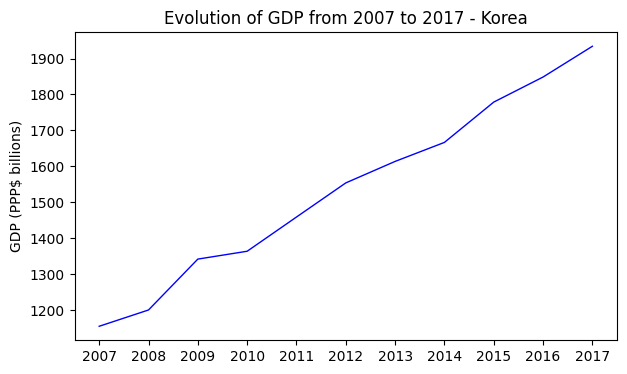

In [82]:
# Tracer le graphique en lignes
plt.figure(figsize=(7, 4))
plt.plot(df_economy_korea_gdp_t['Year'], df_economy_korea_gdp_t['GDP (PPP$ billions)'], linestyle='-', color='blue', linewidth=1)

# Ajouter des étiquettes et un titre
plt.ylabel('GDP (PPP$ billions)')
plt.title('Evolution of GDP from 2007 to 2017 - Korea')

# Afficher le graphique
plt.grid(False)
plt.show()

##### Pilliers 2007 versus 2017

In [83]:
# Liste des indicateurs que je souhaite conserver
indicators_to_keep = [
    "1st pillar: Institutions",
    "2nd pillar: Infrastructure",
    "3rd pillar: Macroeconomic environment",
    "4th pillar: Health and primary education",
    "5th pillar: Higher education and training",
    "6th pillar: Goods market efficiency",
    "7th pillar: Labor market efficiency",
    "8th pillar: Financial market development",
    "9th pillar: Technological readiness",
    "10th pillar: Market size",
    "11th pillar: Business sophistication",
    "12th pillar: Innovation",
    #"GDP (PPP$ billions)"
]


In [84]:
df_economy_korea

Indicator     2007     2008  \
6521         Available airline seat km/week, millions  1588.43  1701.26   
6523  Fixed broadband Internet subscriptions/100 pop.    25.24    29.27   
6525        Irregular payments and bribes, 1-7 (best)      NaN      NaN   
6527              Country credit rating, 0-100 (best)      NaN      NaN   
6529                        Total tax rate, % profits    30.90    34.90   
...                                               ...      ...      ...   
6837            GDP (PPP) as share (%) of world total      NaN     1.85   
6839                     No. days to start a business    22.00    17.00   
6841               No. procedures to start a business    12.00    10.00   
6843                  Tuberculosis cases/100,000 pop.    96.41    88.00   
6845                            Trade tariffs, % duty     8.00     9.85   

         2009     2010     2011     2012     2013     2014     2015     2016  \
6521  1647.86  1665.34  1920.23  2090.81  2167.37  2293.07  2445.99  2631.01   
6523    31.98    33.82    36.63    36.91    37.56    38.04    38.78    40.25   
6525      NaN     4.62     4.52     4.44     4.35     4.39     4.48     4.45   
6527      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6529    33.70    31.90    29.80    29.70    29.80    27.90    32.40    33.20   
...       ...      ...      ...      ...      ...      ...      ...      ...   
6837     1.85     1.94     1.97     1.97     1.94      NaN      NaN      NaN   
6839    17.00    14.00    14.00     7.00     7.00     5.50     4.00     4.00   
6841    10.00     8.00     8.00     5.00     5.00     5.00     3.00     3.00   
6843    90.00    88.00    90.00    97.00   100.00   108.00    97.00    86.00   
6845     8.03     6.55     7.24     8.52     8.60     8.50     6.78     7.08   

         2017  
6521  2830.55  
6523    41.13  
6525     4.67  
6527    81.69  
6529    33.10  
...       ...  
6837      NaN  
6839     4.00  
6841     2.00  
6843    80.00  
6845     7.20  

[163 rows x 12 columns]

In [85]:
# Dataframe Korea avec uniquement les indicateurs qui m'intéressent
df_economy_korea = df_economy_korea.loc[df_economy_korea['Indicator'].isin(indicators_to_keep)]
df_economy_korea

Indicator  2007  2008  2009  2010  2011  \
6711                   1st pillar: Institutions  5.05  4.95  4.23  3.98  3.89   
6731                 2nd pillar: Infrastructure  5.55  5.63  5.60  5.59  5.94   
6737      3rd pillar: Macroeconomic environment  6.00  6.15  5.80  5.76  6.37   
6739   4th pillar: Health and primary education  6.08  6.10  5.99  6.34  6.38   
6747  5th pillar: Higher education and training  5.65  5.51  5.24  5.42  5.44   
6755        6th pillar: Goods market efficiency  5.23  5.00  4.64  4.55  4.57   
6765        7th pillar: Labor market efficiency  4.79  4.60  4.22  4.27  4.30   
6771   8th pillar: Financial market development  5.15  4.85  4.36  3.99  3.95   
6777        9th pillar: Technological readiness  5.46  5.51  5.50  5.05  5.33   
6783                   10th pillar: Market size  5.37  5.44  5.56  5.56  5.57   
6791       11th pillar: Business sophistication  5.47  5.22  4.91  4.81  4.86   
6793                    12th pillar: Innovation  5.36  5.18  4.84  4.81  4.89   

      2012  2013  2014  2015  2016  2017  
6711  3.98  3.84  3.70  3.90  4.02  4.04  
6731  5.92  5.85  5.74  5.82  5.96  6.08  
6737  6.25  6.32  6.44  6.58  6.58  6.63  
6739  6.49  6.37  6.31  6.34  6.28  6.34  
6747  5.52  5.41  5.38  5.36  5.32  5.34  
6755  4.75  4.68  4.70  4.81  4.93  4.97  
6765  4.35  4.21  4.07  4.08  4.14  4.18  
6771  4.06  3.89  3.81  3.60  3.86  3.90  
6777  5.70  5.57  5.42  5.50  5.54  5.65  
6783  5.60  5.61  5.60  5.56  5.51  5.53  
6791  4.99  4.86  4.73  4.80  4.87  4.91  
6793  4.94  4.78  4.83  4.83  4.75  4.78

In [86]:
# Extraire les données pour les années 2007 et 2017
data_2007 = df_economy_korea['2007']
data_2017 = df_economy_korea['2017']
indicators = df_economy_korea['Indicator']

In [87]:
# Trier le DataFrame par les valeurs de 2007
df_economy_korea_sorted = df_economy_korea.sort_values(by='2007', ascending=False)
df_economy_korea_sorted

Indicator  2007  2008  2009  2010  2011  \
6739   4th pillar: Health and primary education  6.08  6.10  5.99  6.34  6.38   
6737      3rd pillar: Macroeconomic environment  6.00  6.15  5.80  5.76  6.37   
6747  5th pillar: Higher education and training  5.65  5.51  5.24  5.42  5.44   
6731                 2nd pillar: Infrastructure  5.55  5.63  5.60  5.59  5.94   
6791       11th pillar: Business sophistication  5.47  5.22  4.91  4.81  4.86   
6777        9th pillar: Technological readiness  5.46  5.51  5.50  5.05  5.33   
6783                   10th pillar: Market size  5.37  5.44  5.56  5.56  5.57   
6793                    12th pillar: Innovation  5.36  5.18  4.84  4.81  4.89   
6755        6th pillar: Goods market efficiency  5.23  5.00  4.64  4.55  4.57   
6771   8th pillar: Financial market development  5.15  4.85  4.36  3.99  3.95   
6711                   1st pillar: Institutions  5.05  4.95  4.23  3.98  3.89   
6765        7th pillar: Labor market efficiency  4.79  4.60  4.22  4.27  4.30   

      2012  2013  2014  2015  2016  2017  
6739  6.49  6.37  6.31  6.34  6.28  6.34  
6737  6.25  6.32  6.44  6.58  6.58  6.63  
6747  5.52  5.41  5.38  5.36  5.32  5.34  
6731  5.92  5.85  5.74  5.82  5.96  6.08  
6791  4.99  4.86  4.73  4.80  4.87  4.91  
6777  5.70  5.57  5.42  5.50  5.54  5.65  
6783  5.60  5.61  5.60  5.56  5.51  5.53  
6793  4.94  4.78  4.83  4.83  4.75  4.78  
6755  4.75  4.68  4.70  4.81  4.93  4.97  
6771  4.06  3.89  3.81  3.60  3.86  3.90  
6711  3.98  3.84  3.70  3.90  4.02  4.04  
6765  4.35  4.21  4.07  4.08  4.14  4.18

In [88]:
# Extraire les données triées pour les années 2007
data_2007 = df_economy_korea_sorted['2007']
indicators = df_economy_korea_sorted['Indicator']

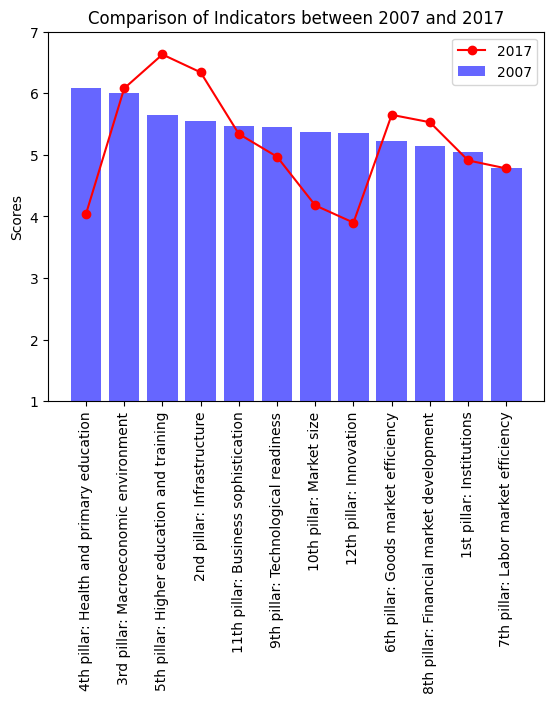

In [89]:
# Créer le graphique
fig, ax = plt.subplots()

# Créer l'histogramme pour l'année 2007
ax.bar(indicators, data_2007, color='b', alpha=0.6, label='2007')

# Ajouter une courbe pour l'année 2017
ax.plot(indicators, data_2017, color='r', marker='o', label='2017')

# Définir les limites de l'axe Y de 1 à 7
ax.set_ylim(1, 7)

# Ajouter des étiquettes et un titre
#ax.set_xlabel('Indicator')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Indicators between 2007 and 2017')
ax.tick_params(axis='x', rotation=90)

# Ajouter une légende
ax.legend()


# Afficher le graphique
plt.show()

##### Pilliers comparatif au meilleur et moins bon pays sur une année donnée

In [90]:
df_economy_value = df_economy[(df_economy['Attribute 1'] == "Value")]

In [91]:
indices_a_conserver = ['1st pillar: Institutions', '2nd pillar: Infrastructure', '3rd pillar: Macroeconomic environment',
       '4th pillar: Health and primary education', '5th pillar: Higher education and training', '6th pillar: Goods market efficiency',
       '7th pillar: Labor market efficiency', '8th pillar: Financial market development', '9th pillar: Technological readiness',
       '10th pillar: Market size', '11th pillar: Business sophistication', '12th pillar: Innovation',]

df_economy_Monde = df_economy_value[df_economy_value['Indicator'].isin(indices_a_conserver)]
df_economy_Monde

Economy ISO3   Economy Name        Indicator ID  \
191            AUS      Australia  WEF.GCIHH.GCI.A.01   
211            AUS      Australia  WEF.GCIHH.GCI.A.02   
217            AUS      Australia  WEF.GCIHH.GCI.A.03   
219            AUS      Australia  WEF.GCIHH.GCI.A.04   
227            AUS      Australia  WEF.GCIHH.GCI.B.05   
...            ...            ...                 ...   
10683          USA  United States  WEF.GCIHH.GCI.B.08   
10689          USA  United States  WEF.GCIHH.GCI.B.09   
10695          USA  United States  WEF.GCIHH.GCI.B.10   
10703          USA  United States  WEF.GCIHH.GCI.C.11   
10705          USA  United States  WEF.GCIHH.GCI.C.12   

                                       Indicator Attribute 1 Attribute 2  \
191                     1st pillar: Institutions       Value           -   
211                   2nd pillar: Infrastructure       Value           -   
217        3rd pillar: Macroeconomic environment       Value           -   
219     4th pillar: Health and primary education       Value           -   
227    5th pillar: Higher education and training       Value           -   
...                                          ...         ...         ...   
10683   8th pillar: Financial market development       Value           -   
10689        9th pillar: Technological readiness       Value           -   
10695                   10th pillar: Market size       Value           -   
10703       11th pillar: Business sophistication       Value           -   
10705                    12th pillar: Innovation       Value           -   

      Attribute 3 Partner  2007  2008  2009  2010  2011  2012  2013  2014  \
191             -       -  5.66  5.72  5.60  5.49  5.39  5.27  5.04  5.14   
211             -       -  5.53  5.33  5.19  5.44  5.43  5.70  5.60  5.60   
217             -       -  5.39  5.66  5.56  5.55  5.62  5.57  5.75  5.61   
219             -       -  6.26  6.27  6.18  6.49  6.51  6.46  6.36  6.46   
227             -       -  5.46  5.44  5.33  5.53  5.62  5.64  5.51  5.67   
...           ...     ...   ...   ...   ...   ...   ...   ...   ...   ...   
10683           -       -  5.68  5.61  4.96  4.67  4.87  5.07  5.26  5.35   
10689           -       -  5.43  5.57  5.61  5.10  5.23  5.84  5.72  5.78   
10695           -       -  6.83  6.91  6.93  6.93  6.92  6.93  6.94  6.94   
10703           -       -  5.60  5.75  5.65  5.40  5.35  5.34  5.49  5.58   
10705           -       -  5.77  5.84  5.77  5.65  5.57  5.50  5.37  5.49   

       2015  2016  2017  
191    5.31  5.32  5.35  
211    5.66  5.65  5.27  
217    5.62  5.69  5.67  
219    6.54  6.56  6.52  
227    5.84  5.91  5.88  
...     ...   ...   ...  
10683  5.45  5.56  5.73  
10689  5.85  6.02  6.23  
10695  6.91  6.90  6.86  
10703  5.60  5.62  5.77  
10705  5.58  5.64  5.82  

[396 rows x 19 columns]

In [92]:
df_economy_Monde = df_economy_Monde.drop(columns = ['Economy ISO3', 'Indicator ID', 'Attribute 1', 'Attribute 2', 'Attribute 3', 'Partner', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])

In [93]:
df_economy_par_pilier = df_economy_Monde.groupby('Economy Name')['2017'].mean().to_frame().reset_index()


In [94]:
df_economy_par_pilier.sort_values(by='2017', ascending=False).round(2)

Economy Name  2017
29      Switzerland  5.93
32    United States  5.82
21      Netherlands  5.74
11          Germany  5.70
28           Sweden  5.58
9           Finland  5.56
31   United Kingdom  5.55
22      New Zealand  5.53
23           Norway  5.52
16            Japan  5.51
7           Denmark  5.47
4            Canada  5.47
19       Luxembourg  5.35
0         Australia  5.33
1           Austria  5.30
2           Belgium  5.27
14          Ireland  5.26
10           France  5.24
17      Korea, Rep.  5.20
8           Estonia  5.04
6           Czechia  4.92
27            Spain  4.83
5             Chile  4.77
25         Portugal  4.69
18        Lithuania  4.67
24           Poland  4.61
15            Italy  4.60
26  Slovak Republic  4.46
30          Turkiye  4.39
20           Mexico  4.39
13          Hungary  4.36
12           Greece  4.15
3            Brazil  4.11

In [95]:
pays_a_conserver = ['Switzerland']

df_economy_Suisse = df_economy_Monde[df_economy_Monde['Economy Name'].isin(pays_a_conserver)]

In [96]:
pays_a_conserver = ['Brazil']

df_economy_Bresil = df_economy_Monde[df_economy_Monde['Economy Name'].isin(pays_a_conserver)]

In [97]:
pays_a_conserver = ['Korea, Rep.']

df_economy_Korea = df_economy_Monde[df_economy_Monde['Economy Name'].isin(pays_a_conserver)]


In [98]:
# Choisir deux années pour la visualisation
year = "2017"
values1 = df_economy_Suisse[year].values
values2 = df_economy_Korea[year].values
values3 = df_economy_Bresil[year].values
labels = df_economy_Korea["Indicator"]

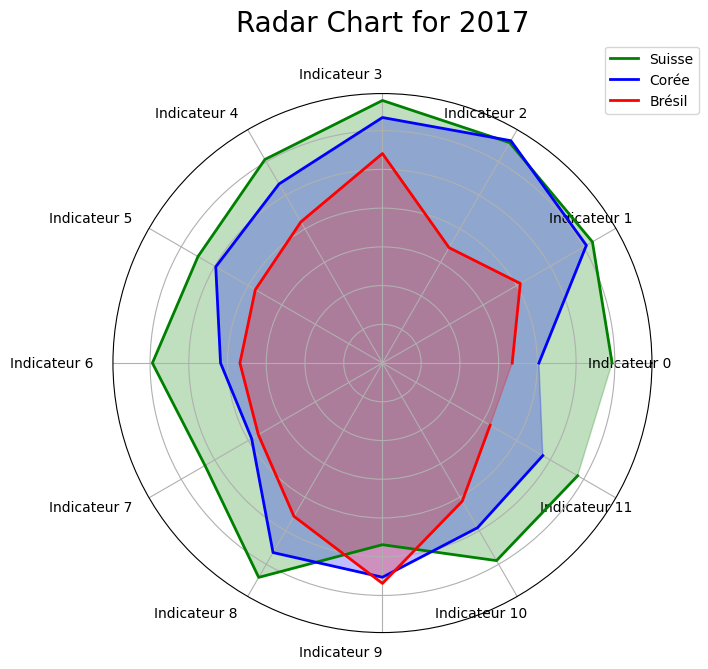

In [99]:
# Calculer les angles de chaque indicateur sur le graphique radar
angles = np.linspace(0, 2 * np.pi, 12, endpoint=False)

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Tracer les données pour les Suisse = top country
ax.fill(angles, values1, color='green', alpha=0.25)
ax.plot(angles, values1, color='green', linewidth=2, label=str('Suisse'))

# Tracer les données pour la Corée
ax.fill(angles, values2, color='blue', alpha=0.25)
ax.plot(angles, values2, color='blue', linewidth=2, label=str('Corée'))

# Tracer les données pour le Brésil = flop country
ax.fill(angles, values3, color='red', alpha=0.25)
ax.plot(angles, values3, color='red', linewidth=2, label=str('Brésil'))

ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels([f'Indicateur {i}' for i in range(12)], fontsize=10, rotation=45, ha='right')
ax.set_rlabel_position(0)

plt.title(f"Radar Chart for {year}", size=20, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

##### Investissement ER vs Totales - Moyenne periode par pays

In [100]:
budgets

Economy Name                                 Technology      2007  \
0        Australia                          Energy efficiency    35.457   
1        Australia                               Fossil fuels    73.866   
2        Australia                                 Renewables    50.553   
3        Australia                                    Nuclear    16.184   
4        Australia                    Hydrogen and fuel cells     0.678   
..             ...                                        ...       ...   
292  United States                    Hydrogen and fuel cells    454.24   
293  United States       Other power and storage technologies   185.536   
294  United States  Other cross-cutting technologies/research  1686.355   
295  United States                                Unallocated       0.0   
296  United States                               Total Budget  5721.034   

         2008      2009      2010      2011      2012      2013      2014  \
0      41.628    37.391   120.389    87.003    63.043    62.067    25.712   
1      68.549   285.321    204.42   230.431    347.63     282.7   134.791   
2      43.747    84.191    89.589   173.803   226.167   448.283    81.671   
3      24.807     2.756     2.722     5.357    10.193       7.7     6.819   
4       0.317     1.168     2.215     2.207     0.199     1.606     3.527   
..        ...       ...       ...       ...       ...       ...       ...   
292   445.975   491.541   454.262    347.14   155.215   185.866   182.032   
293   168.305  1270.275   375.142   238.398   133.373   144.127   349.796   
294  1807.602     6.904   150.057  2887.136  3165.839    3027.6  2911.436   
295       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
296  6092.286  13546.38  6504.272  8515.404  8103.285  7652.556  7883.206   

         2015      2016      2017  
0      25.637    18.553    23.448  
1      56.069    36.584    56.626  
2     131.836     48.56    57.124  
3       7.937    15.168     8.356  
4       3.612     3.356     4.903  
..        ...       ...       ...  
292   156.122   125.645   123.496  
293   312.478   212.652   249.368  
294  2857.543   2705.12  2695.016  
295       0.0   212.705   147.583  
296  7608.286  7768.075  7771.795  

[297 rows x 13 columns]

In [101]:
Technology_a_conserver = ['Renewables', 'Total Budget']

budgets_ER_Tot_global = budgets[budgets['Technology'].isin(Technology_a_conserver)]
budgets_ER_Tot_global

Economy Name    Technology      2007       2008      2009      2010  \
2         Australia    Renewables    50.553     43.747    84.191    89.589   
8         Australia  Total Budget   316.899    317.186   436.926   442.712   
11          Austria    Renewables    28.002     45.348    59.308    60.608   
17          Austria  Total Budget    60.247    131.915   168.024   217.982   
20          Belgium    Renewables    27.484  18.322667  9.161333       0.0   
..              ...           ...       ...        ...       ...       ...   
278         Turkiye  Total Budget    17.751     14.839    18.024   44.8774   
281  United Kingdom    Renewables   158.628     96.647   183.484   336.986   
287  United Kingdom  Total Budget   308.186    327.853   549.754  1026.915   
290   United States    Renewables   787.765    622.482  3045.899  1787.038   
296   United States  Total Budget  5721.034   6092.286  13546.38  6504.272   

         2011      2012      2013      2014      2015      2016      2017  
2     173.803   226.167   448.283    81.671   131.836     48.56    57.124  
8     516.597   677.212   831.295   268.695    243.89   146.688   169.617  
11     58.045    48.935     50.33    54.151    36.128     48.91     33.92  
17    213.993   208.263   212.668   239.072   209.746   226.036   221.335  
20      29.66    29.787    32.115    44.781    28.922    24.496    25.865  
..        ...       ...       ...       ...       ...       ...       ...  
278   71.7308   98.5842  125.4376   152.291   140.699     190.5   215.823  
281   115.737   113.824   169.652   129.922   129.435   223.382   181.618  
287   691.138   615.712   769.826   645.428   704.755   881.552  1171.927  
290  1551.141  1955.033  1266.488  1146.593  1130.971    896.19   823.019  
296  8515.404  8103.285  7652.556  7883.206  7608.286  7768.075  7771.795  

[66 rows x 13 columns]

In [102]:
budgets_ER_Tot_global.dtypes

Economy Name    object
Technology      object
2007            object
2008            object
2009            object
2010            object
2011            object
2012            object
2013            object
2014            object
2015            object
2016            object
2017            object
dtype: object

In [103]:
colonne_to_float = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

In [104]:
budgets_ER_Tot_global[colonne_to_float] = budgets_ER_Tot_global[colonne_to_float].astype(float)

<ipython-input-104-4454f5981bc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets_ER_Tot_global[colonne_to_float] = budgets_ER_Tot_global[colonne_to_float].astype(float)


In [105]:
budgets_ER_Tot_global['Moyenne'] = budgets_ER_Tot_global[colonne_to_float].mean(axis = 1)
budgets_ER_Tot_global

<ipython-input-105-820ec3f8db03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets_ER_Tot_global['Moyenne'] = budgets_ER_Tot_global[colonne_to_float].mean(axis = 1)


Economy Name    Technology      2007         2008          2009  \
2         Australia    Renewables    50.553    43.747000     84.191000   
8         Australia  Total Budget   316.899   317.186000    436.926000   
11          Austria    Renewables    28.002    45.348000     59.308000   
17          Austria  Total Budget    60.247   131.915000    168.024000   
20          Belgium    Renewables    27.484    18.322667      9.161333   
..              ...           ...       ...          ...           ...   
278         Turkiye  Total Budget    17.751    14.839000     18.024000   
281  United Kingdom    Renewables   158.628    96.647000    183.484000   
287  United Kingdom  Total Budget   308.186   327.853000    549.754000   
290   United States    Renewables   787.765   622.482000   3045.899000   
296   United States  Total Budget  5721.034  6092.286000  13546.380000   

          2010       2011       2012       2013      2014      2015      2016  \
2      89.5890   173.8030   226.1670   448.2830    81.671   131.836    48.560   
8     442.7120   516.5970   677.2120   831.2950   268.695   243.890   146.688   
11     60.6080    58.0450    48.9350    50.3300    54.151    36.128    48.910   
17    217.9820   213.9930   208.2630   212.6680   239.072   209.746   226.036   
20      0.0000    29.6600    29.7870    32.1150    44.781    28.922    24.496   
..         ...        ...        ...        ...       ...       ...       ...   
278    44.8774    71.7308    98.5842   125.4376   152.291   140.699   190.500   
281   336.9860   115.7370   113.8240   169.6520   129.922   129.435   223.382   
287  1026.9150   691.1380   615.7120   769.8260   645.428   704.755   881.552   
290  1787.0380  1551.1410  1955.0330  1266.4880  1146.593  1130.971   896.190   
296  6504.2720  8515.4040  8103.2850  7652.5560  7883.206  7608.286  7768.075   

         2017      Moyenne  
2      57.124   130.502182  
8     169.617   397.065182  
11     33.920    47.607727  
17    221.335   191.752818  
20     25.865    24.599455  
..        ...          ...  
278   215.823    99.141545  
281   181.618   167.210455  
287  1171.927   699.367818  
290   823.019  1364.783545  
296  7771.795  7924.234455  

[66 rows x 14 columns]

In [106]:
columns_to_drop_2

['2018', '2019', '2020', '2021', '2022', '2023', '2024']

In [107]:
budgets_ER_Tot_moy = budgets_ER_Tot_global.drop(['2007', '2008', '2009', '2010','2011','2012','2013', '2014','2015','2016','2017'], axis=1)
budgets_ER_Tot_moy

Economy Name    Technology      Moyenne
2         Australia    Renewables   130.502182
8         Australia  Total Budget   397.065182
11          Austria    Renewables    47.607727
17          Austria  Total Budget   191.752818
20          Belgium    Renewables    24.599455
..              ...           ...          ...
278         Turkiye  Total Budget    99.141545
281  United Kingdom    Renewables   167.210455
287  United Kingdom  Total Budget   699.367818
290   United States    Renewables  1364.783545
296   United States  Total Budget  7924.234455

[66 rows x 3 columns]

In [108]:
budgets_ER_Tot_moy_T = pd.pivot_table(budgets_ER_Tot_moy, values='Moyenne', index='Economy Name', columns='Technology')
budgets_ER_Tot_moy_T

Technology        Renewables  Total Budget
Economy Name                              
Australia         130.502182    397.065182
Austria            47.607727    191.752818
Belgium            24.599455    233.010000
Brazil            390.335400   1744.108000
Canada            144.439182   1029.898636
Chile              13.459750     14.609500
Czechia            16.301364    110.114000
Denmark            82.205545    180.944182
Estonia             3.661714     11.450714
Finland            61.912273    332.007909
France            334.775182   2351.364545
Germany           345.566364   1298.268091
Greece              4.409125     18.425909
Hungary            12.788091    172.248636
Ireland            24.763364     62.890455
Italy             169.427091    865.508818
Japan             565.830727   4029.097091
Korea             230.125545    951.651455
Luxembourg          5.335286    101.920714
Mexico             68.007000    421.492200
Netherlands       129.206000    321.529455
New Zealand        11.746364     24.087818
Norway             63.043182    355.689364
Poland             47.344400    257.463900
Portugal            5.711273     41.882545
Slovak Republic    19.216300     42.487400
Spain             119.336000    238.533091
Sweden             66.407818    209.497636
Switzerland        71.915909    274.489818
Turkiye            27.724455     99.141545
United Kingdom    167.210455    699.367818
United States    1364.783545   7924.234455

In [109]:
budgets_ER_Tot_moy_T = budgets_ER_Tot_moy_T.reset_index()
budgets_ER_Tot_moy_T

Technology     Economy Name   Renewables  Total Budget
0                 Australia   130.502182    397.065182
1                   Austria    47.607727    191.752818
2                   Belgium    24.599455    233.010000
3                    Brazil   390.335400   1744.108000
4                    Canada   144.439182   1029.898636
5                     Chile    13.459750     14.609500
6                   Czechia    16.301364    110.114000
7                   Denmark    82.205545    180.944182
8                   Estonia     3.661714     11.450714
9                   Finland    61.912273    332.007909
10                   France   334.775182   2351.364545
11                  Germany   345.566364   1298.268091
12                   Greece     4.409125     18.425909
13                  Hungary    12.788091    172.248636
14                  Ireland    24.763364     62.890455
15                    Italy   169.427091    865.508818
16                    Japan   565.830727   4029.097091
17                    Korea   230.125545    951.651455
18               Luxembourg     5.335286    101.920714
19                   Mexico    68.007000    421.492200
20              Netherlands   129.206000    321.529455
21              New Zealand    11.746364     24.087818
22                   Norway    63.043182    355.689364
23                   Poland    47.344400    257.463900
24                 Portugal     5.711273     41.882545
25          Slovak Republic    19.216300     42.487400
26                    Spain   119.336000    238.533091
27                   Sweden    66.407818    209.497636
28              Switzerland    71.915909    274.489818
29                  Turkiye    27.724455     99.141545
30           United Kingdom   167.210455    699.367818
31            United States  1364.783545   7924.234455

In [110]:
budgets_ER_Tot_moy_T.columns

Index(['Economy Name', 'Renewables', 'Total Budget'], dtype='object', name='Technology')

In [111]:
budgets_ER_Tot_moy_T = budgets_ER_Tot_moy_T.rename_axis(None, axis=1)
budgets_ER_Tot_moy_T.set_index('Economy Name', inplace=True)

In [112]:
budgets_ER_Tot_moy_T = budgets_ER_Tot_moy_T.reset_index()

In [113]:
budgets_ER_Tot_moy_T

Economy Name   Renewables  Total Budget
0         Australia   130.502182    397.065182
1           Austria    47.607727    191.752818
2           Belgium    24.599455    233.010000
3            Brazil   390.335400   1744.108000
4            Canada   144.439182   1029.898636
5             Chile    13.459750     14.609500
6           Czechia    16.301364    110.114000
7           Denmark    82.205545    180.944182
8           Estonia     3.661714     11.450714
9           Finland    61.912273    332.007909
10           France   334.775182   2351.364545
11          Germany   345.566364   1298.268091
12           Greece     4.409125     18.425909
13          Hungary    12.788091    172.248636
14          Ireland    24.763364     62.890455
15            Italy   169.427091    865.508818
16            Japan   565.830727   4029.097091
17            Korea   230.125545    951.651455
18       Luxembourg     5.335286    101.920714
19           Mexico    68.007000    421.492200
20      Netherlands   129.206000    321.529455
21      New Zealand    11.746364     24.087818
22           Norway    63.043182    355.689364
23           Poland    47.344400    257.463900
24         Portugal     5.711273     41.882545
25  Slovak Republic    19.216300     42.487400
26            Spain   119.336000    238.533091
27           Sweden    66.407818    209.497636
28      Switzerland    71.915909    274.489818
29          Turkiye    27.724455     99.141545
30   United Kingdom   167.210455    699.367818
31    United States  1364.783545   7924.234455

In [114]:
budgets_ER_Tot_moy_T = budgets_ER_Tot_moy_T.sort_values(by='Total Budget', ascending=False)

In [115]:
# Calculer la part des renouvelables et des autres pour chaque année
budgets_ER_Tot_moy_T['Non-Renewables'] = budgets_ER_Tot_moy_T['Total Budget'] - budgets_ER_Tot_moy_T['Renewables']

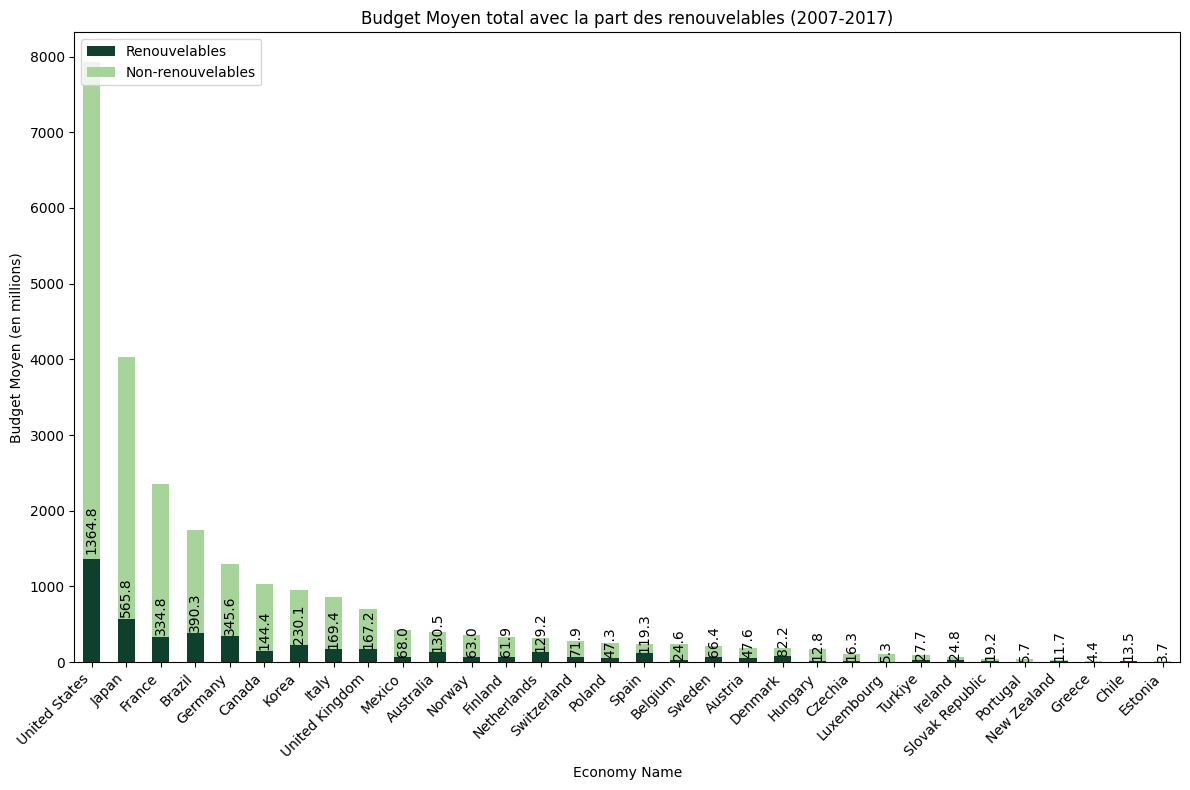

In [116]:
#l'index était de type str donc je l'ai passé en int pour éviter l'erreur
budgets_ER_Tot_moy_T.index = budgets_ER_Tot_moy_T.index.astype(int)

# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(12, 8))

# Tracer les barres empilées
budgets_ER_Tot_moy_T[['Renewables', 'Non-Renewables']].plot(kind='bar', stacked=True, ax=ax, color=['#0E402D', '#A7D49B'])

# Ajouter les annotations pour les pourcentages des renouvelables
for i, (index, row) in enumerate(budgets_ER_Tot_moy_T.iterrows()):
    total = row['Total Budget']
    renewables = row['Renewables']
    percentage = renewables / total
    ax.text(i, renewables + row['Non-Renewables'] * 0.01, f'{renewables:.1f}', ha='center', va='bottom', rotation=90, fontsize=10, color='black')

# Configuration des étiquettes et du titre
ax.set_xlabel('Economy Name')
ax.set_ylabel('Budget Moyen (en millions)')
ax.set_title('Budget Moyen total avec la part des renouvelables (2007-2017)')
ax.legend(['Renouvelables', 'Non-renouvelables'], loc='upper left')
ax.set_xticks(range(len(budgets_ER_Tot_moy_T.index)))
ax.set_xticklabels(budgets_ER_Tot_moy_T['Economy Name'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyse globale

### Dataframes

#### Dataframe GDP par pays de 2007 à 2017

In [117]:
# GDP par pays de 2007 à 2008
df_economy_gdp

Economy Name      2007      2008      2009      2010      2011  \
279          Australia    680.15    760.81    795.30    851.17    882.36   
605            Austria    297.73    317.81    328.57    322.51    332.00   
931            Belgium    364.65    375.99    389.52    382.75    394.35   
1257            Brazil   1701.18   1835.64   1981.21   2013.19   2172.06   
1583            Canada   1156.46   1265.84   1303.23   1281.06   1330.27   
1909       Switzerland    272.30    300.19    312.75    314.87    324.51   
2235             Chile    212.67    231.06    243.04    243.57    257.88   
2561           Czechia    236.54    248.90    262.17    252.95    261.29   
2887           Germany   2558.91   2809.69   2910.49   2806.27   2940.43   
3213           Denmark    198.37    203.68    204.06    197.06    201.74   
3539             Spain   1214.93   1351.61   1396.88   1360.60   1368.64   
3865           Estonia     24.49     28.32     27.21     24.00     24.69   
4191           Finland    182.63    185.48    190.86    179.60    185.98   
4517            France   1934.68   2046.90   2130.38   2108.23   2145.49   
4843    United Kingdom   2121.77   2137.42   2230.55   2139.40   2172.77   
5169            Greece    289.48    324.62    341.13    333.53    318.08   
5495           Hungary    197.09    191.32    196.07    185.87    187.63   
5821           Ireland    186.70    186.17    188.11    175.06    172.34   
6147             Italy   1790.90   1786.43   1814.56   1740.12   1773.55   
6473             Japan   4170.53   4289.81   4354.37   4159.43   4309.53   
6799             Korea   1155.56   1200.88   1342.34   1364.15   1459.25   
7125         Lithuania     54.86     59.64     63.62     55.16     56.59   
7451        Luxembourg     37.12     38.56     40.02     38.81     41.09   
7777            Mexico   1171.51   1346.01   1548.01   1465.73   1567.47   
8103       Netherlands    573.33    639.51    675.38    658.23    676.90   
8429            Norway    202.06    247.42    256.52    254.54    255.28   
8755       New Zealand    105.82    111.72    115.71    115.41    117.81   
9081            Poland    566.89    620.87    666.05    688.76    721.32   
9407          Portugal    239.47    230.55    235.90    232.66    247.04   
9733   Slovak Republic     95.02    109.59    119.27    115.10    120.17   
10059           Sweden    312.81    334.64    341.87    331.50    354.72   
10385          Turkiye    660.84    887.96    915.18    880.06    960.51   
10711    United States  13020.86  13843.82  14264.60  14256.28  14657.80   

           2012      2013      2014      2015      2016      2017  
279      914.48    970.76    999.60   1095.38   1138.08   1187.32  
605      352.02    359.02    361.40    395.49    404.29    417.23  
931      413.28    420.31    422.81    481.47    494.12    509.53  
1257    2294.24   2355.59   2423.31   3263.83   3192.40   3141.33  
1583    1396.13   1488.31   1526.08   1591.58   1631.94   1682.36  
1909     339.89    363.42    371.57    472.83    482.35    495.96  
2235     299.63    320.54    334.76    409.33    422.42    438.75  
2561     284.95    286.95    286.04    314.58    332.48    350.72  
2887    3099.08   3197.07   3232.54   3721.55   3840.55   3980.28  
3213     206.59    210.15    211.92    249.53    258.70    273.86  
3539    1413.47   1410.63   1391.35   1566.37   1615.07   1686.89  
3865      27.31     29.09     29.77     35.62     37.55     38.45  
4191     195.72    197.48    194.16    221.04    225.00    231.37  
4517    2217.90   2254.07   2278.00   2580.75   2646.89   2733.68  
4843    2260.80   2336.30   2390.87   2548.89   2679.32   2785.56  
5169     294.34    276.88    265.63    284.26    285.98    289.40  
5495     195.64    195.63    198.22    246.35    258.44    270.29  
5821     181.60    192.22    188.88    226.77    257.42    324.90  
6147    1846.95   1832.92   1807.83   2127.74   2170.91   2234.50  
6473    4440.38   4627.89   4698.80   4750.77   4830.06   5237.79

#### Dataframe GCI moyen par pays de 2007 à 2017

In [118]:
# Sélection des 12 pilliers à conserver pour l'étude
selected_indicators = [
    '1st pillar: Institutions',
    '2nd pillar: Infrastructure',
    '3rd pillar: Macroeconomic environment',
    '4th pillar: Health and primary education',
    '5th pillar: Higher education and training',
    '6th pillar: Goods market efficiency',
    '7th pillar: Labor market efficiency',
    '8th pillar: Financial market development',
    '9th pillar: Technological readiness',
    '10th pillar: Market size',
    '11th pillar: Business sophistication',
    '12th pillar: Innovation'
]

In [119]:
# Filtrer le DataFrame pour inclure uniquement les indicateurs sélectionnés (12 pilliers) et les valeurs (pas rank)
df_gci = df_economy[
    (df_economy['Indicator'].isin(selected_indicators)) &
    (df_economy['Attribute 1'] == "Value")
]

In [120]:
# Clean DF des colonnes inutiles
df_gci = df_gci.drop(columns=["Economy ISO3", "Indicator ID", "Attribute 1", "Attribute 2", "Attribute 3", "Partner"])
df_gci

Economy Name                                  Indicator  2007  2008  \
191        Australia                   1st pillar: Institutions  5.66  5.72   
211        Australia                 2nd pillar: Infrastructure  5.53  5.33   
217        Australia      3rd pillar: Macroeconomic environment  5.39  5.66   
219        Australia   4th pillar: Health and primary education  6.26  6.27   
227        Australia  5th pillar: Higher education and training  5.46  5.44   
...              ...                                        ...   ...   ...   
10683  United States   8th pillar: Financial market development  5.68  5.61   
10689  United States        9th pillar: Technological readiness  5.43  5.57   
10695  United States                   10th pillar: Market size  6.83  6.91   
10703  United States       11th pillar: Business sophistication  5.60  5.75   
10705  United States                    12th pillar: Innovation  5.77  5.84   

       2009  2010  2011  2012  2013  2014  2015  2016  2017  
191    5.60  5.49  5.39  5.27  5.04  5.14  5.31  5.32  5.35  
211    5.19  5.44  5.43  5.70  5.60  5.60  5.66  5.65  5.27  
217    5.56  5.55  5.62  5.57  5.75  5.61  5.62  5.69  5.67  
219    6.18  6.49  6.51  6.46  6.36  6.46  6.54  6.56  6.52  
227    5.33  5.53  5.62  5.64  5.51  5.67  5.84  5.91  5.88  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
10683  4.96  4.67  4.87  5.07  5.26  5.35  5.45  5.56  5.73  
10689  5.61  5.10  5.23  5.84  5.72  5.78  5.85  6.02  6.23  
10695  6.93  6.93  6.92  6.93  6.94  6.94  6.91  6.90  6.86  
10703  5.65  5.40  5.35  5.34  5.49  5.58  5.60  5.62  5.77  
10705  5.77  5.65  5.57  5.50  5.37  5.49  5.58  5.64  5.82  

[396 rows x 13 columns]

In [121]:
df_gci

Economy Name                                  Indicator  2007  2008  \
191        Australia                   1st pillar: Institutions  5.66  5.72   
211        Australia                 2nd pillar: Infrastructure  5.53  5.33   
217        Australia      3rd pillar: Macroeconomic environment  5.39  5.66   
219        Australia   4th pillar: Health and primary education  6.26  6.27   
227        Australia  5th pillar: Higher education and training  5.46  5.44   
...              ...                                        ...   ...   ...   
10683  United States   8th pillar: Financial market development  5.68  5.61   
10689  United States        9th pillar: Technological readiness  5.43  5.57   
10695  United States                   10th pillar: Market size  6.83  6.91   
10703  United States       11th pillar: Business sophistication  5.60  5.75   
10705  United States                    12th pillar: Innovation  5.77  5.84   

       2009  2010  2011  2012  2013  2014  2015  2016  2017  
191    5.60  5.49  5.39  5.27  5.04  5.14  5.31  5.32  5.35  
211    5.19  5.44  5.43  5.70  5.60  5.60  5.66  5.65  5.27  
217    5.56  5.55  5.62  5.57  5.75  5.61  5.62  5.69  5.67  
219    6.18  6.49  6.51  6.46  6.36  6.46  6.54  6.56  6.52  
227    5.33  5.53  5.62  5.64  5.51  5.67  5.84  5.91  5.88  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
10683  4.96  4.67  4.87  5.07  5.26  5.35  5.45  5.56  5.73  
10689  5.61  5.10  5.23  5.84  5.72  5.78  5.85  6.02  6.23  
10695  6.93  6.93  6.92  6.93  6.94  6.94  6.91  6.90  6.86  
10703  5.65  5.40  5.35  5.34  5.49  5.58  5.60  5.62  5.77  
10705  5.77  5.65  5.57  5.50  5.37  5.49  5.58  5.64  5.82  

[396 rows x 13 columns]

In [122]:
# Sélectionner les colonnes des années (de 2007 à 2017)
years = [str(year) for year in range(2007, 2018)]

In [123]:
# Grouper par 'Economy Name' et calculer la moyenne pour chaque groupe sur les années spécifiées
df_gci_mean_country_base = df_gci.groupby('Economy Name')[years].mean().reset_index()
df_gci_mean_country_base

Economy Name      2007      2008      2009      2010      2011  \
0         Australia  5.317500  5.345000  5.290000  5.272500  5.265833   
1           Austria  5.297500  5.314167  5.225000  5.181667  5.207500   
2           Belgium  5.153333  5.215000  5.155833  5.142500  5.268333   
3            Brazil  3.996667  4.137500  4.230833  4.267500  4.314167   
4            Canada  5.439167  5.491667  5.435000  5.411667  5.437500   
5             Chile  4.692500  4.670000  4.650833  4.625833  4.710000   
6           Czechia  4.606667  4.683333  4.715833  4.665000  4.629167   
7           Denmark  5.658333  5.685833  5.555833  5.414167  5.475833   
8           Estonia  4.760000  4.798333  4.710000  4.703333  4.733333   
9           Finland  5.559167  5.582500  5.507500  5.438333  5.529167   
10           France  5.263333  5.309167  5.227500  5.238333  5.223333   
11          Germany  5.528333  5.520000  5.420833  5.439167  5.454167   
12           Greece  4.214167  4.240833  4.161667  4.130000  4.044167   
13          Hungary  4.348333  4.256667  4.292500  4.355833  4.390833   
14          Ireland  5.094167  5.058333  4.893333  4.826667  4.846667   
15            Italy  4.407500  4.399167  4.339167  4.464167  4.515000   
16            Japan  5.387500  5.336667  5.312500  5.321667  5.350000   
17      Korea, Rep.  5.430000  5.345000  5.074167  5.010833  5.124167   
18        Lithuania  4.430833  4.440000  4.351667  4.363333  4.393333   
19       Luxembourg  5.025833  5.024167  5.132500  5.188333  5.185000   
20           Mexico  4.204167  4.169167  4.155833  4.122500  4.245833   
21      Netherlands  5.493333  5.490833  5.395000  5.420000  5.490000   
22      New Zealand  5.129167  5.104167  5.142500  5.107500  5.102500   
23           Norway  5.328333  5.333333  5.287500  5.250000  5.325000   
24           Poland  4.232500  4.273333  4.354167  4.500000  4.479167   
25         Portugal  4.625000  4.620833  4.546667  4.515000  4.540833   
26  Slovak Republic  4.416667  4.447500  4.430000  4.390000  4.321667   
27            Spain  4.812500  4.863333  4.709167  4.648333  4.691667   
28           Sweden  5.585833  5.597500  5.565000  5.597500  5.648333   
29      Switzerland  5.655000  5.668333  5.636667  5.678333  5.790000   
30          Turkiye  4.211667  4.115833  4.143333  4.189167  4.250833   
31   United Kingdom  5.479167  5.366667  5.237500  5.332500  5.444167   
32    United States  5.638333  5.704167  5.525000  5.388333  5.395000   

        2012      2013      2014      2015      2016      2017  
0   5.274167  5.243333  5.236667  5.303333  5.342500  5.326667  
1   5.262500  5.216667  5.236667  5.177500  5.281667  5.300833  
2   5.252500  5.194167  5.235000  5.255833  5.305000  5.265833  
3   4.415000  4.334167  4.332500  4.078333  4.027500  4.106667  
4   5.399167  5.340000  5.373333  5.443333  5.403333  5.468333  
5   4.742500  4.734167  4.740000  4.675000  4.700000  4.768333  
6   4.611667  4.530833  4.660833  4.835833  4.869167  4.922500  
7   5.345000  5.230833  5.374167  5.421667  5.425000  5.472500  
8   4.816667  4.807500  4.900833  4.929167  4.986667  5.043333  
9   5.600000  5.583333  5.555833  5.511667  5.496667  5.556667  
10  5.183333  5.139167  5.151667  5.195833  5.264167  5.242500  
11  5.516667  5.548333  5.535000  5.573333  5.612500  5.698333  
12  3.961667  4.040000  4.162500  4.150833  4.107500  4.152500  
13  4.369167  4.275000  4.327500  4.305833  4.220833  4.357500  
14  4.941667  4.971667  5.024167  5.176667  5.259167  5.258333  
15  4.531667  4.490000  4.493333  4.519167  4.568333  4.597500  
16  5.347500  5.361667  5.443333  5.446667  5.486667  5.510000  
17  5.212500  5.115833  5.060833  5.098333  5.146667  5.195833  
18  4.445833  4.465000  4.626667  4.680833  4.674167  4.672500  
19  5.233333  5.225000  5.310833  5.323333  5.321667  5.347500  
20  4.331667  4.309167  4.250000  4.276667  4.360000  4.385833  
21  5.563333  5.494167  5.525000  5.583333  5.649167  5.745000  
22  5.233333  5.271667  5.385

#### Dataframe Budgets Energies Renouvelables

In [124]:
# Attention, revoir le interpolate dans le code Dépenses en énergie car les ordres de grandeur ne sont pas OK
budgets_renewables = budgets[budgets['Technology'] == 'Renewables'].drop('Technology', axis=1)
budgets_renewables.rename(columns = {'Country' : 'Economy Name'}, inplace = True)
budgets_renewables.head(3)

Economy Name    2007       2008      2009    2010     2011     2012  \
2     Australia  50.553     43.747    84.191  89.589  173.803  226.167   
11      Austria  28.002     45.348    59.308  60.608   58.045   48.935   
20      Belgium  27.484  18.322667  9.161333     0.0    29.66   29.787   

       2013    2014     2015    2016    2017  
2   448.283  81.671  131.836   48.56  57.124  
11    50.33  54.151   36.128   48.91   33.92  
20   32.115  44.781   28.922  24.496  25.865

In [125]:
# Aligner les noms des pays dans mes 2 df
budgets_renewables['Economy Name'] = budgets_renewables['Economy Name'].replace({'Czech Republic': 'Czechia','Korea, Rep.':'Korea','Republic of Türkiye':'Turkiye'})
budgets_renewables.head(2)

Economy Name    2007    2008    2009    2010     2011     2012     2013  \
2     Australia  50.553  43.747  84.191  89.589  173.803  226.167  448.283   
11      Austria  28.002  45.348  59.308  60.608   58.045   48.935    50.33   

      2014     2015   2016    2017  
2   81.671  131.836  48.56  57.124  
11  54.151   36.128  48.91   33.92

In [126]:
budgets_renewables['Economy Name'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Ireland', 'Italy', 'Japan', 'Korea',
       'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand',
       'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Spain',
       'Sweden', 'Switzerland', 'Turkiye', 'United Kingdom',
       'United States'], dtype=object)

## KPI's comparatifs

### Top pays en investissements ER (2007-2017)

In [127]:
budgets_renewables

Economy Name     2007       2008      2009      2010      2011  \
2          Australia   50.553     43.747    84.191    89.589   173.803   
11           Austria   28.002     45.348    59.308    60.608    58.045   
20           Belgium   27.484  18.322667  9.161333       0.0     29.66   
29            Brazil      NaN        NaN       NaN       NaN       NaN   
38            Canada   84.813    103.536   168.995   167.776   196.938   
47             Chile      NaN        NaN       NaN       NaN       NaN   
56           Czechia    3.239     14.504    17.274    16.814     27.03   
65           Denmark   60.043     66.714    79.416   116.253   108.223   
74           Estonia      NaN        NaN       NaN       NaN    12.435   
83           Finland    56.76      58.03    70.931    66.722    90.959   
92            France  190.573    242.249   388.578   298.582   368.301   
101          Germany  174.564    224.299   341.314   349.592    444.06   
110           Greece      NaN        NaN       NaN      4.97     4.329   
119          Hungary   14.385     13.725    14.302    13.949    13.685   
128          Ireland   15.263     36.057    29.913    17.585    23.554   
137            Italy  107.849    155.556   120.183   189.226   234.449   
146            Japan  235.353    231.091   149.684   244.473   1124.38   
155            Korea  129.524     151.78   218.479   274.846   246.099   
164        Lithuania      NaN        NaN       NaN       NaN       NaN   
173       Luxembourg      NaN        NaN       NaN       NaN     1.137   
182           Mexico      NaN        NaN       NaN       NaN       NaN   
191      Netherlands  114.539     79.196   101.938    229.94    88.582   
200      New Zealand    5.936     18.035    17.442     16.95    15.106   
209           Norway   12.965     14.509    82.571   100.957    75.626   
218           Poland      NaN      1.665    68.413    69.351    81.828   
227         Portugal    1.886      0.625     1.991      1.59     0.724   
236  Slovak Republic      NaN      9.096    11.209    12.969    34.813   
245            Spain   60.857     73.027   150.974   165.822   283.659   
254           Sweden   44.661     48.051    77.386   105.881    79.776   
263      Switzerland   34.417     46.174    55.042    51.133    65.258   
272          Turkiye    2.849      3.713     5.006   11.6776   18.3492   
281   United Kingdom  158.628     96.647   183.484   336.986   115.737   
290    United States  787.765    622.482  3045.899  1787.038  1551.141   

         2012      2013      2014      2015     2016     2017  
2     226.167   448.283    81.671   131.836    48.56   57.124  
11     48.935     50.33    54.151    36.128    48.91    33.92  
20     29.787    32.115    44.781    28.922   24.496   25.865  
29        NaN   421.388   502.598    399.46  330.241   297.99  
38    225.268    134.36   117.747   144.331  121.561  123.506  
47        NaN       NaN    19.944     11.74    9.488   12.667  
56     22.797    14.155    14.069     17.55   15.384   16.499  
65     88.737   113.492    76.134    94.884   62.323   38.042  
74       0.42     3.629     2.545     2.967    2.649    0.987  
83      57.42     75.19    47.815    54.073   48.433   54.702  
92    357.516   411.219   396.133   392.506  351.413  285.457  
101   429.055   450.964   329.721   351.803  315.693  390.165  
110     4.329     4.329     4.329     4.329    4.329    4.329  
119    12.775     1.742     2.319      3.25    9.948   40.589  
128    17.231    27.003    33.501     42.14   15.587   14.563  
137   239.166   210.392   166.117   141.423  148.854  150.483  
146   976.719    909.32   859.617   582.548  493.016  417.937  
155    289.01   276.769   254.233   226.701  242.974  220.966  
164       NaN       NaN       NaN       NaN      NaN      NaN  
173     6.035     6.035     6.035     6.035    6.035    6.035  
182       NaN    10.326   106.749    49.958    90.25   82.752  
191   149.855   144.422   102.759   159.654  132.941   117.44  
200    11.371    12

In [128]:
budgets_renewables[colonne_to_float] = budgets_renewables[colonne_to_float].astype(float)

In [129]:
budgets_renewables.head(3)

Economy Name    2007       2008       2009    2010     2011     2012  \
2     Australia  50.553  43.747000  84.191000  89.589  173.803  226.167   
11      Austria  28.002  45.348000  59.308000  60.608   58.045   48.935   
20      Belgium  27.484  18.322667   9.161333   0.000   29.660   29.787   

       2013    2014     2015    2016    2017  
2   448.283  81.671  131.836  48.560  57.124  
11   50.330  54.151   36.128  48.910  33.920  
20   32.115  44.781   28.922  24.496  25.865

In [130]:
budgets_renewables.dtypes

Economy Name     object
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
dtype: object

In [131]:
budgets_renewables['Period 2007-2017'] = budgets_renewables[years].sum(axis=1, skipna=True).round(2)
budgets_renewables.head(3)

Economy Name    2007       2008       2009    2010     2011     2012  \
2     Australia  50.553  43.747000  84.191000  89.589  173.803  226.167   
11      Austria  28.002  45.348000  59.308000  60.608   58.045   48.935   
20      Belgium  27.484  18.322667   9.161333   0.000   29.660   29.787   

       2013    2014     2015    2016    2017  Period 2007-2017  
2   448.283  81.671  131.836  48.560  57.124           1435.52  
11   50.330  54.151   36.128  48.910  33.920            523.68  
20   32.115  44.781   28.922  24.496  25.865            270.59

In [132]:
#Display the best values of the total in ER for the period 2007-2017
budgets_renewables.sort_values(by= 'Period 2007-2017', ascending= False).head(5)

Economy Name     2007     2008      2009      2010      2011      2012  \
290  United States  787.765  622.482  3045.899  1787.038  1551.141  1955.033   
146          Japan  235.353  231.091   149.684   244.473  1124.380   976.719   
101        Germany  174.564  224.299   341.314   349.592   444.060   429.055   
92          France  190.573  242.249   388.578   298.582   368.301   357.516   
155          Korea  129.524  151.780   218.479   274.846   246.099   289.010   

         2013      2014      2015     2016     2017  Period 2007-2017  
290  1266.488  1146.593  1130.971  896.190  823.019          15012.62  
146   909.320   859.617   582.548  493.016  417.937           6224.14  
101   450.964   329.721   351.803  315.693  390.165           3801.23  
92    411.219   396.133   392.506  351.413  285.457           3682.53  
155   276.769   254.233   226.701  242.974  220.966           2531.38

<ipython-input-133-7f2d46f087bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Economy Name', y='Period 2007-2017', data=budgets_renewables.sort_values(by= 'Period 2007-2017', ascending= False).head(5), palette='viridis')


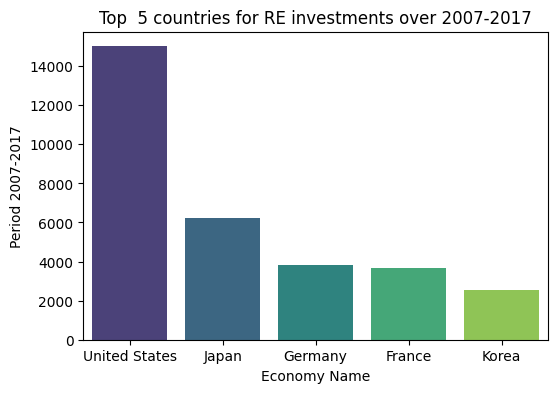

In [133]:
# Tracer le graphique en barres :
plt.figure(figsize=(6, 4))
sns.barplot(x='Economy Name', y='Period 2007-2017', data=budgets_renewables.sort_values(by= 'Period 2007-2017', ascending= False).head(5), palette='viridis')

plt.title('Top  5 countries for RE investments over 2007-2017')
plt.ylabel('Period 2007-2017')

plt.show()

### Top pays en GDP (2007-2017)

In [134]:
top_GDP = df_economy_gdp.copy()

In [135]:
years_period = [str(year) for year in range(2007, 2018)]

#Create a new column 'Period 2007-2017' in order to calculate the mean of GDP for mentioned time period and round its result to 2 decimals
top_GDP['Period 2007-2017'] = top_GDP[years_period].mean(axis=1).round(2)
top_GDP.head(3)

Economy Name    2007    2008    2009    2010    2011    2012    2013  \
279    Australia  680.15  760.81  795.30  851.17  882.36  914.48  970.76   
605      Austria  297.73  317.81  328.57  322.51  332.00  352.02  359.02   
931      Belgium  364.65  375.99  389.52  382.75  394.35  413.28  420.31   

       2014     2015     2016     2017  Period 2007-2017  
279  999.60  1095.38  1138.08  1187.32            934.13  
605  361.40   395.49   404.29   417.23            353.46  
931  422.81   481.47   494.12   509.53            422.62

In [136]:
#Display the values of mean of GDP by descending order and filter top 5 GDP countries
top_GDP.sort_values(by= 'Period 2007-2017', ascending= False).head(5)

Economy Name      2007      2008      2009      2010      2011  \
10711   United States  13020.86  13843.82  14264.60  14256.28  14657.80   
6473            Japan   4170.53   4289.81   4354.37   4159.43   4309.53   
2887          Germany   2558.91   2809.69   2910.49   2806.27   2940.43   
1257           Brazil   1701.18   1835.64   1981.21   2013.19   2172.06   
4843   United Kingdom   2121.77   2137.42   2230.55   2139.40   2172.77   

           2012      2013      2014      2015      2016      2017  \
10711  15094.03  15684.75  16799.70  17418.92  17947.00  18569.10   
6473    4440.38   4627.89   4698.80   4750.77   4830.06   5237.79   
2887    3099.08   3197.07   3232.54   3721.55   3840.55   3980.28   
1257    2294.24   2355.59   2423.31   3263.83   3192.40   3141.33   
4843    2260.80   2336.30   2390.87   2548.89   2679.32   2785.56   

       Period 2007-2017  
10711          15596.08  
6473            4533.58  
2887            3190.62  
1257            2397.63  
4843            2345.79

<ipython-input-137-c5b6c91bd069>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Economy Name', y='Period 2007-2017', data=top_GDP.sort_values(by= 'Period 2007-2017', ascending= False).head(5), palette='viridis')


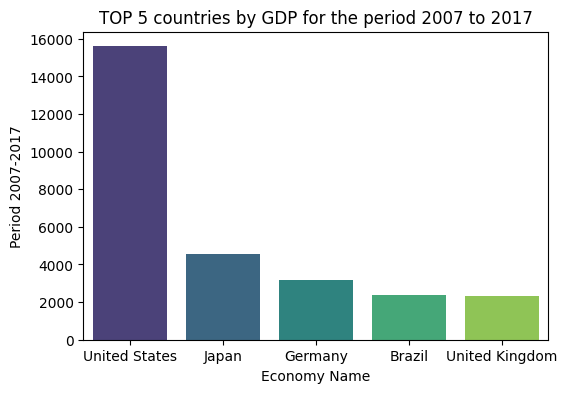

In [137]:
# Tracer le graphique en barres :
plt.figure(figsize=(6, 4))
sns.barplot(x='Economy Name', y='Period 2007-2017', data=top_GDP.sort_values(by= 'Period 2007-2017', ascending= False).head(5), palette='viridis')

plt.title('TOP 5 countries by GDP for the period 2007 to 2017')
plt.ylabel('Period 2007-2017')

plt.show()

### Top pays en GCI (2007-2017)

In [138]:
df_gci_mean_country = df_gci_mean_country_base.copy()

In [139]:
years_period = [str(year) for year in range(2007, 2018)]

#Create a new column 'Period 2007-2017' in order to calculate the mean of GCI for mentioned time period and round its result to 2 decimals
df_gci_mean_country['Period 2007-2017'] = df_gci_mean_country[years_period].mean(axis=1).round(2)
df_gci_mean_country.head(3)

Economy Name      2007      2008      2009      2010      2011      2012  \
0    Australia  5.317500  5.345000  5.290000  5.272500  5.265833  5.274167   
1      Austria  5.297500  5.314167  5.225000  5.181667  5.207500  5.262500   
2      Belgium  5.153333  5.215000  5.155833  5.142500  5.268333  5.252500   

       2013      2014      2015      2016      2017  Period 2007-2017  
0  5.243333  5.236667  5.303333  5.342500  5.326667              5.29  
1  5.216667  5.236667  5.177500  5.281667  5.300833              5.25  
2  5.194167  5.235000  5.255833  5.305000  5.265833              5.22

In [140]:
df_gci_mean_country.sort_values(by= 'Period 2007-2017', ascending= False).head(5)

Economy Name      2007      2008      2009      2010      2011      2012  \
29    Switzerland  5.655000  5.668333  5.636667  5.678333  5.790000  5.780000   
28         Sweden  5.585833  5.597500  5.565000  5.597500  5.648333  5.588333   
32  United States  5.638333  5.704167  5.525000  5.388333  5.395000  5.427500   
9         Finland  5.559167  5.582500  5.507500  5.438333  5.529167  5.600000   
11        Germany  5.528333  5.520000  5.420833  5.439167  5.454167  5.516667   

        2013      2014      2015      2016      2017  Period 2007-2017  
29  5.722500  5.761667  5.822500  5.871667  5.927500              5.76  
28  5.548333  5.471667  5.495000  5.599167  5.575833              5.57  
32  5.440833  5.490833  5.570833  5.670000  5.818333              5.55  
9   5.583333  5.555833  5.511667  5.496667  5.556667              5.54  
11  5.548333  5.535000  5.573333  5.612500  5.698333              5.53

<ipython-input-141-566fc073ed35>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Economy Name', y='Period 2007-2017', data=df_gci_mean_country.sort_values(by= 'Period 2007-2017', ascending= False).head(5), palette='viridis')


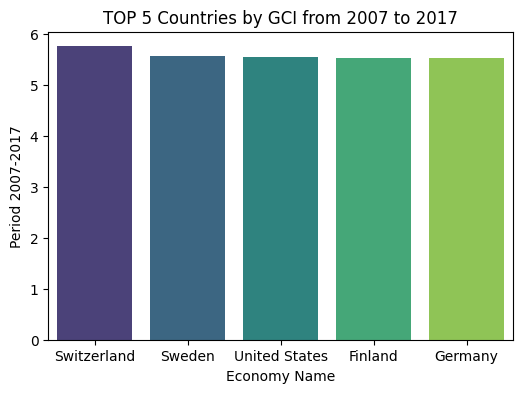

In [141]:
# Tracer le graphique en barres :
plt.figure(figsize=(6, 4))
sns.barplot(x='Economy Name', y='Period 2007-2017', data=df_gci_mean_country.sort_values(by= 'Period 2007-2017', ascending= False).head(5), palette='viridis')

plt.title('TOP 5 Countries by GCI from 2007 to 2017')
plt.ylabel('Period 2007-2017')

plt.show()

## Corrélation GDP x GCI par pays de 2007 à 2017
(Global Competitiveness Index = moyenne 12 pilliers)

Répond à la question : est-ce qu'un pays avec un bon PBI est un pays ayant un bon score de compétitivité globale sur les 12 pilliers ?

##### Scatter plot des corrélations GDP x GCI
Permet de visualiser directement la relation entre le GDP et le score pour chaque pays. La ligne de régression permet de voir la tendance générale.

In [142]:
df_economy_gdp

Economy Name      2007      2008      2009      2010      2011  \
279          Australia    680.15    760.81    795.30    851.17    882.36   
605            Austria    297.73    317.81    328.57    322.51    332.00   
931            Belgium    364.65    375.99    389.52    382.75    394.35   
1257            Brazil   1701.18   1835.64   1981.21   2013.19   2172.06   
1583            Canada   1156.46   1265.84   1303.23   1281.06   1330.27   
1909       Switzerland    272.30    300.19    312.75    314.87    324.51   
2235             Chile    212.67    231.06    243.04    243.57    257.88   
2561           Czechia    236.54    248.90    262.17    252.95    261.29   
2887           Germany   2558.91   2809.69   2910.49   2806.27   2940.43   
3213           Denmark    198.37    203.68    204.06    197.06    201.74   
3539             Spain   1214.93   1351.61   1396.88   1360.60   1368.64   
3865           Estonia     24.49     28.32     27.21     24.00     24.69   
4191           Finland    182.63    185.48    190.86    179.60    185.98   
4517            France   1934.68   2046.90   2130.38   2108.23   2145.49   
4843    United Kingdom   2121.77   2137.42   2230.55   2139.40   2172.77   
5169            Greece    289.48    324.62    341.13    333.53    318.08   
5495           Hungary    197.09    191.32    196.07    185.87    187.63   
5821           Ireland    186.70    186.17    188.11    175.06    172.34   
6147             Italy   1790.90   1786.43   1814.56   1740.12   1773.55   
6473             Japan   4170.53   4289.81   4354.37   4159.43   4309.53   
6799             Korea   1155.56   1200.88   1342.34   1364.15   1459.25   
7125         Lithuania     54.86     59.64     63.62     55.16     56.59   
7451        Luxembourg     37.12     38.56     40.02     38.81     41.09   
7777            Mexico   1171.51   1346.01   1548.01   1465.73   1567.47   
8103       Netherlands    573.33    639.51    675.38    658.23    676.90   
8429            Norway    202.06    247.42    256.52    254.54    255.28   
8755       New Zealand    105.82    111.72    115.71    115.41    117.81   
9081            Poland    566.89    620.87    666.05    688.76    721.32   
9407          Portugal    239.47    230.55    235.90    232.66    247.04   
9733   Slovak Republic     95.02    109.59    119.27    115.10    120.17   
10059           Sweden    312.81    334.64    341.87    331.50    354.72   
10385          Turkiye    660.84    887.96    915.18    880.06    960.51   
10711    United States  13020.86  13843.82  14264.60  14256.28  14657.80   

           2012      2013      2014      2015      2016      2017  
279      914.48    970.76    999.60   1095.38   1138.08   1187.32  
605      352.02    359.02    361.40    395.49    404.29    417.23  
931      413.28    420.31    422.81    481.47    494.12    509.53  
1257    2294.24   2355.59   2423.31   3263.83   3192.40   3141.33  
1583    1396.13   1488.31   1526.08   1591.58   1631.94   1682.36  
1909     339.89    363.42    371.57    472.83    482.35    495.96  
2235     299.63    320.54    334.76    409.33    422.42    438.75  
2561     284.95    286.95    286.04    314.58    332.48    350.72  
2887    3099.08   3197.07   3232.54   3721.55   3840.55   3980.28  
3213     206.59    210.15    211.92    249.53    258.70    273.86  
3539    1413.47   1410.63   1391.35   1566.37   1615.07   1686.89  
3865      27.31     29.09     29.77     35.62     37.55     38.45  
4191     195.72    197.48    194.16    221.04    225.00    231.37  
4517    2217.90   2254.07   2278.00   2580.75   2646.89   2733.68  
4843    2260.80   2336.30   2390.87   2548.89   2679.32   2785.56  
5169     294.34    276.88    265.63    284.26    285.98    289.40  
5495     195.64    195.63    198.22    246.35    258.44    270.29  
5821     181.60    192.22    188.88    226.77    257.42    324.90  
6147    1846.95   1832.92   1807.83   2127.74   2170.91   2234.50  
6473    4440.38   4627.89   4698.80   4750.77   4830.06   5237.79

In [143]:
df_economy_gdp.dtypes, df_gci_mean_country_base.dtypes

(Economy Name     object
 2007            float64
 2008            float64
 2009            float64
 2010            float64
 2011            float64
 2012            float64
 2013            float64
 2014            float64
 2015            float64
 2016            float64
 2017            float64
 dtype: object,
 Economy Name     object
 2007            float64
 2008            float64
 2009            float64
 2010            float64
 2011            float64
 2012            float64
 2013            float64
 2014            float64
 2015            float64
 2016            float64
 2017            float64
 dtype: object)

In [144]:
df_gci_mean_country_base['Economy Name'].replace({'Korea, Rep.' : 'Korea'}, inplace=True)

In [145]:
df_gci_mean_country_base

Economy Name      2007      2008      2009      2010      2011  \
0         Australia  5.317500  5.345000  5.290000  5.272500  5.265833   
1           Austria  5.297500  5.314167  5.225000  5.181667  5.207500   
2           Belgium  5.153333  5.215000  5.155833  5.142500  5.268333   
3            Brazil  3.996667  4.137500  4.230833  4.267500  4.314167   
4            Canada  5.439167  5.491667  5.435000  5.411667  5.437500   
5             Chile  4.692500  4.670000  4.650833  4.625833  4.710000   
6           Czechia  4.606667  4.683333  4.715833  4.665000  4.629167   
7           Denmark  5.658333  5.685833  5.555833  5.414167  5.475833   
8           Estonia  4.760000  4.798333  4.710000  4.703333  4.733333   
9           Finland  5.559167  5.582500  5.507500  5.438333  5.529167   
10           France  5.263333  5.309167  5.227500  5.238333  5.223333   
11          Germany  5.528333  5.520000  5.420833  5.439167  5.454167   
12           Greece  4.214167  4.240833  4.161667  4.130000  4.044167   
13          Hungary  4.348333  4.256667  4.292500  4.355833  4.390833   
14          Ireland  5.094167  5.058333  4.893333  4.826667  4.846667   
15            Italy  4.407500  4.399167  4.339167  4.464167  4.515000   
16            Japan  5.387500  5.336667  5.312500  5.321667  5.350000   
17            Korea  5.430000  5.345000  5.074167  5.010833  5.124167   
18        Lithuania  4.430833  4.440000  4.351667  4.363333  4.393333   
19       Luxembourg  5.025833  5.024167  5.132500  5.188333  5.185000   
20           Mexico  4.204167  4.169167  4.155833  4.122500  4.245833   
21      Netherlands  5.493333  5.490833  5.395000  5.420000  5.490000   
22      New Zealand  5.129167  5.104167  5.142500  5.107500  5.102500   
23           Norway  5.328333  5.333333  5.287500  5.250000  5.325000   
24           Poland  4.232500  4.273333  4.354167  4.500000  4.479167   
25         Portugal  4.625000  4.620833  4.546667  4.515000  4.540833   
26  Slovak Republic  4.416667  4.447500  4.430000  4.390000  4.321667   
27            Spain  4.812500  4.863333  4.709167  4.648333  4.691667   
28           Sweden  5.585833  5.597500  5.565000  5.597500  5.648333   
29      Switzerland  5.655000  5.668333  5.636667  5.678333  5.790000   
30          Turkiye  4.211667  4.115833  4.143333  4.189167  4.250833   
31   United Kingdom  5.479167  5.366667  5.237500  5.332500  5.444167   
32    United States  5.638333  5.704167  5.525000  5.388333  5.395000   

        2012      2013      2014      2015      2016      2017  
0   5.274167  5.243333  5.236667  5.303333  5.342500  5.326667  
1   5.262500  5.216667  5.236667  5.177500  5.281667  5.300833  
2   5.252500  5.194167  5.235000  5.255833  5.305000  5.265833  
3   4.415000  4.334167  4.332500  4.078333  4.027500  4.106667  
4   5.399167  5.340000  5.373333  5.443333  5.403333  5.468333  
5   4.742500  4.734167  4.740000  4.675000  4.700000  4.768333  
6   4.611667  4.530833  4.660833  4.835833  4.869167  4.922500  
7   5.345000  5.230833  5.374167  5.421667  5.425000  5.472500  
8   4.816667  4.807500  4.900833  4.929167  4.986667  5.043333  
9   5.600000  5.583333  5.555833  5.511667  5.496667  5.556667  
10  5.183333  5.139167  5.151667  5.195833  5.264167  5.242500  
11  5.516667  5.548333  5.535000  5.573333  5.612500  5.698333  
12  3.961667  4.040000  4.162500  4.150833  4.107500  4.152500  
13  4.369167  4.275000  4.327500  4.305833  4.220833  4.357500  
14  4.941667  4.971667  5.024167  5.176667  5.259167  5.258333  
15  4.531667  4.490000  4.493333  4.519167  4.568333  4.597500  
16  5.347500  5.361667  5.443333  5.446667  5.486667  5.510000  
17  5.212500  5.115833  5.060833  5.098333  5.146667  5.195833  
18  4.445833  4.465000  4.626667  4.680833  4.674167  4.672500  
19  5.233333  5.225000  5.310833  5.323333  5.321667  5.347500  
20  4.331667  4.309167  4.250000  4.276667  4.360000  4.385833  
21  5.563333  5.494167  5.525000  5.583333  5.649167  5.745000  
22  5.233333  5.271667  5.385

In [146]:
# Initialiser une liste pour stocker les résultats de corrélation
correlation_results = []

# Calculer la corrélation pour chaque pays
for country in df_economy_gdp['Economy Name']:
    gdp_data = df_economy_gdp[df_economy_gdp['Economy Name'] == country].iloc[:, 1:].values.flatten()
    score_data = df_gci_mean_country_base[df_gci_mean_country_base['Economy Name'] == country].iloc[:, 1:].values.flatten()
    print(gdp_data)
    print(score_data)
    correlation = np.corrcoef(gdp_data, score_data)[0, 1]
    correlation_results.append({'Country': country, 'Correlation': correlation})

# Convertir la liste en DataFrame
correlation_results_df = pd.DataFrame(correlation_results)

# Afficher les résultats de la corrélation
correlation_results_df

[ 680.15  760.81  795.3   851.17  882.36  914.48  970.76  999.6  1095.38
 1138.08 1187.32]
[5.3175     5.345      5.29       5.2725     5.26583333 5.27416667
 5.24333333 5.23666667 5.30333333 5.3425     5.32666667]
[297.73 317.81 328.57 322.51 332.   352.02 359.02 361.4  395.49 404.29
 417.23]
[5.2975     5.31416667 5.225      5.18166667 5.2075     5.2625
 5.21666667 5.23666667 5.1775     5.28166667 5.30083333]
[364.65 375.99 389.52 382.75 394.35 413.28 420.31 422.81 481.47 494.12
 509.53]
[5.15333333 5.215      5.15583333 5.1425     5.26833333 5.2525
 5.19416667 5.235      5.25583333 5.305      5.26583333]
[1701.18 1835.64 1981.21 2013.19 2172.06 2294.24 2355.59 2423.31 3263.83
 3192.4  3141.33]
[3.99666667 4.1375     4.23083333 4.2675     4.31416667 4.415
 4.33416667 4.3325     4.07833333 4.0275     4.10666667]
[1156.46 1265.84 1303.23 1281.06 1330.27 1396.13 1488.31 1526.08 1591.58
 1631.94 1682.36]
[5.43916667 5.49166667 5.435      5.41166667 5.4375     5.39916667
 5.34       5.373

Country  Correlation
0         Australia     0.056536
1           Austria     0.011170
2           Belgium     0.729087
3            Brazil    -0.284664
4            Canada    -0.206305
5       Switzerland     0.893247
6             Chile     0.506331
7           Czechia     0.762832
8           Germany     0.808789
9           Denmark    -0.166429
10            Spain     0.217259
11          Estonia     0.946156
12          Finland    -0.007072
13           France    -0.127028
14   United Kingdom     0.634991
15           Greece     0.162202
16          Hungary    -0.270933
17          Ireland     0.817011
18            Italy     0.681750
19            Japan     0.869815
20            Korea    -0.431844
21        Lithuania     0.897464
22       Luxembourg     0.786545
23           Mexico     0.779892
24      Netherlands     0.829865
25           Norway     0.839754
26      New Zealand     0.962371
27           Poland     0.885448
28         Portugal     0.518035
29  Slovak Republic     0.010961
30           Sweden    -0.294169
31          Turkiye     0.568415
32    United States     0.384977

In [147]:
# Initialiser une liste pour stocker les résultats de corrélation
correlation_results = []

# Calculer la corrélation pour chaque pays
for country in df_economy_gdp['Economy Name']:
    gdp_data = df_economy_gdp[df_economy_gdp['Economy Name'] == country].iloc[:, 1:].values.flatten()
    score_data = df_gci_mean_country_base[df_gci_mean_country_base['Economy Name'] == country].iloc[:, 1:].values.flatten()
    print(gdp_data)
    print(score_data)
    correlation = np.corrcoef(gdp_data, score_data)[0, 1]
    correlation_results.append({'Country': country, 'Correlation': correlation})

# Convertir la liste en DataFrame
correlation_results_df = pd.DataFrame(correlation_results)

# Afficher les résultats de la corrélation
print(correlation_results_df)

[ 680.15  760.81  795.3   851.17  882.36  914.48  970.76  999.6  1095.38
 1138.08 1187.32]
[5.3175     5.345      5.29       5.2725     5.26583333 5.27416667
 5.24333333 5.23666667 5.30333333 5.3425     5.32666667]
[297.73 317.81 328.57 322.51 332.   352.02 359.02 361.4  395.49 404.29
 417.23]
[5.2975     5.31416667 5.225      5.18166667 5.2075     5.2625
 5.21666667 5.23666667 5.1775     5.28166667 5.30083333]
[364.65 375.99 389.52 382.75 394.35 413.28 420.31 422.81 481.47 494.12
 509.53]
[5.15333333 5.215      5.15583333 5.1425     5.26833333 5.2525
 5.19416667 5.235      5.25583333 5.305      5.26583333]
[1701.18 1835.64 1981.21 2013.19 2172.06 2294.24 2355.59 2423.31 3263.83
 3192.4  3141.33]
[3.99666667 4.1375     4.23083333 4.2675     4.31416667 4.415
 4.33416667 4.3325     4.07833333 4.0275     4.10666667]
[1156.46 1265.84 1303.23 1281.06 1330.27 1396.13 1488.31 1526.08 1591.58
 1631.94 1682.36]
[5.43916667 5.49166667 5.435      5.41166667 5.4375     5.39916667
 5.34       5.373

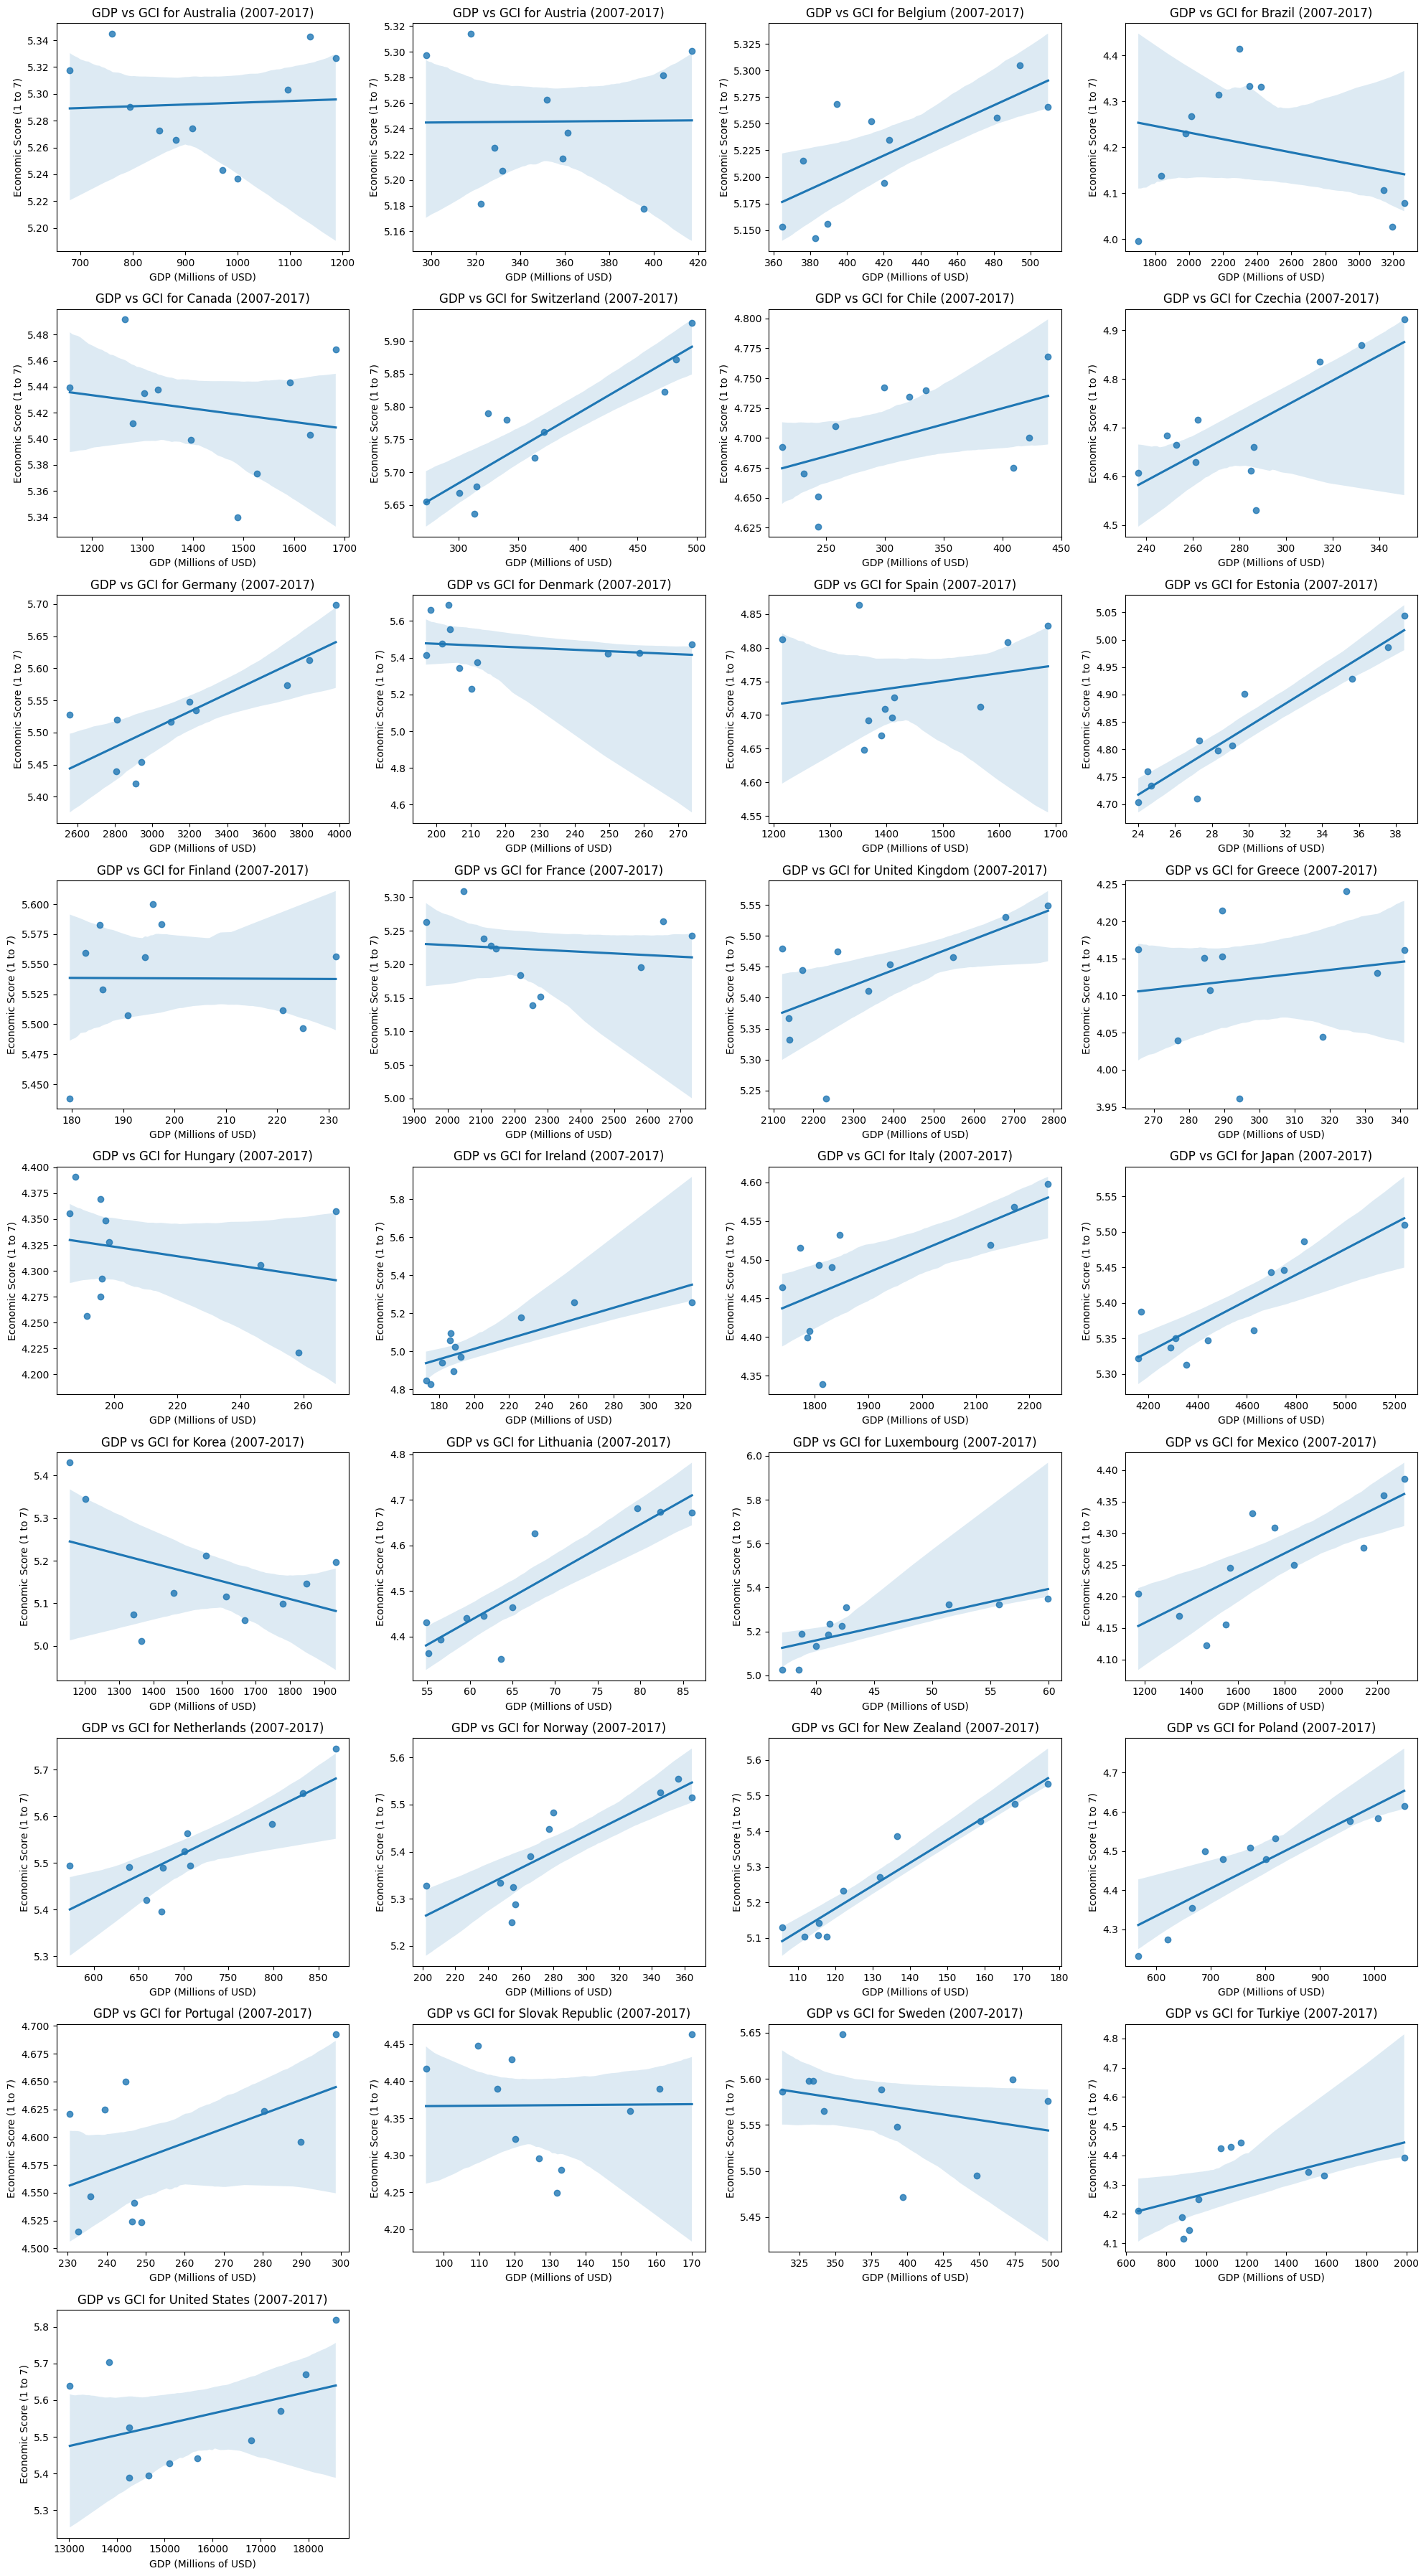

In [148]:
# Visualiser les scatter plots avec ligne de régression pour chaque pays
# Scatter plots avec ligne de régression : Ces graphiques permettent de visualiser directement la relation entre le GDP et le score pour chaque pays.
# Une ligne de régression permet de voir la tendance générale.
# Liste des pays à visualiser
countries = df_economy_gdp['Economy Name'].unique()

# Définir la taille de la grille
n_countries = len(countries)
n_cols = 4  # Nombre de colonnes de la grille
n_rows = (n_countries + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaire

# Créer une figure et des axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Boucle pour chaque pays et tracer les scatter plots
for i, country in enumerate(countries):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]

    gdp_data = df_economy_gdp[df_economy_gdp['Economy Name'] == country].iloc[:, 1:].values.flatten()
    score_data = df_gci_mean_country_base[df_gci_mean_country_base['Economy Name'] == country].iloc[:, 1:].values.flatten()

    sns.regplot(x=gdp_data, y=score_data, ax=ax)
    ax.set_title(f'GDP vs GCI for {country} (2007-2017)')
    ax.set_xlabel('GDP (Millions of USD)')
    ax.set_ylabel('Economic Score (1 to 7)')

# Supprimer les axes inutilisés
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


****Interprétation des résultats :****

****Points de données :****
Chaque point sur le graphique représente une année entre 2007 et 2017.
Les points montrent la combinaison de GDP et de score économique pour chaque année.

****La ligne de régression linéaire :**** tente de modéliser la relation entre le GDP et le score économique
La pente de cette ligne indique la tendance générale
    Si pente fortement positive/négative <-> forte corrélation positive/négative entre GDP et GCI <-> lorsque GDP augmente, GCI a tendance à augmenter/diminuer fortement
    Si pente faiblement positive/négative <-> faible corrélation positive/négative entre GDP et GCI <-> lorsque GDP augmente, GCI a tendance à augmenter/diminuer faiblement
    
****L'intervalle de confiance :**** Zone bleue -> montre l'incertitude de la ligne de régression. Plus la bande est large, plus l'incertitude est grande.
    La large bande de l'intervalle de confiance indique une incertitude importante autour de la relation entre le GDP et le score économique.
    Cela signifie que la corrélation observée n'est pas très robuste et peut être sujette à des variations.

****Dispersion des données :****
    Les points sont assez dispersés autour de la ligne de régression <-> beaucoup de variabilité dans les données <-> Cela signifie que d'autres facteurs, en plus du GDP, influencent le score économique


Si ligne de régression linéaire a une faible pente
+ forte dispersion des données autour de cette ligne
+ intervalle de confiance faible (zone bleue importante)
=
Interprétation prudente : La relation entre le GDP et le score économique n'est pas suffisamment forte pour tirer des conclusions définitives

##### Heatmap des corrélations GDP x GCI
Permet de voir rapidement quelles paires de pays ont des corrélations fortes (positives ou négatives) entre leur GDP et leur score économique.

In [149]:
# Initialiser un DataFrame pour stocker les corrélations annuelles
correlation_matrix = pd.DataFrame(index=df_economy_gdp['Economy Name'].unique(), columns=['Correlation'])

# Ajouter les corrélations calculées au DataFrame
for result in correlation_results:
    correlation_matrix.loc[result['Country']] = result['Correlation']

# Convertir les valeurs en flottants
correlation_matrix = correlation_matrix.astype(float)

# Afficher les résultats de la corrélation
print(correlation_matrix)


                 Correlation
Australia           0.056536
Austria             0.011170
Belgium             0.729087
Brazil             -0.284664
Canada             -0.206305
Switzerland         0.893247
Chile               0.506331
Czechia             0.762832
Germany             0.808789
Denmark            -0.166429
Spain               0.217259
Estonia             0.946156
Finland            -0.007072
France             -0.127028
United Kingdom      0.634991
Greece              0.162202
Hungary            -0.270933
Ireland             0.817011
Italy               0.681750
Japan               0.869815
Korea              -0.431844
Lithuania           0.897464
Luxembourg          0.786545
Mexico              0.779892
Netherlands         0.829865
Norway              0.839754
New Zealand         0.962371
Poland              0.885448
Portugal            0.518035
Slovak Republic     0.010961
Sweden             -0.294169
Turkiye             0.568415
United States       0.384977


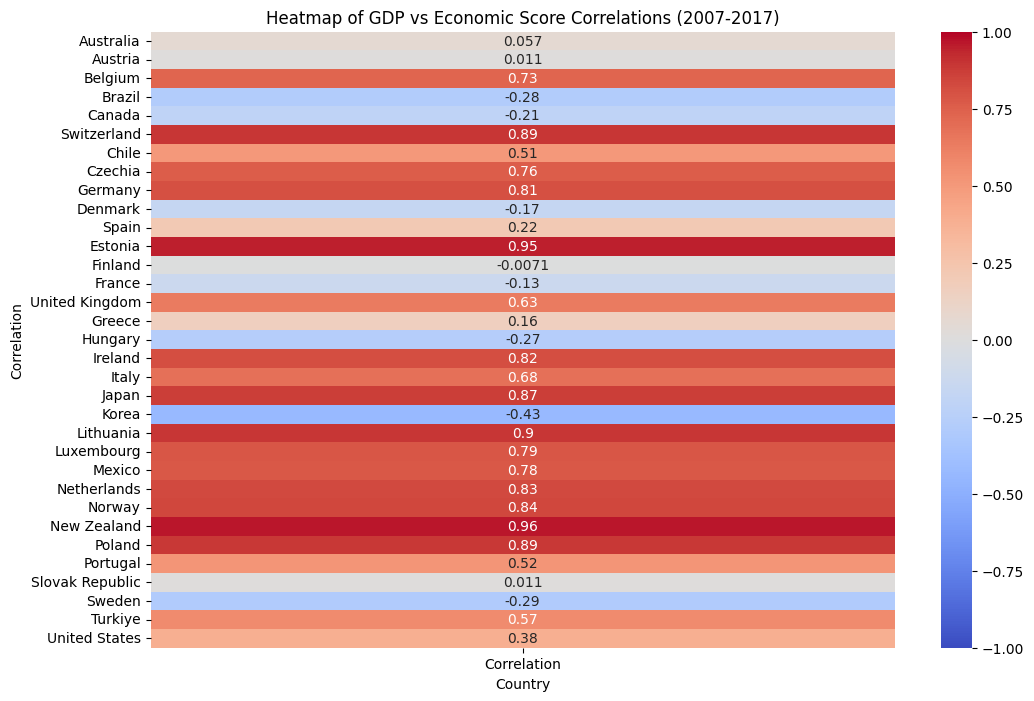

In [150]:
# Générer la heatmap de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of GDP vs Economic Score Correlations (2007-2017)')
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.show()


****Interprétation des résultats :****

****Corrélation positive modérée à forte (orange / rouge) :****
    Ces pays montrent une forte corrélation positive entre le GDP et le score économique. Cela signifie qu'une augmentation du GDP est fortement associée à une augmentation du score économique

****Corrélations proches de zéro :**** indiquent peu ou pas de relation entre le GDP et le score économique. Cela pourrait suggérer que le score économique de ces pays est influencé par des facteurs autres que le GDP.

Si nous avions eu des corrélations négatives fortes <-> corrélation négative forte entre le GDP et le score économique. Cela signifie qu'une augmentation du GDP est associée à une diminution importante du score économique, ce qui pourrait indiquer des problèmes structurels ou d'autres facteurs influençant négativement le score économique malgré une augmentation du GDP.

## Corrélation entre le GCI x ER (part d'investissement en énergie renouvelable) pour tous les pays

Répond à la question : Existe-t-il une corrélation entre la compétitivité d'un pays et l'inv en ER ?

In [151]:
df_gci_mean_country_base.head(3)

Economy Name      2007      2008      2009      2010      2011      2012  \
0    Australia  5.317500  5.345000  5.290000  5.272500  5.265833  5.274167   
1      Austria  5.297500  5.314167  5.225000  5.181667  5.207500  5.262500   
2      Belgium  5.153333  5.215000  5.155833  5.142500  5.268333  5.252500   

       2013      2014      2015      2016      2017  
0  5.243333  5.236667  5.303333  5.342500  5.326667  
1  5.216667  5.236667  5.177500  5.281667  5.300833  
2  5.194167  5.235000  5.255833  5.305000  5.265833

In [152]:
budgets_renewables.head(3)
# Attention, revoir le interpolate dans le code Dépenses en énergie car les ordres de grandeur ne sont pas OK


Economy Name    2007       2008       2009    2010     2011     2012  \
2     Australia  50.553  43.747000  84.191000  89.589  173.803  226.167   
11      Austria  28.002  45.348000  59.308000  60.608   58.045   48.935   
20      Belgium  27.484  18.322667   9.161333   0.000   29.660   29.787   

       2013    2014     2015    2016    2017  Period 2007-2017  
2   448.283  81.671  131.836  48.560  57.124           1435.52  
11   50.330  54.151   36.128  48.910  33.920            523.68  
20   32.115  44.781   28.922  24.496  25.865            270.59

##### Scatter plot des corrélations GCI x ER

In [153]:
# Fusionner les deux dataframes
merged_gci_er_df = pd.merge(df_gci_mean_country_base, budgets_renewables, on="Economy Name", suffixes=('_GCI', '_ERInvestments'))

# Liste des pays à visualiser
countries = merged_gci_er_df['Economy Name'].unique()

In [154]:
merged_gci_er_df

Economy Name  2007_GCI  2008_GCI  2009_GCI  2010_GCI  2011_GCI  \
0         Australia  5.317500  5.345000  5.290000  5.272500  5.265833   
1           Austria  5.297500  5.314167  5.225000  5.181667  5.207500   
2           Belgium  5.153333  5.215000  5.155833  5.142500  5.268333   
3            Brazil  3.996667  4.137500  4.230833  4.267500  4.314167   
4            Canada  5.439167  5.491667  5.435000  5.411667  5.437500   
5             Chile  4.692500  4.670000  4.650833  4.625833  4.710000   
6           Czechia  4.606667  4.683333  4.715833  4.665000  4.629167   
7           Denmark  5.658333  5.685833  5.555833  5.414167  5.475833   
8           Estonia  4.760000  4.798333  4.710000  4.703333  4.733333   
9           Finland  5.559167  5.582500  5.507500  5.438333  5.529167   
10           France  5.263333  5.309167  5.227500  5.238333  5.223333   
11          Germany  5.528333  5.520000  5.420833  5.439167  5.454167   
12           Greece  4.214167  4.240833  4.161667  4.130000  4.044167   
13          Hungary  4.348333  4.256667  4.292500  4.355833  4.390833   
14          Ireland  5.094167  5.058333  4.893333  4.826667  4.846667   
15            Italy  4.407500  4.399167  4.339167  4.464167  4.515000   
16            Japan  5.387500  5.336667  5.312500  5.321667  5.350000   
17            Korea  5.430000  5.345000  5.074167  5.010833  5.124167   
18        Lithuania  4.430833  4.440000  4.351667  4.363333  4.393333   
19       Luxembourg  5.025833  5.024167  5.132500  5.188333  5.185000   
20           Mexico  4.204167  4.169167  4.155833  4.122500  4.245833   
21      Netherlands  5.493333  5.490833  5.395000  5.420000  5.490000   
22      New Zealand  5.129167  5.104167  5.142500  5.107500  5.102500   
23           Norway  5.328333  5.333333  5.287500  5.250000  5.325000   
24           Poland  4.232500  4.273333  4.354167  4.500000  4.479167   
25         Portugal  4.625000  4.620833  4.546667  4.515000  4.540833   
26  Slovak Republic  4.416667  4.447500  4.430000  4.390000  4.321667   
27            Spain  4.812500  4.863333  4.709167  4.648333  4.691667   
28           Sweden  5.585833  5.597500  5.565000  5.597500  5.648333   
29      Switzerland  5.655000  5.668333  5.636667  5.678333  5.790000   
30          Turkiye  4.211667  4.115833  4.143333  4.189167  4.250833   
31   United Kingdom  5.479167  5.366667  5.237500  5.332500  5.444167   
32    United States  5.638333  5.704167  5.525000  5.388333  5.395000   

    2012_GCI  2013_GCI  2014_GCI  2015_GCI  ...  2009_ERInvestments  \
0   5.274167  5.243333  5.236667  5.303333  ...           84.191000   
1   5.262500  5.216667  5.236667  5.177500  ...           59.308000   
2   5.252500  5.194167  5.235000  5.255833  ...            9.161333   
3   4.415000  4.334167  4.332500  4.078333  ...                 NaN   
4   5.399167  5.340000  5.373333  5.443333  ...          168.995000   
5   4.742500  4.734167  4.740000  4.675000  ...                 NaN   
6   4.611667  4.530833  4.660833  4.835833  ...           17.274000   
7   5.345000  5.230833  5.374167  5.421667  ...           79.416000   
8   4.816667  4.807500  4.900833  4.929167  ...                 NaN   
9   5.600000  5.583333  5.555833  5.511667  ...           70.931000   
10  5.183333  5.139167  5.151667  5.195833  ...          388.578000   
11  5.516667  5.548333  5.535000  5.573333  ...          341.314000   
12  3.961667  4.040000  4.162500  4.150833  ...                 NaN   
13  4.369167  4.275000  4.327500  4.305833  ...           14.302000   
14  4.941667  4.971667  5.024167  5.176667  ...           29.913000   
15  4.531667  4.490000  4.493333  4.519167  ...          120.183000   
16  5.347500  5.361667  5.443333  5.446667  ...          149.684000   
17  5.212500  5.115833  5.060833  5.098333  ...          218.479000   
18  4.445833  4.465000  4.626667  4.680833  ...                 NaN   
19  5.233333  5.225000  5.310833  5.323333  ...                 NaN   
20  4.331667  4.309167  4.250000 

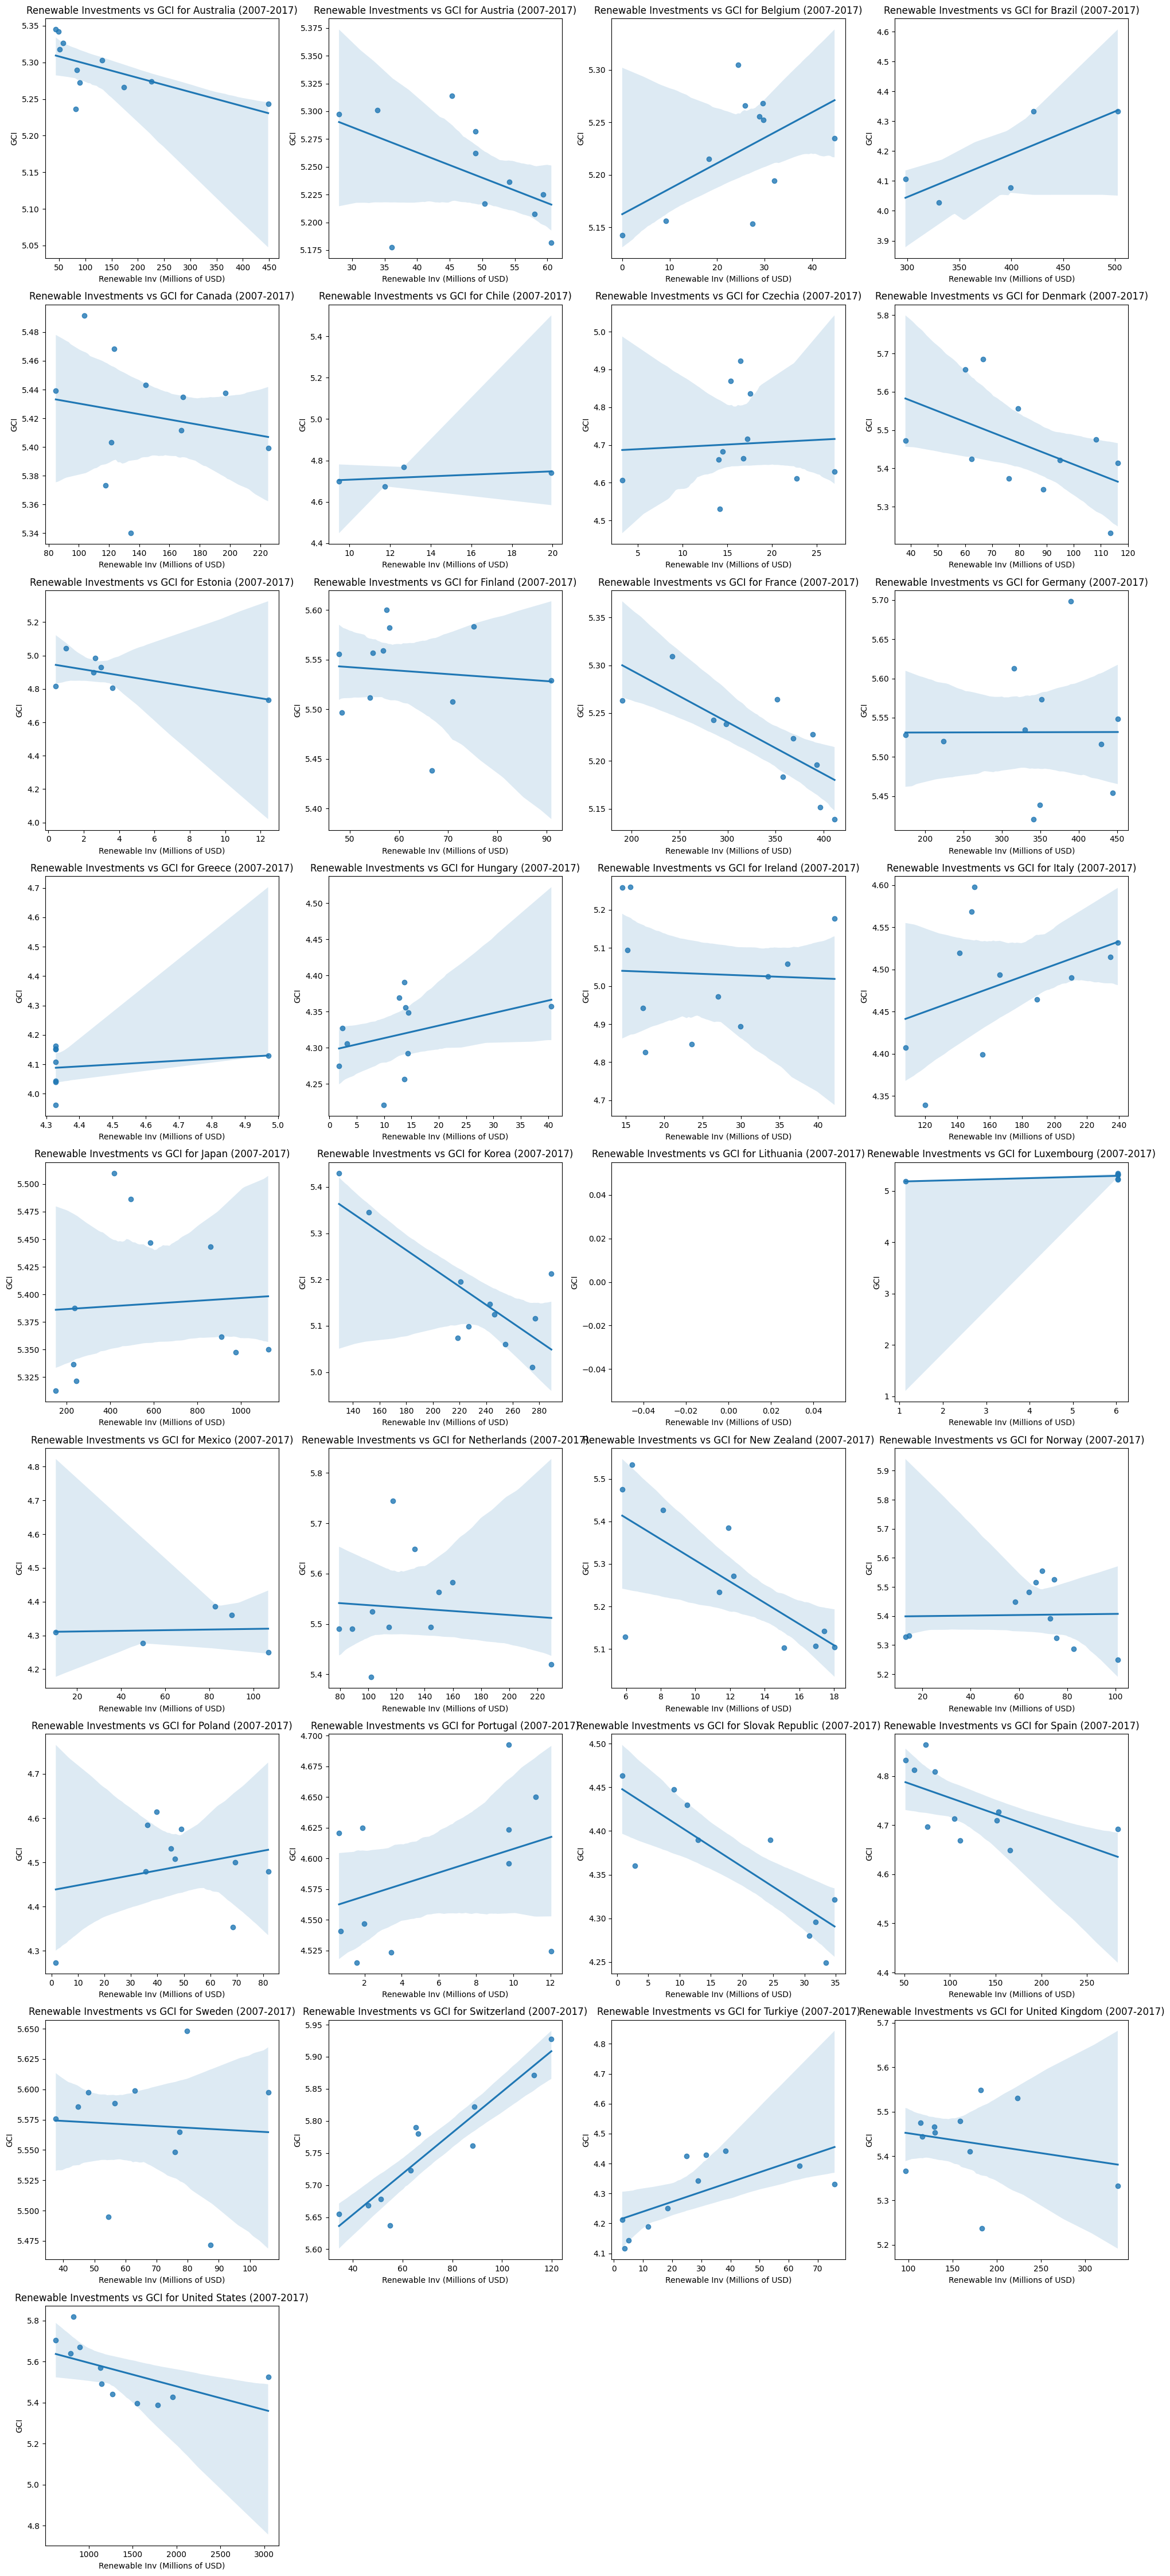

In [155]:
# Définir la taille de la grille
n_countries = len(countries)
n_cols = 4  # Nombre de colonnes de la grille
n_rows = (n_countries + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaire

# Créer une figure et des axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Boucle pour chaque pays et tracer les scatter plots
for i, country in enumerate(countries):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]

    gci_data = merged_gci_er_df.loc[merged_gci_er_df['Economy Name'] == country, '2007_GCI':'2017_GCI'].values.flatten()
    er_data = merged_gci_er_df.loc[merged_gci_er_df['Economy Name'] == country, '2007_ERInvestments':'2017_ERInvestments'].values.flatten()

    sns.regplot(x=er_data, y=gci_data, ax=ax)
    ax.set_title(f'Renewable Investments vs GCI for {country} (2007-2017)')
    ax.set_xlabel('Renewable Inv (Millions of USD)')
    ax.set_ylabel('GCI')

# Supprimer les axes inutilisés
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

##### Heatmap des corrélations GCI x ER #####

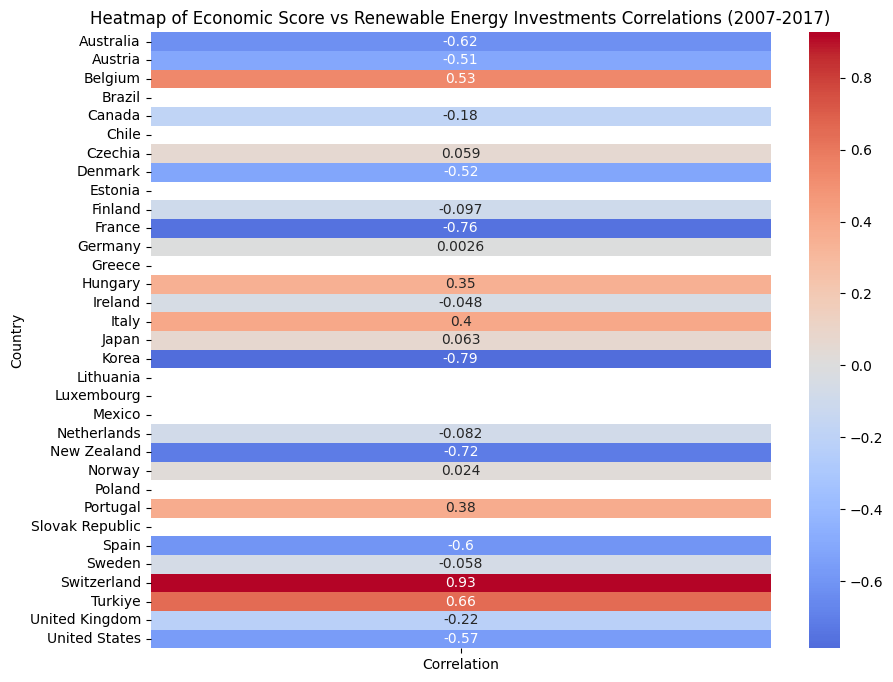

In [156]:
# Calculer les corrélations
correlation_gci_er = []

for country in merged_gci_er_df['Economy Name'].unique():
    gci_data = merged_gci_er_df.loc[merged_gci_er_df['Economy Name'] == country, '2007_GCI':'2017_GCI'].values.flatten()
    er_data = merged_gci_er_df.loc[merged_gci_er_df['Economy Name'] == country, '2007_ERInvestments':'2017_ERInvestments'].values.flatten()
    correcoef_gci_er = np.corrcoef(gci_data, er_data)[0, 1]
    correlation_gci_er.append({'Country': country, 'Correlation': correcoef_gci_er})

# Convertir la liste en DataFrame
correlation_gci_er_df = pd.DataFrame(correlation_gci_er).set_index('Country')

# Heatmap des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_gci_er_df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Economic Score vs Renewable Energy Investments Correlations (2007-2017)')
plt.show()

****Interprétation des résultats :****

****Corrélation négative forte (bleu) :****
    corrélation négative entre les investissements en énergie renouvelable et le score économique (GCI) <-> l'augmentation des investissements en énergie renouvelable est associée à une diminution du score économique.

****Corrélation proche de zéro (gris) :****
    Peu ou pas de corrélation


## Corrélation entre GDP x ER

In [157]:
df_economy_gdp.head(3)

Economy Name    2007    2008    2009    2010    2011    2012    2013  \
279    Australia  680.15  760.81  795.30  851.17  882.36  914.48  970.76   
605      Austria  297.73  317.81  328.57  322.51  332.00  352.02  359.02   
931      Belgium  364.65  375.99  389.52  382.75  394.35  413.28  420.31   

       2014     2015     2016     2017  
279  999.60  1095.38  1138.08  1187.32  
605  361.40   395.49   404.29   417.23  
931  422.81   481.47   494.12   509.53

In [158]:
budgets_renewables.head(3)

Economy Name    2007       2008       2009    2010     2011     2012  \
2     Australia  50.553  43.747000  84.191000  89.589  173.803  226.167   
11      Austria  28.002  45.348000  59.308000  60.608   58.045   48.935   
20      Belgium  27.484  18.322667   9.161333   0.000   29.660   29.787   

       2013    2014     2015    2016    2017  Period 2007-2017  
2   448.283  81.671  131.836  48.560  57.124           1435.52  
11   50.330  54.151   36.128  48.910  33.920            523.68  
20   32.115  44.781   28.922  24.496  25.865            270.59

In [159]:
budgets_renewables_base = budgets_renewables.drop(columns='Period 2007-2017')

In [160]:
# Fusionner les deux dataframes
merged_gdp_er_df = pd.merge(df_economy_gdp, budgets_renewables_base, on="Economy Name", suffixes=('_GDP', '_ERInvestments'))

# Liste des pays à visualiser
countries = merged_gdp_er_df['Economy Name'].unique()

##### Scatter plot des corrélations GDP x ER #####

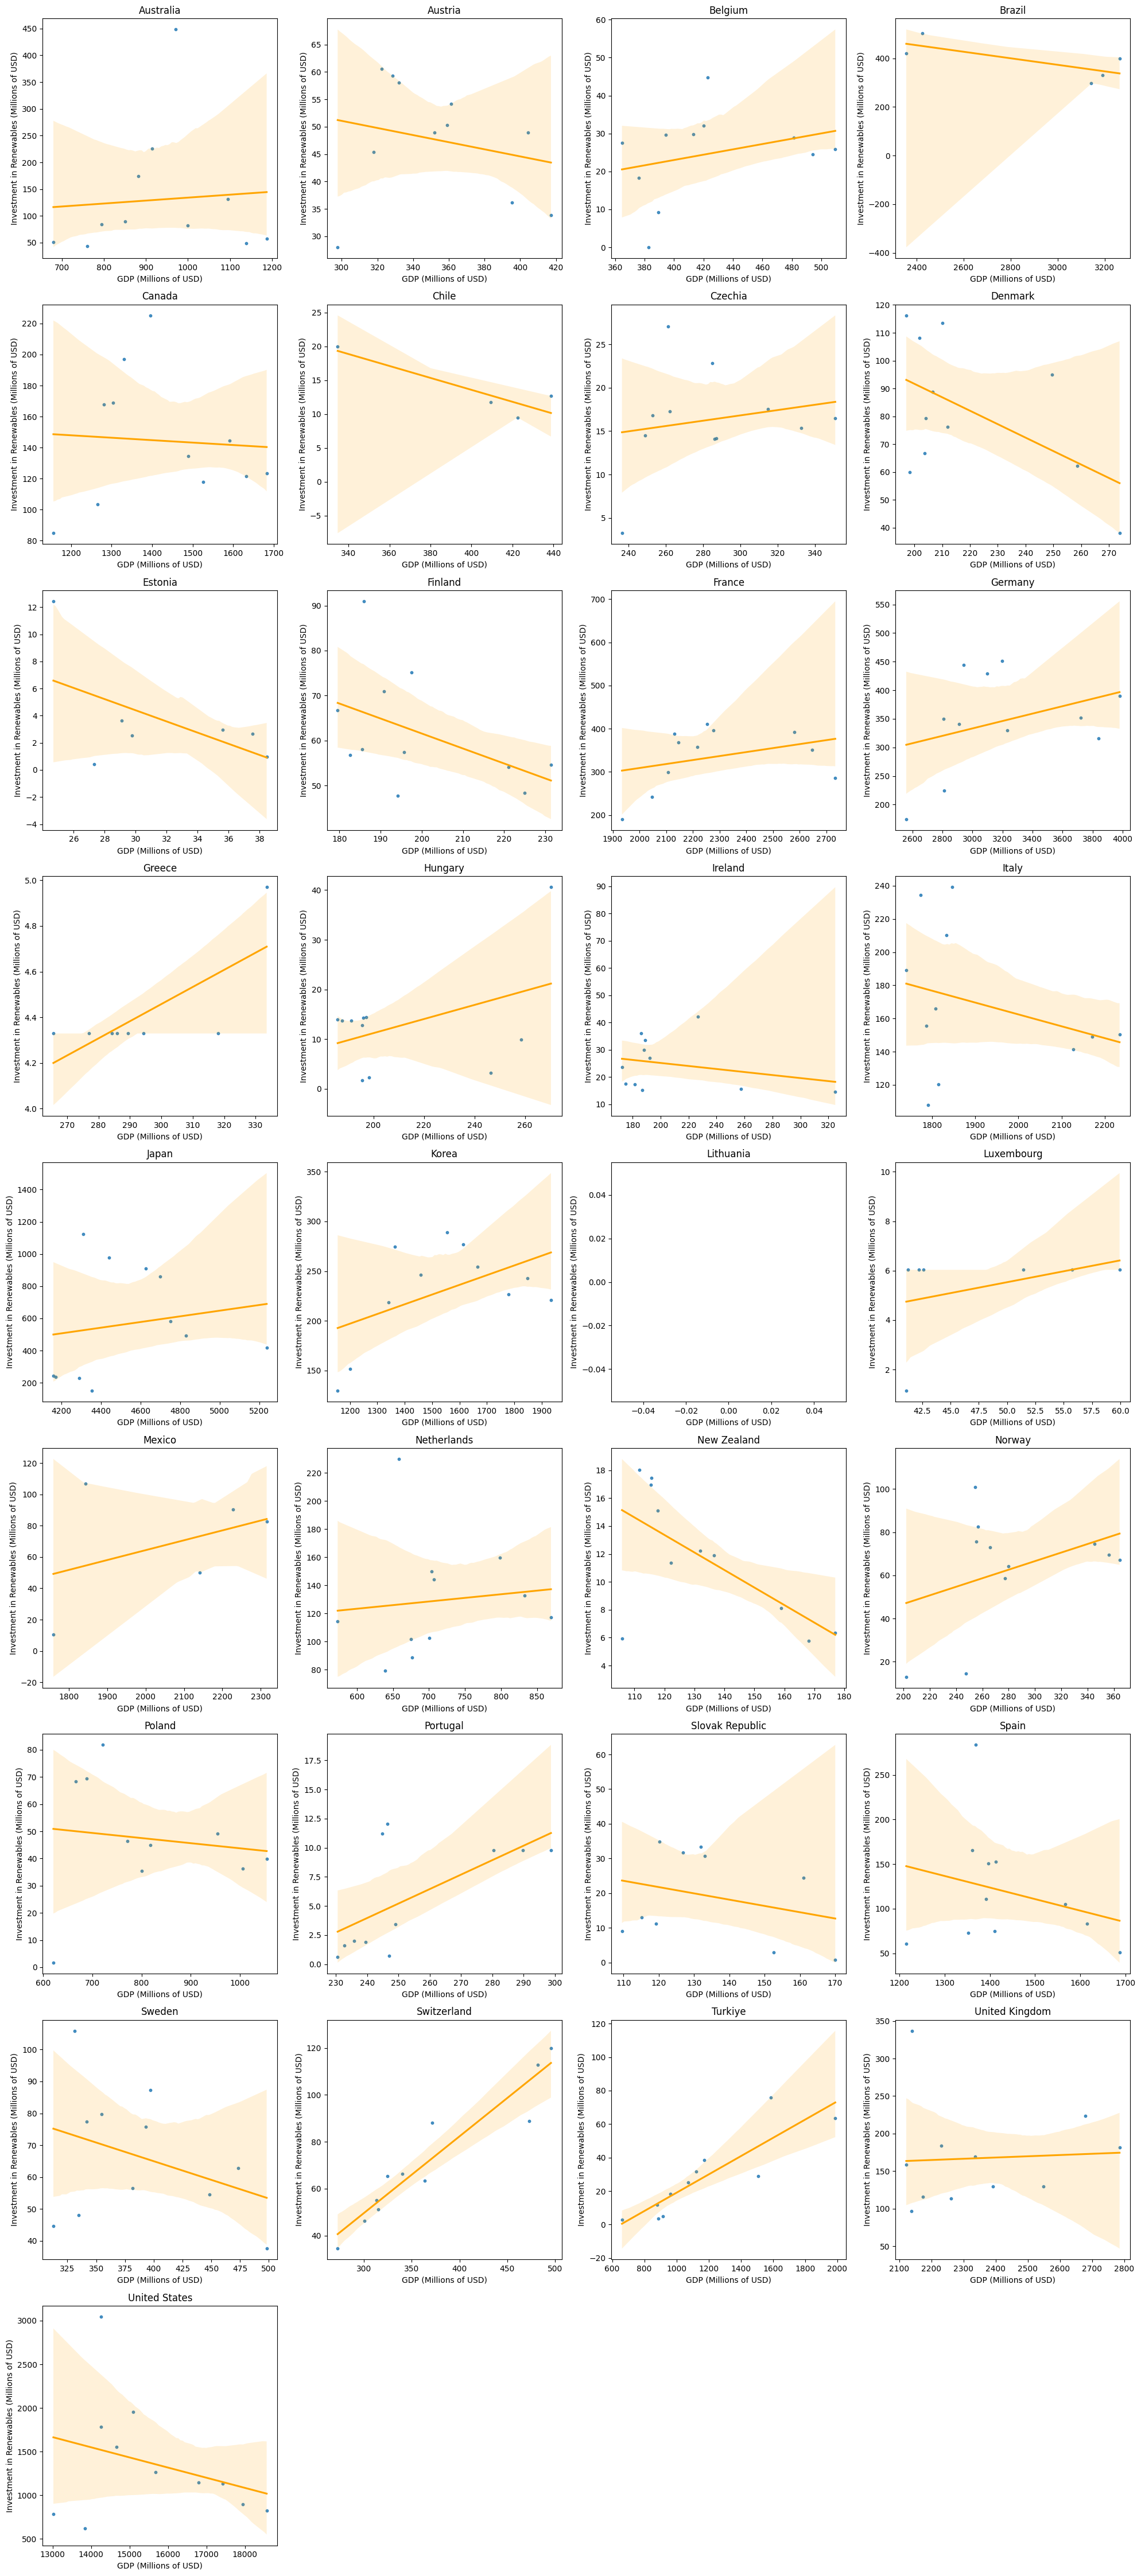

In [161]:
# Obtenir la liste des pays communs dans les deux dataframes
common_countries = sorted(set(df_economy_gdp['Economy Name']).intersection(set(budgets_renewables_base['Economy Name'])))

# Définir le nombre de lignes et de colonnes dynamiquement en fonction du nombre de pays
num_countries = len(common_countries)
num_cols = 4
num_rows = (num_countries + num_cols - 1) // num_cols  # Calculer le nombre de lignes nécessaires

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))

for i, country in enumerate(common_countries):
    row, col = divmod(i, num_cols)
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Obtenir les valeurs de GDP et d'investissement en renouvelable pour chaque pays
    gdp = df_economy_gdp[df_economy_gdp['Economy Name'] == country].iloc[:, 1:].values.flatten()
    renewables = budgets_renewables_base[budgets_renewables_base['Economy Name'] == country].iloc[:, 1:].values.flatten()

    # Vérifier si les deux arrays ont la même longueur
    if len(gdp) == len(renewables) and len(gdp) > 0:
        sns.regplot(x=gdp, y=renewables, ax=ax, scatter_kws={'s':10}, line_kws={'color':'orange'})

    ax.set_title(country)
    ax.set_xlabel('GDP (Millions of USD)')
    ax.set_ylabel('Investment in Renewables (Millions of USD)')

# Si le nombre de pays n'est pas un multiple exact de num_cols, les derniers sous-plots seront vides
for j in range(i + 1, num_rows * num_cols):
    row, col = divmod(j, num_cols)
    fig.delaxes(axes[row, col] if num_rows > 1 else axes[col])

plt.tight_layout()
plt.show()

##### Heatmap des corrélations GDP x ER #####

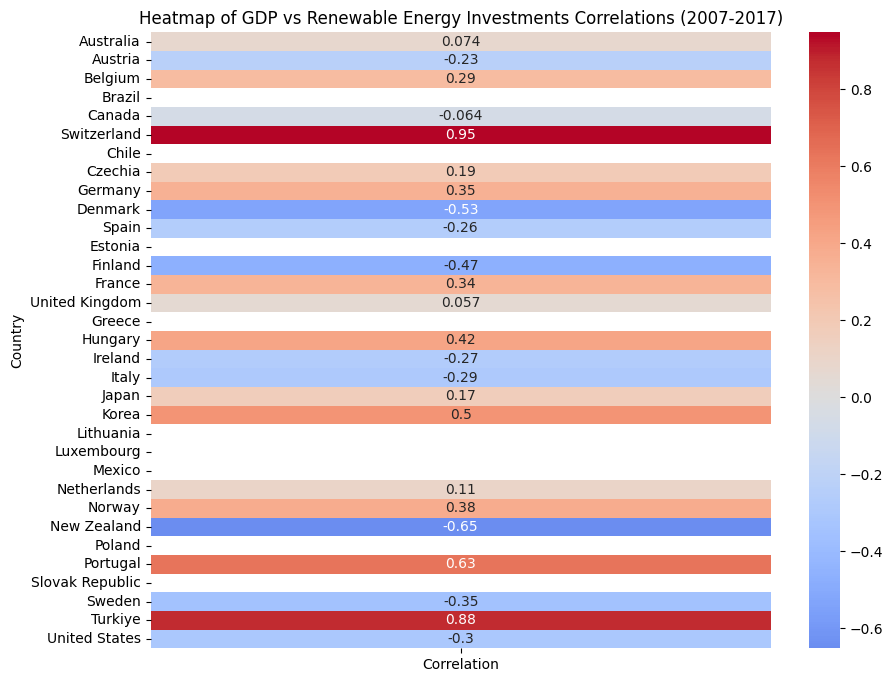

In [162]:
# Calculer les corrélations
correlation_gdp_er = []

for country in merged_gdp_er_df['Economy Name'].unique():
    gdp_data = merged_gdp_er_df.loc[merged_gdp_er_df['Economy Name'] == country, '2007_GDP':'2017_GDP'].values.flatten()
    er_data = merged_gdp_er_df.loc[merged_gdp_er_df['Economy Name'] == country, '2007_ERInvestments':'2017_ERInvestments'].values.flatten()
    correcoef_gdp_er = np.corrcoef(gdp_data, er_data)[0, 1]
    correlation_gdp_er.append({'Country': country, 'Correlation': correcoef_gdp_er})

# Convertir la liste en DataFrame
correlation_gdp_er_df = pd.DataFrame(correlation_gdp_er).set_index('Country')

# Heatmap des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_gdp_er_df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of GDP vs Renewable Energy Investments Correlations (2007-2017)')
plt.show()

## Corrélation entre GDP x GCI x ER

In [163]:
df_economy_gdp.head(3)

Economy Name    2007    2008    2009    2010    2011    2012    2013  \
279    Australia  680.15  760.81  795.30  851.17  882.36  914.48  970.76   
605      Austria  297.73  317.81  328.57  322.51  332.00  352.02  359.02   
931      Belgium  364.65  375.99  389.52  382.75  394.35  413.28  420.31   

       2014     2015     2016     2017  
279  999.60  1095.38  1138.08  1187.32  
605  361.40   395.49   404.29   417.23  
931  422.81   481.47   494.12   509.53

In [164]:
budgets_renewables.head(3)

Economy Name    2007       2008       2009    2010     2011     2012  \
2     Australia  50.553  43.747000  84.191000  89.589  173.803  226.167   
11      Austria  28.002  45.348000  59.308000  60.608   58.045   48.935   
20      Belgium  27.484  18.322667   9.161333   0.000   29.660   29.787   

       2013    2014     2015    2016    2017  Period 2007-2017  
2   448.283  81.671  131.836  48.560  57.124           1435.52  
11   50.330  54.151   36.128  48.910  33.920            523.68  
20   32.115  44.781   28.922  24.496  25.865            270.59

In [165]:
df_gci_mean_country.head(3)

Economy Name      2007      2008      2009      2010      2011      2012  \
0    Australia  5.317500  5.345000  5.290000  5.272500  5.265833  5.274167   
1      Austria  5.297500  5.314167  5.225000  5.181667  5.207500  5.262500   
2      Belgium  5.153333  5.215000  5.155833  5.142500  5.268333  5.252500   

       2013      2014      2015      2016      2017  Period 2007-2017  
0  5.243333  5.236667  5.303333  5.342500  5.326667              5.29  
1  5.216667  5.236667  5.177500  5.281667  5.300833              5.25  
2  5.194167  5.235000  5.255833  5.305000  5.265833              5.22

##### Scatter plot des corrélations GDP x GCI x ER #####

In [166]:
# Fusionner les trois DataFrames sur la colonne 'Economy Name'
merged_2df = pd.merge(df_economy_gdp, budgets_renewables, on='Economy Name', suffixes=('_GDP', '_Renewables'))
merged_2df.head(3)

Economy Name  2007_GDP  2008_GDP  2009_GDP  2010_GDP  2011_GDP  2012_GDP  \
0    Australia    680.15    760.81    795.30    851.17    882.36    914.48   
1      Austria    297.73    317.81    328.57    322.51    332.00    352.02   
2      Belgium    364.65    375.99    389.52    382.75    394.35    413.28   

   2013_GDP  2014_GDP  2015_GDP  ...  2009_Renewables  2010_Renewables  \
0    970.76    999.60   1095.38  ...        84.191000           89.589   
1    359.02    361.40    395.49  ...        59.308000           60.608   
2    420.31    422.81    481.47  ...         9.161333            0.000   

   2011_Renewables  2012_Renewables  2013_Renewables  2014_Renewables  \
0          173.803          226.167          448.283           81.671   
1           58.045           48.935           50.330           54.151   
2           29.660           29.787           32.115           44.781   

   2015_Renewables  2016_Renewables  2017_Renewables  Period 2007-2017  
0          131.836           48.560           57.124           1435.52  
1           36.128           48.910           33.920            523.68  
2           28.922           24.496           25.865            270.59  

[3 rows x 24 columns]

In [167]:
merged_3df = pd.merge(merged_2df, df_gci_mean_country, on='Economy Name', suffixes=('', '_GCI'))
merged_3df.head(3)


Economy Name  2007_GDP  2008_GDP  2009_GDP  2010_GDP  2011_GDP  2012_GDP  \
0    Australia    680.15    760.81    795.30    851.17    882.36    914.48   
1      Austria    297.73    317.81    328.57    322.51    332.00    352.02   
2      Belgium    364.65    375.99    389.52    382.75    394.35    413.28   

   2013_GDP  2014_GDP  2015_GDP  ...      2009      2010      2011      2012  \
0    970.76    999.60   1095.38  ...  5.290000  5.272500  5.265833  5.274167   
1    359.02    361.40    395.49  ...  5.225000  5.181667  5.207500  5.262500   
2    420.31    422.81    481.47  ...  5.155833  5.142500  5.268333  5.252500   

       2013      2014      2015      2016      2017  Period 2007-2017_GCI  
0  5.243333  5.236667  5.303333  5.342500  5.326667                  5.29  
1  5.216667  5.236667  5.177500  5.281667  5.300833                  5.25  
2  5.194167  5.235000  5.255833  5.305000  5.265833                  5.22  

[3 rows x 36 columns]

In [168]:
# Calcul de la corrélation
correlation_3var = []

for country in merged_3df['Economy Name'].unique():
    data = merged_3df[merged_3df['Economy Name'] == country]

    for year in range(2007, 2018):
        gdp = data[f'{year}_GDP'].values[0]
        renewables = data[f'{year}_Renewables'].values[0]
        gci = data[f'{year}'].values[0]

        correlation_3var.append({
            'Country': country,
            'Year': year,
            'GDP': gdp,
            'Renewables': renewables,
            'GCI': gci
        })

# Convertir en DataFrame
correlation_3df = pd.DataFrame(correlation_3var)

# Calculer les corrélations
corr_matrix3 = correlation_3df[['GDP', 'Renewables', 'GCI']].corr()
print(corr_matrix3)

                 GDP  Renewables       GCI
GDP         1.000000    0.839495  0.222920
Renewables  0.839495    1.000000  0.245373
GCI         0.222920    0.245373  1.000000


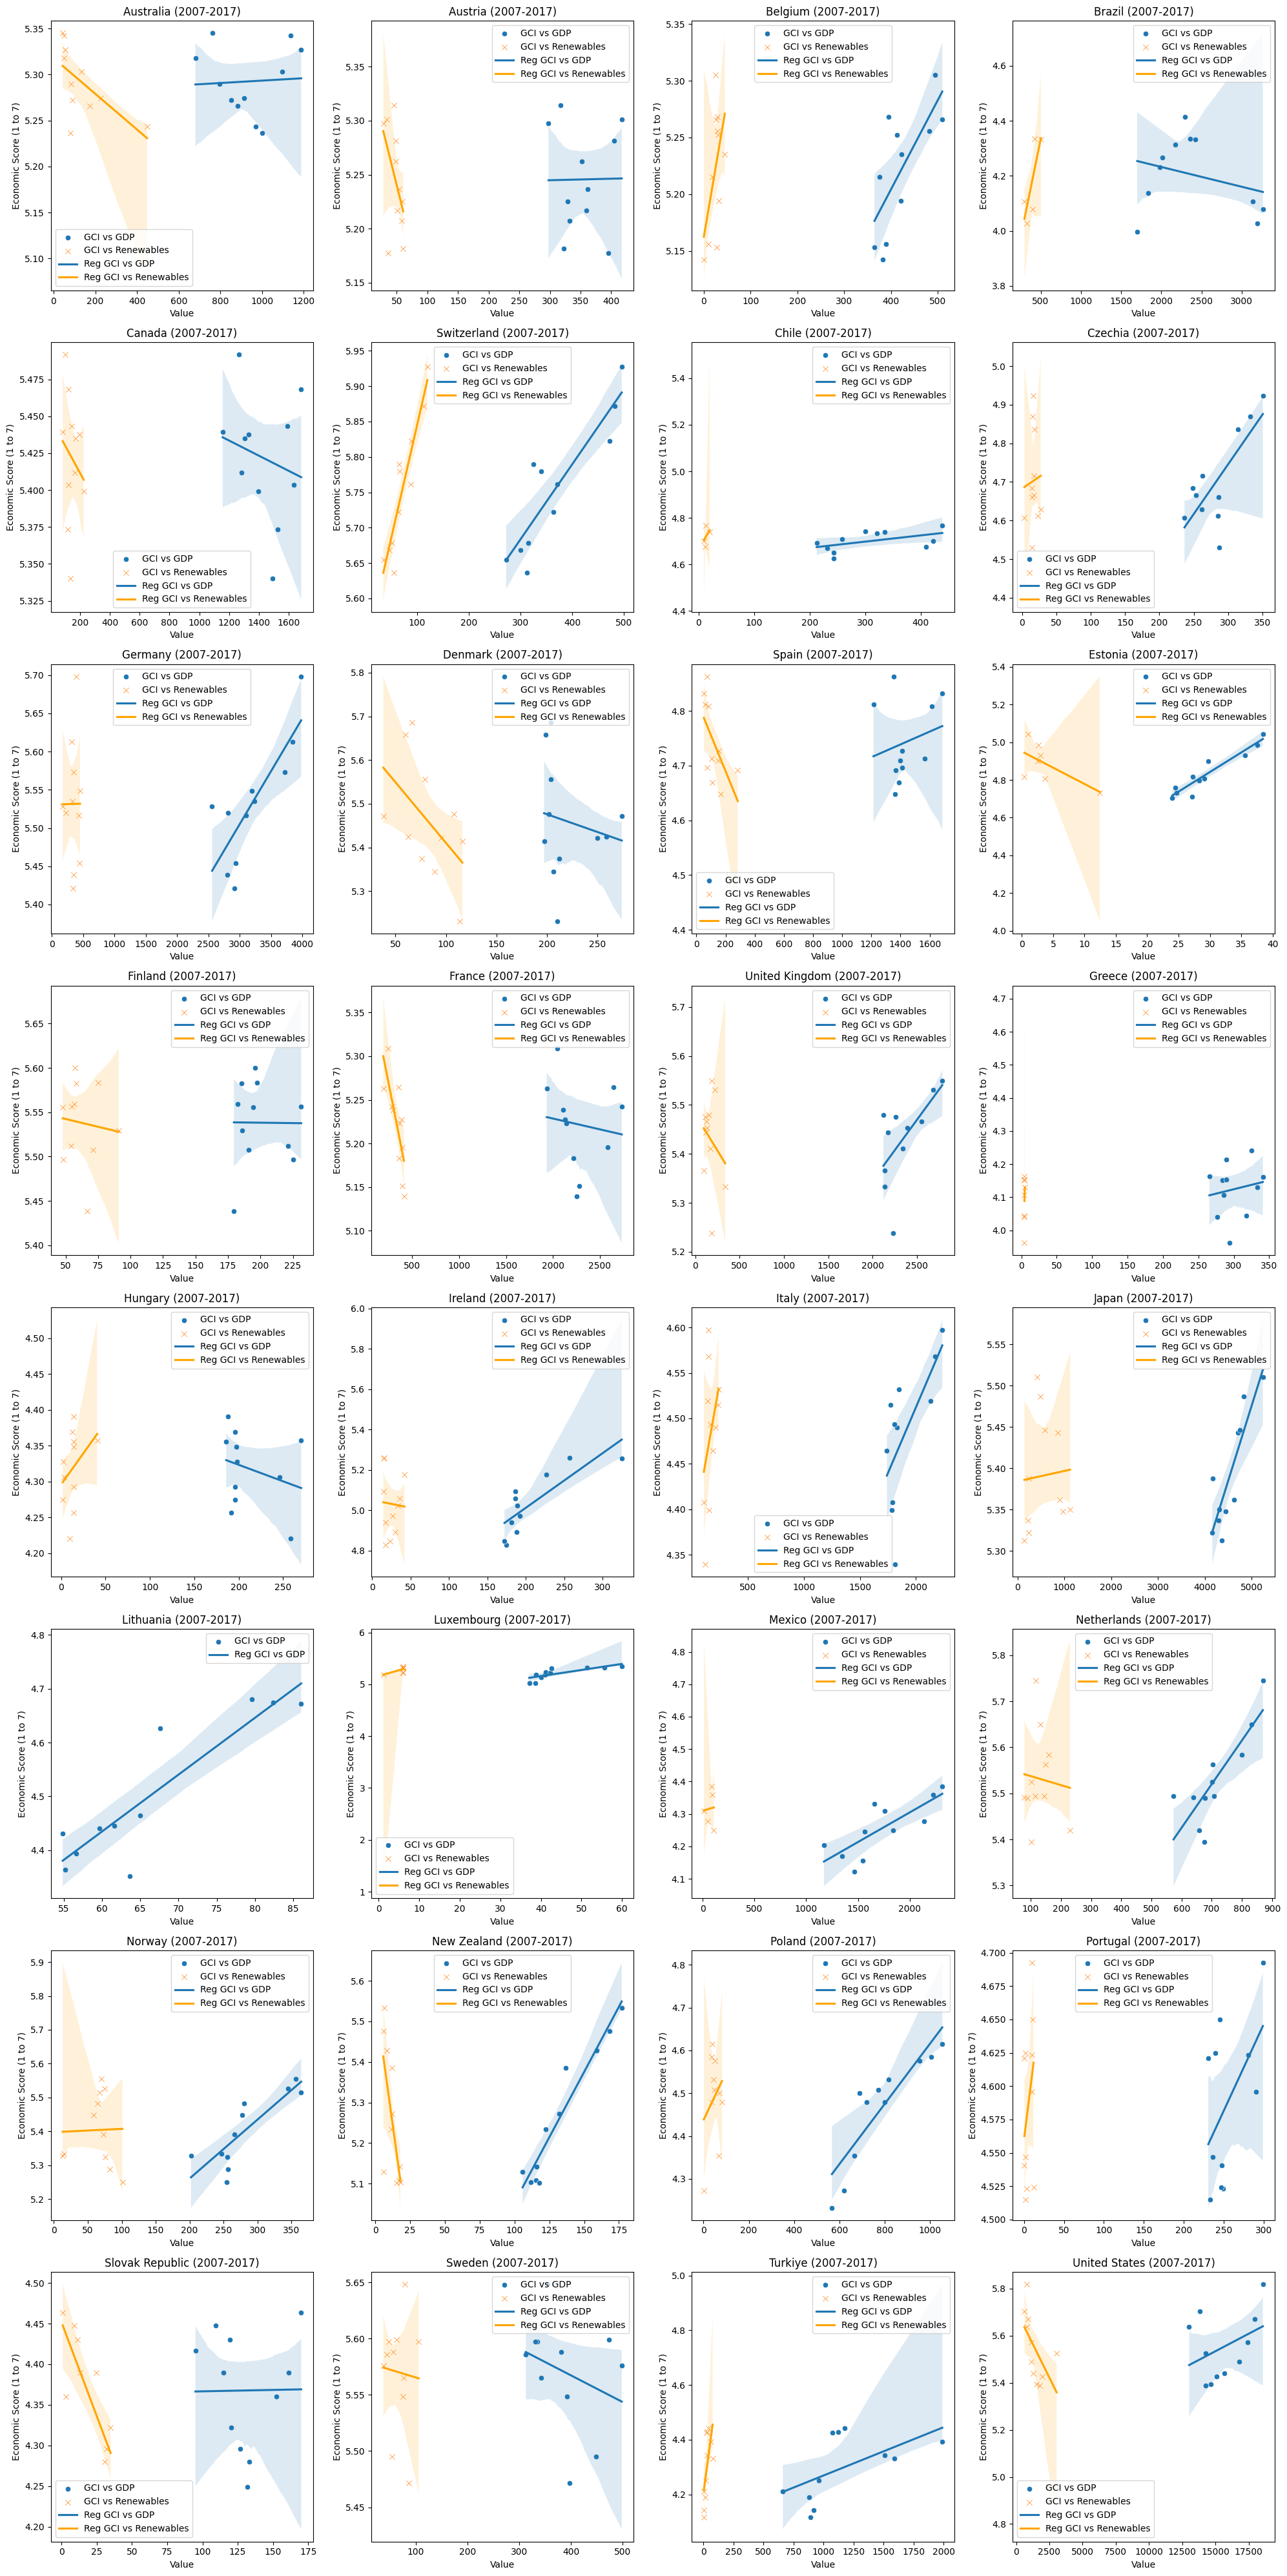

In [169]:
# Définir la taille de la grille
n_countries = len(merged_3df['Economy Name'].unique())
n_cols = 4  # Nombre de colonnes de la grille
n_rows = (n_countries + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

# Créer une figure et des axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Boucle pour chaque pays et tracer les scatter plots
for i, country in enumerate(merged_3df['Economy Name'].unique()):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]

    data = correlation_3df[correlation_3df['Country'] == country]
    sns.scatterplot(x='GDP', y='GCI', data=data, ax=ax, label='GCI vs GDP')
    sns.scatterplot(x='Renewables', y='GCI', data=data, ax=ax, label='GCI vs Renewables', marker='x')
    sns.regplot(x='GDP', y='GCI', data=data, ax=ax, scatter=False, label='Reg GCI vs GDP')
    sns.regplot(x='Renewables', y='GCI', data=data, ax=ax, scatter=False, label='Reg GCI vs Renewables', color='orange')

    ax.set_title(f'{country} (2007-2017)')
    ax.set_xlabel('Value')
    ax.set_ylabel('Economic Score (1 to 7)')
    ax.legend()

# Supprimer les axes inutilisés
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


##### Heatmap des corrélations GDP x GCI x ER #####

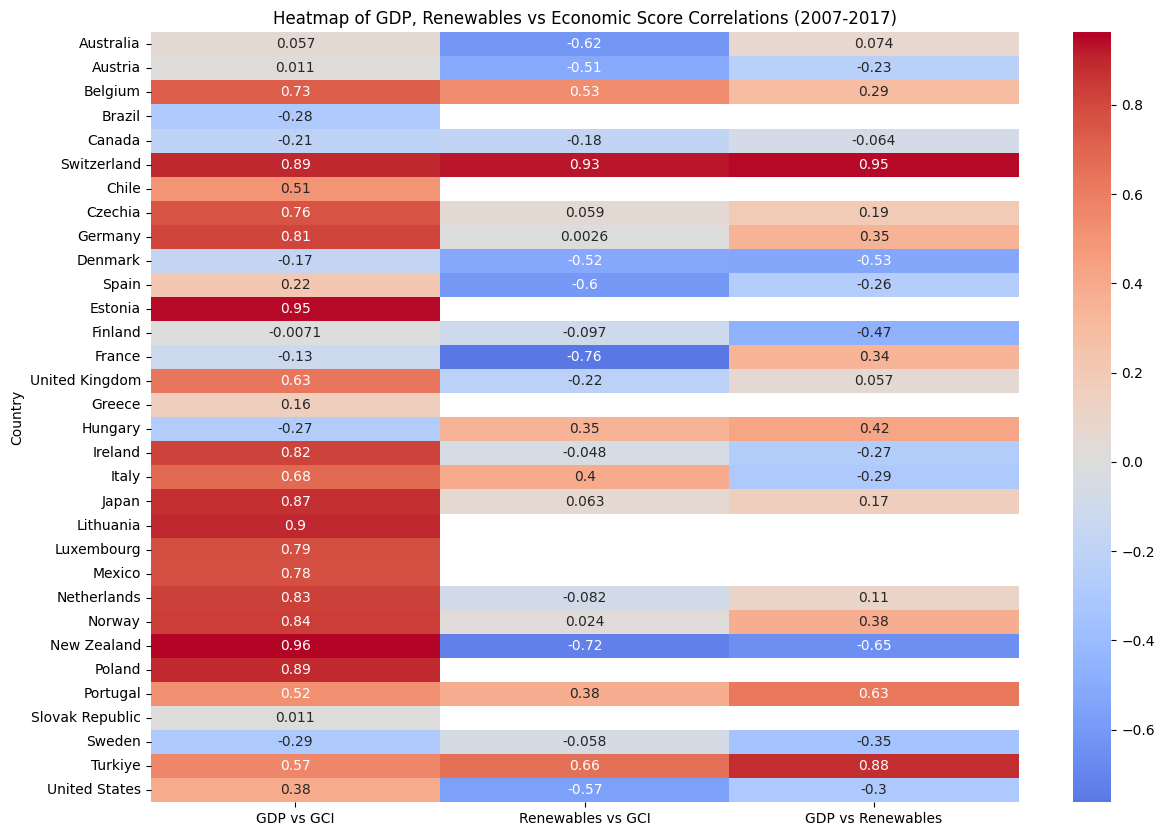

In [170]:
# Calculer les corrélations pour chaque pays
heatmap_data = []

for country in merged_3df['Economy Name'].unique():
    data = merged_3df[merged_3df['Economy Name'] == country]
    correlation_gdp_gci = data.loc[:, '2007_GDP':'2017_GDP'].values.flatten()
    correlation_renewables_gci = data.loc[:, '2007_Renewables':'2017_Renewables'].values.flatten()
    correlation_gdp_renewables = data.loc[:, '2007_GDP':'2017_GDP'].values.flatten()
    correlation_gdp_gci = np.corrcoef(correlation_gdp_gci, data.loc[:, '2007':'2017'].values.flatten())[0, 1]
    correlation_renewables_gci = np.corrcoef(correlation_renewables_gci, data.loc[:, '2007':'2017'].values.flatten())[0, 1]
    correlation_gdp_renewables = np.corrcoef(correlation_gdp_renewables, data.loc[:, '2007_Renewables':'2017_Renewables'].values.flatten())[0, 1]

    heatmap_data.append({
        'Country': country,
        'GDP vs GCI': correlation_gdp_gci,
        'Renewables vs GCI': correlation_renewables_gci,
        'GDP vs Renewables': correlation_gdp_renewables
    })

# Convertir en DataFrame
heatmap_df = pd.DataFrame(heatmap_data).set_index('Country')

# Plot de la heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of GDP, Renewables vs Economic Score Correlations (2007-2017)')
plt.show()